# Cherilyn Conner, Jean Carlos Mercedes, Lee Nadeau, Michael Parmese
## Final Project

### 08/05/2019

***
# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use ('ggplot')
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering
import time
import warnings
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import classification_report
import math
import random
import io
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



##### requires pip install
import pyreadstat

In [2]:
#to display multiple outputs from one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

***
# Reading in and cleaning the trading analytics dataset
##### Cherilyn

In [3]:
df1=pd.read_csv(r'Trading Analytics.csv')

#to clean all of the column names
df1.columns = df1.columns.str.strip().str.lower().str.replace(' ', '').str.replace('(', '').str.replace(')', '').str.replace('&', '').str.replace('.', '').str.replace('?', '').str.replace('$', '').str.replace('%', '').str.replace('*', '').str.replace('=', '').str.replace('/', '').str.replace(':', '').str.replace('_', '').str.replace('-', '').str.replace('+', '')

# to remove columns
drop_cols = ['unnamed40','unnamed41', 'unnamed42', 'unnamed43', 'unnamed44', 'unnamed45', 'unnamed46','unnamed47','unnamed48', 'unnamed49', 'unnamed50','qualify','volume',
             'tradetime','eventtime','offer','bid','buyer','seller','buyerid','sellerid','rpertr','upertrq','unrealtot','1sthour','lasthour','1sthrusrtotvol','lasthusrtotvol',
             'range','p2p11','lnp2p1','volatstdevofln']
df1 = df1.drop(drop_cols, axis=1)

#to fix col that start with 1
df1.columns = df1.columns.str.replace('1', 'fir')

#to split ido into desk number and trader number
    # note trader number no longer has the C in the front
df1[['desk','trader']] = df1.ido.str.split("C",n=1,expand=True)

#to change the percentages into floats
df1['useroftotalvolu'] = df1['useroftotalvolu'].str.rstrip('%').astype('float') / 100.0
df1['firsthrusrfirsthrtot'] = df1['firsthrusrfirsthrtot'].str.rstrip('%').astype('float') / 100.0
df1['lasthusrlasthrtot'] = df1['lasthusrlasthrtot'].str.replace('#DIV/0!', 'NaN')
df1['lasthusrlasthrtot'] = df1['lasthusrlasthrtot'].str.rstrip('%').astype('float') / 100.0

df1['desk'] = df1['desk'].str.replace('S 10', 'S10').str.replace('TralS9', 'S9').str.replace('S37b08T', 'S3').str.replace('S3 ', 'S3')

with pd.option_context('display.max_columns', 25):
    df1.describe(include='all')


ido       price   realizedtot      unrealq     uservolu  \
count       411  411.000000    411.000000   411.000000   411.000000   
unique      396         NaN           NaN          NaN          NaN   
top     S6C314T         NaN           NaN          NaN          NaN   
freq          2         NaN           NaN          NaN          NaN   
mean        NaN   20.808273   3278.796627  -164.790754   953.535280   
std         NaN    0.314029   6936.595084   339.833403   890.695766   
min         NaN   19.500000 -58791.400130 -2349.000000     0.000000   
25%         NaN   20.600000     32.550039  -271.000000   378.500000   
50%         NaN   20.900000   1543.399964   -76.000000   692.000000   
75%         NaN   21.000000   5414.400053     0.000000  1190.000000   
max         NaN   22.000000  46923.900000  2811.000000  6107.000000   

        useroftotalvolu    totalvolu  tradecount  firsthourvolu  \
count        411.000000   411.000000  411.000000     411.000000   
unique              NaN          NaN         NaN            NaN   
top                 NaN          NaN         NaN            NaN   
freq                NaN          NaN         NaN            NaN   
mean           0.264001  3274.695864   49.150852    1236.871046   
std            0.174538   764.241727   39.194719     577.621321   
min            0.000000   498.000000    0.000000     192.000000   
25%            0.135250  2860.000000   24.000000     838.000000   
50%            0.227200  3123.000000   40.000000    1046.000000   
75%            0.354200  3504.500000   60.500000    1441.000000   
max            0.934800  7800.000000  321.000000    4466.000000   

        firsthouruservolu  lasthourvolu  lasthouruservolu  \
count          411.000000    411.000000        411.000000   
unique                NaN           NaN               NaN   
top                   NaN           NaN               NaN   
freq                  NaN           NaN               NaN   
mean           206.776156   2521.304136        369.576642   
std            212.855117    733.198747        433.008935   
min              0.000000      0.000000          0.000000   
25%             70.000000   2166.000000        102.000000   
50%            144.000000   2432.000000        231.000000   
75%            267.000000   2752.000000        490.000000   
max           1450.000000   8474.000000       4182.000000   

        firsthrusrfirsthrtot  lasthusrlasthrtot        vwap       pricev  \
count             411.000000         407.000000  411.000000   411.000000   
unique                   NaN                NaN         NaN          NaN   
top                      NaN                NaN         NaN          NaN   
freq                     NaN                NaN         NaN          NaN   
mean                0.143124           0.129663   20.280122   390.257908   
std                 0.093476           0.104783    0.066117   279.854359   
min                 0.000000           0.000000   19.983490    20.500000   
25%                 0.077250           0.046850   20.251380   206.000000   
50%                 0.127600           0.102200   20.286339   370.800000   
75%                 0.196350           0.191300   20.322672   476.100000   
max                 0.546000           0.562600   20.652945  1809.000000   

                net      userbuy     usersell  uservoltradedbuysell desk  \
count    411.000000   411.000000   411.000000            411.000000  411   
unique          NaN          NaN          NaN                   NaN   11   
top             NaN          NaN          NaN                   NaN   S9   
freq            NaN          NaN          NaN                   NaN   59   
mean    -114.771263   394.372263   559.163017            953.535280  NaN   
std      288.169334   458.216085   494.419724            890.695766  NaN   
min    -1861.500000     0.000000     0.000000              0.000000  NaN   
25%     -165.799948   140.000000   210.500000            378.500000  NaN   
50%      -45.699832   25

***
# Reading in and cleaning the survey dataset
##### Cherilyn, Lee

***
## Questions we chose

### Q2: I traded using all of the information provided to me at each stage

### Q9: I belive that I can improve on my net profits if I had more information even if I did not have any technological tools to analyze the information

### Q12: The source (Highly reputed like Wall Street Journal/ Bloomberg versus low/unknown reputation like Sun news) of information would impact my trading decisions

### Q14: The medium (news /blog /video/ tool based) of information impacted my trading decisions

### Q15: I believe that more stock specific information could have helped me to increase my net profits

### Q30: I have had prior experience in live trading stock /shares








In [4]:
df2 = pd.read_excel('Survey_clean.xlsx')

#to clean the column names
df2.columns = df2.columns.str.strip().str.replace(".","").str.replace("Unnamed: 1","Gender")

#to change IDo to ido so it matches the id column in df1 to make it easier to combine the dataframes; 
#I later learned that these could be combined without the column names being the same
df2.columns = df2.columns.str.replace('IDo', 'ido')

#to remove the row with the questions for analysis and to choose the desired questions
df2 = df2.iloc[1:]
df2 = df2[["ido","Gender","Q2","Q9","Q12","Q14","Q15","Q30"]]

#to split IDo into seperate columns for desk and trader
df2[['desk','trader']] = df2.ido.str.split("C",n=1,expand=True)

#to fix some of the desk names
df2['desk'] = df2['desk'].str.replace('S 10', 'S10').str.replace('S37b08T', 'S3').str.replace('S3 ', 'S3')

#to change the responses into a likert scale
df2['Q2'] = df2['Q2'].str.replace('Neither Agree nor Disagree', '3').str.replace('Strongly Disagree', '5').str.replace('Strongly Agree', '1').str.replace('Agree', '2').str.replace('Disagree', '4')
df2['Q9'] = df2['Q9'].str.replace('Neither Agree nor Disagree', '3').str.replace('Strongly Disagree', '5').str.replace('Strongly Agree', '1').str.replace('Agree', '2').str.replace('Disagree', '4')
df2['Q12'] = df2['Q12'].str.replace('Neither Agree nor Disagree', '3').str.replace('Strongly Disagree', '5').str.replace('Strongly Agree', '1').str.replace('Agree', '2').str.replace('Disagree', '4')
df2['Q14'] = df2['Q14'].str.replace('Neither Agree nor Disagree', '3').str.replace('Strongly Disagree', '5').str.replace('Strongly Agree', '1').str.replace('Agree', '2').str.replace('Disagree', '4')
df2['Q15'] = df2['Q15'].str.replace('Neither Agree nor Disagree', '3').str.replace('Strongly Disagree', '5').str.replace('Strongly Agree', '1').str.replace('Agree', '2').str.replace('Disagree', '4')
df2['Q30'] = df2['Q30'].str.replace('Yes', 'Y').str.replace('No', 'N')


#df2

df2.describe(include='all')

ido Gender   Q2   Q9  Q12  Q14  Q15  Q30 desk trader
count       363    363  363  363  363  363  363  363  363    362
unique      349      2    5    5    5    5    5    2   10    235
top     S2C108T      M    2    2    2    2    2    N   S6   10b1
freq          2    193  110  167  203  179  212  289   52      5

***
## Creating dummies for analysis
##### Cherilyn, Jean

In [5]:
df_2a = df2.drop('ido',axis=1)

df_2a['Q30'] = df_2a['Q30'].str.replace('Y', '1').str.replace('N', '0') # Yes = 1 and No = 0
df_2a['Gender']=df_2a['Gender'].str.replace('M','1').str.replace('F', '0') # Make = 1 and Female = 0

df_2a.describe(include='all')

Gender   Q2   Q9  Q12  Q14  Q15  Q30 desk trader
count     363  363  363  363  363  363  363  363    362
unique      2    5    5    5    5    5    2   10    235
top         1    2    2    2    2    2    0   S6   10b1
freq      193  110  167  203  179  212  289   52      5

***
## Changing columns to string
##### Jean

In [6]:
df3= df_2a.astype(str) # first storing as string

gender = df3['Gender']
gender=gender.astype(int) #Changing to gender for analysis 

Q2 = df3['Q2']
Q2 = Q2.astype(int)

Q9 = df3['Q9']
Q9 = Q9.astype(int)

Q12 = df3['Q12']
Q12 = Q12.astype(int)

Q14 = df3['Q14']
Q14=Q14.astype(int)

Q15 = df3['Q15']
Q15=Q15.astype(int)

Q30 = df3['Q30']
Q30=Q30.astype(int)

df2_log_data = pd.concat([gender, Q2, Q9, Q12, Q14,
                           Q15, Q30],  axis = 1) # Data vetted for Logistical Regression 

df2_log_data.head()

Gender  Q2  Q9  Q12  Q14  Q15  Q30
1       0   1   3    2    3    2    1
2       0   5   1    3    4    1    0
3       1   1   4    3    3    1    0
4       1   3   1    2    4    1    0
5       1   3   1    1    5    1    0

***
## Creating one dataframe with both the trading analytics data and the survey data
### Data was matched by the IDo column
##### Cherilyn

In [7]:
#combined along the IDo column; how as inner only inclued the rows that are common in both dataframes
data = pd.merge(df1, df2, on='ido', how='inner')

#removing the duplicate entries of desk and trader
data = data.drop(columns=['desk_x'])
data = data.drop(columns=['trader_x'])
#renaming the remaining desk and trader columns
data = data.rename(columns={'desk_y':'desk','trader_y':'trader'})

with pd.option_context('display.max_columns', 30):
    data.describe(include='all')

data.columns

ido       price   realizedtot      unrealq     uservolu  \
count       392  392.000000    392.000000   392.000000   392.000000   
unique      349         NaN           NaN          NaN          NaN   
top     S2C1208         NaN           NaN          NaN          NaN   
freq          4         NaN           NaN          NaN          NaN   
mean        NaN   20.812500   3289.538810  -165.420918   982.201531   
std         NaN    0.320361   6835.969267   334.226387   912.381383   
min         NaN   19.500000 -58791.400130 -2349.000000    18.000000   
25%         NaN   20.600000     32.725034  -286.000000   369.250000   
50%         NaN   20.900000   1696.400075   -87.000000   728.000000   
75%         NaN   21.000000   5561.500012     0.000000  1210.750000   
max         NaN   22.000000  46923.900000  2811.000000  6107.000000   

        useroftotalvolu    totalvolu  tradecount  firsthourvolu  \
count        392.000000   392.000000  392.000000     392.000000   
unique              NaN          NaN         NaN            NaN   
top                 NaN          NaN         NaN            NaN   
freq                NaN          NaN         NaN            NaN   
mean           0.270675  3284.155612   50.306122    1232.984694   
std            0.177991   789.655170   39.934258     558.884310   
min            0.006700   498.000000    2.000000     192.000000   
25%            0.133875  2862.750000   25.000000     835.500000   
50%            0.239250  3132.000000   40.500000    1042.000000   
75%            0.364475  3504.250000   62.250000    1459.500000   
max            0.934800  7800.000000  321.000000    3944.000000   

        firsthouruservolu  lasthourvolu  lasthouruservolu  \
count          392.000000    392.000000        392.000000   
unique                NaN           NaN               NaN   
top                   NaN           NaN               NaN   
freq                  NaN           NaN               NaN   
mean           207.318878   2534.892857        383.201531   
std            211.047752    748.578991        443.002812   
min              0.000000      0.000000          0.000000   
25%             69.000000   2170.000000        102.750000   
50%            145.500000   2450.000000        240.500000   
75%            271.750000   2758.000000        498.500000   
max           1450.000000   8474.000000       4182.000000   

        firsthrusrfirsthrtot  lasthusrlasthrtot        vwap       pricev  \
count             392.000000         388.000000  392.000000   392.000000   
unique                   NaN                NaN         NaN          NaN   
top                      NaN                NaN         NaN          NaN   
freq                     NaN                NaN         NaN          NaN   
mean                0.143826           0.133457   20.279862   386.665052   
std                 0.094726           0.106846    0.066371   284.307656   
min                 0.000000           0.000000   19.983490    20.500000   
25%                 0.075400           0.049825   20.251412   189.675000   
50%                 0.128150           0.107700   20.287872   357.000000   
75%                 0.204025           0.200600   20.322294   473.800000   
max                 0.546000           0.562600   20.652945  1809.000000   

                net      userbuy     usersell  uservoltradedbuysell Gender  \
count    392.000000   392.000000   392.000000            392.000000    392   
unique          NaN          NaN          NaN                   NaN      2   
top             NaN          NaN          NaN                   NaN      M   
freq            NaN          NaN          NaN                   NaN    212   
mean    -119.399717   408.390306   573.811224            982.201531    NaN   
std      294.348785   471.533959   499.729185            912.381383    NaN   
min    -1861.500000     0.000000     9.000000             18.000000    NaN   
25%     -178.124978   135.000000   200.000000            369.250000    NaN   
50%   

Index(['ido', 'price', 'realizedtot', 'unrealq', 'uservolu', 'useroftotalvolu',
       'totalvolu', 'tradecount', 'firsthourvolu', 'firsthouruservolu',
       'lasthourvolu', 'lasthouruservolu', 'firsthrusrfirsthrtot',
       'lasthusrlasthrtot', 'vwap', 'pricev', 'net', 'userbuy', 'usersell',
       'uservoltradedbuysell', 'Gender', 'Q2', 'Q9', 'Q12', 'Q14', 'Q15',
       'Q30', 'desk', 'trader'],
      dtype='object')

***
## A modification to data to change Gender and Q30 to dummies
##### Cherilyn, Jean

In [8]:
data_1a = data.drop('ido',axis=1)

data_1a['Q30'] = data_1a['Q30'].str.replace('Y', '1').str.replace('N', '0') # Yes = 1 and No = 0
data_1a['Gender']=data_1a['Gender'].str.replace('M','1').str.replace('F', '0') # Make = 1 and Female = 0

data_1a.describe(include='all')

price   realizedtot      unrealq     uservolu  useroftotalvolu  \
count   392.000000    392.000000   392.000000   392.000000       392.000000   
unique         NaN           NaN          NaN          NaN              NaN   
top            NaN           NaN          NaN          NaN              NaN   
freq           NaN           NaN          NaN          NaN              NaN   
mean     20.812500   3289.538810  -165.420918   982.201531         0.270675   
std       0.320361   6835.969267   334.226387   912.381383         0.177991   
min      19.500000 -58791.400130 -2349.000000    18.000000         0.006700   
25%      20.600000     32.725034  -286.000000   369.250000         0.133875   
50%      20.900000   1696.400075   -87.000000   728.000000         0.239250   
75%      21.000000   5561.500012     0.000000  1210.750000         0.364475   
max      22.000000  46923.900000  2811.000000  6107.000000         0.934800   

          totalvolu  tradecount  firsthourvolu  firsthouruservolu  \
count    392.000000  392.000000     392.000000         392.000000   
unique          NaN         NaN            NaN                NaN   
top             NaN         NaN            NaN                NaN   
freq            NaN         NaN            NaN                NaN   
mean    3284.155612   50.306122    1232.984694         207.318878   
std      789.655170   39.934258     558.884310         211.047752   
min      498.000000    2.000000     192.000000           0.000000   
25%     2862.750000   25.000000     835.500000          69.000000   
50%     3132.000000   40.500000    1042.000000         145.500000   
75%     3504.250000   62.250000    1459.500000         271.750000   
max     7800.000000  321.000000    3944.000000        1450.000000   

        lasthourvolu  ...    uservoltradedbuysell  Gender   Q2   Q9  Q12  Q14  \
count     392.000000  ...              392.000000     392  392  392  392  392   
unique           NaN  ...                     NaN       2    5    5    5    5   
top              NaN  ...                     NaN       1    2    2    2    2   
freq             NaN  ...                     NaN     212  119  184  224  195   
mean     2534.892857  ...              982.201531     NaN  NaN  NaN  NaN  NaN   
std       748.578991  ...              912.381383     NaN  NaN  NaN  NaN  NaN   
min         0.000000  ...               18.000000     NaN  NaN  NaN  NaN  NaN   
25%      2170.000000  ...              369.250000     NaN  NaN  NaN  NaN  NaN   
50%      2450.000000  ...              728.000000     NaN  NaN  NaN  NaN  NaN   
75%      2758.000000  ...             1210.750000     NaN  NaN  NaN  NaN  NaN   
max      8474.000000  ...             6107.000000     NaN  NaN  NaN  NaN  NaN   

        Q15  Q30  desk trader  
count   392  392   392    391  
unique    5    2    10    235  
top       2    0    S6   114T  
freq    231  313    54      6  
mean    NaN  NaN   NaN    NaN  
std     NaN  NaN   NaN    NaN  
min     NaN  NaN   NaN    NaN  
25%     NaN  NaN   NaN    NaN  
50%     NaN  NaN   NaN    NaN  
75%     NaN  NaN   NaN    NaN  
max     NaN  NaN   NaN    NaN  

[11 rows x 28 columns]

***
# Correlations 
##### Mike

In [9]:
data.corr()

price  realizedtot   unrealq  uservolu  \
price                 1.000000    -0.322234  0.317269  0.056225   
realizedtot          -0.322234     1.000000 -0.999432  0.065619   
unrealq               0.317269    -0.999432  1.000000 -0.089804   
uservolu              0.056225     0.065619 -0.089804  1.000000   
useroftotalvolu      -0.046039     0.220977 -0.240513  0.918118   
totalvolu             0.190486    -0.018617 -0.005599  0.871983   
tradecount            0.100875     0.066973 -0.091705  0.939126   
firsthourvolu        -0.006983    -0.096819  0.084392  0.560105   
firsthouruservolu    -0.055045     0.018757 -0.032100  0.678354   
lasthourvolu          0.153718     0.039508 -0.058435  0.707297   
lasthouruservolu      0.017955     0.056754 -0.077997  0.882110   
firsthrusrfirsthrtot -0.076706     0.165171 -0.175302  0.601199   
lasthusrlasthrtot    -0.080290     0.241973 -0.259155  0.812851   
vwap                  0.392976    -0.618644  0.623107 -0.198003   
pricev               -0.053455     0.087599 -0.090847  0.149524   
net                  -0.063706    -0.437306  0.453853 -0.349539   
userbuy               0.166837    -0.290718  0.267522  0.935634   
usersell             -0.054771     0.394119 -0.416387  0.942907   
uservoltradedbuysell  0.056225     0.065619 -0.089804  1.000000   

                      useroftotalvolu  totalvolu  tradecount  firsthourvolu  \
price                       -0.046039   0.190486    0.100875      -0.006983   
realizedtot                  0.220977  -0.018617    0.066973      -0.096819   
unrealq                     -0.240513  -0.005599   -0.091705       0.084392   
uservolu                     0.918118   0.871983    0.939126       0.560105   
useroftotalvolu              1.000000   0.665304    0.844375       0.474875   
totalvolu                    0.665304   1.000000    0.860566       0.649590   
tradecount                   0.844375   0.860566    1.000000       0.527045   
firsthourvolu                0.474875   0.649590    0.527045       1.000000   
firsthouruservolu            0.649098   0.635523    0.614736       0.879348   
lasthourvolu                 0.527504   0.776783    0.689227       0.197288   
lasthouruservolu             0.803308   0.736602    0.812628       0.313909   
firsthrusrfirsthrtot         0.702427   0.431515    0.537735       0.567779   
lasthusrlasthrtot            0.896453   0.588412    0.734099       0.322554   
vwap                        -0.389415   0.032516   -0.164624      -0.124610   
pricev                       0.138307   0.144827    0.104665       0.113630   
net                         -0.300961  -0.437733   -0.444447      -0.285641   
userbuy                      0.803004   0.841625    0.876067       0.571788   
usersell                     0.918557   0.797885    0.887972       0.483085   
uservoltradedbuysell         0.918118   0.871983    0.939126       0.560105   

                      firsthouruservolu  lasthourvolu  lasthouruservolu  \
price                         -0.055045      0.153718          0.017955   
realizedtot                    0.018757      0.039508          0.056754   
unrealq                       -0.032100     -0.058435         -0.077997   
uservolu                       0.678354      0.707297          0.882110   
useroftotalvolu                0.649098      0.527504          0.803308   
totalvolu                      0.635523      0.776783          0.736602   
tradecount                     0.614736      0.689227          0.812628   
firsthourvolu                  0.879348      0.197288          0.313909   
firsthouruservolu              1.000000      0.272707          0.416814   
lasthourvolu                   0.272707      1.000000          0.831839   
lasthouruservolu               0.416814      0.831839          1.000000   
firsthrusrfirsthrtot           0.840291      0.223238          0.384184   
lasthusrlasthrtot              0.452584      0.602634          0.878627   
vwap                          -0.249577      0.162846

***
## Heatmap
##### Mike

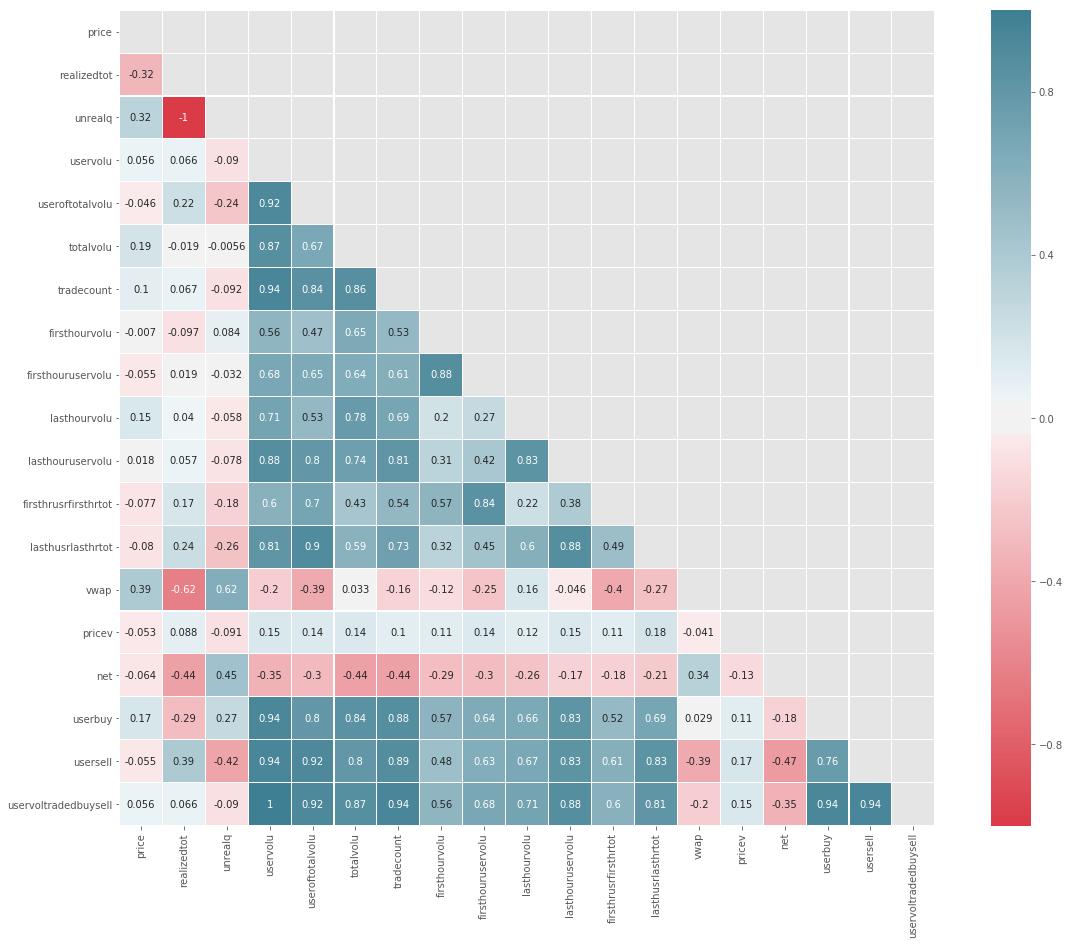

In [10]:
corr = data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize=(20, 15))

cmap = sns.diverging_palette(10, 220, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.1, annot=True);


# net does not seem to be closely correlated, postitively or negatively, to any other variables
# realizedtot and unrealq have a nearly perfect negative correlation

# uservoltradebuysell and uservolu - perfect positive correlation

***
# Histograms for each numerical variable to view distributions
### I wanted to look at all of the histograms to get a feel for the data of each variable
### I used sns.distplot so that I can view the histogram and the kernal density estimation at the same time
##### Cherilyn

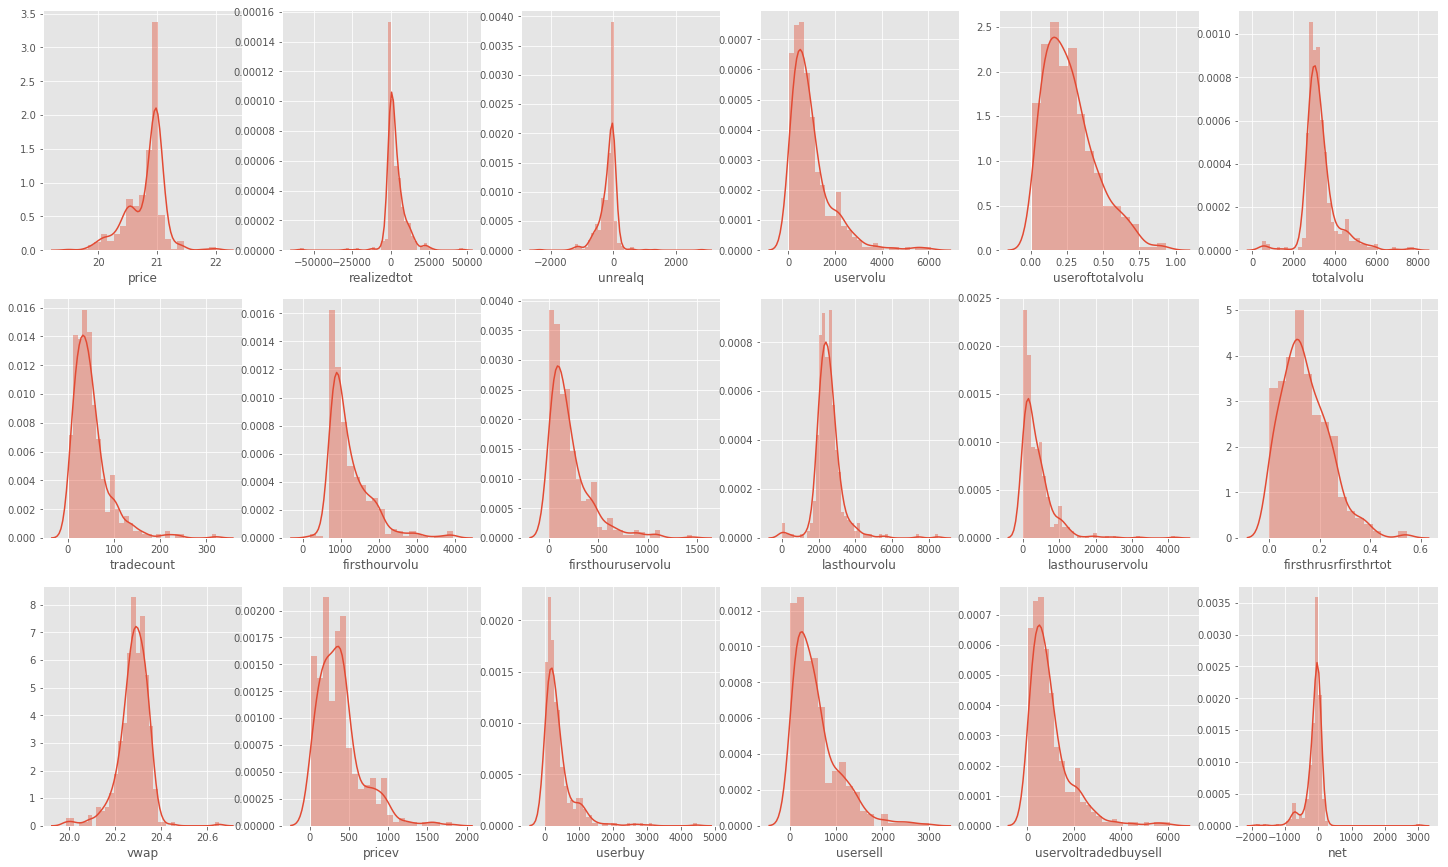

In [11]:
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(3, 6, 1)
sns.distplot(data.price)
#mostly centered, a little right skewed

ax = fig.add_subplot(3, 6, 2)
sns.distplot(data.realizedtot)
#mostly centered, a little left skewed

ax = fig.add_subplot(3, 6, 3)
sns.distplot(data.unrealq)
#mostly centered, a little right skewed

ax = fig.add_subplot(3, 6, 4)
sns.distplot(data.uservolu)
#skewed to the right

ax = fig.add_subplot(3, 6, 5)
sns.distplot(data.useroftotalvolu)
#skewed to the right

ax = fig.add_subplot(3, 6, 6)
sns.distplot(data.totalvolu)
#skewed to the right but not all the way over

ax = fig.add_subplot(3, 6, 7)
sns.distplot(data.tradecount)
#skewed to the right

ax = fig.add_subplot(3, 6, 8)
sns.distplot(data.firsthourvolu)
#skewed to the right but not all the way over

ax = fig.add_subplot(3, 6, 9)
sns.distplot(data.firsthouruservolu)
#skewed to the right

ax = fig.add_subplot(3, 6, 10)
sns.distplot(data.lasthourvolu)
#skewed to the right

ax = fig.add_subplot(3, 6, 11)
sns.distplot(data.lasthouruservolu)
#skewed to the right but not all the way over

ax = fig.add_subplot(3, 6, 12)
sns.distplot(data.firsthrusrfirsthrtot)
#skewed to the right

ax = fig.add_subplot(3, 6, 13)
sns.distplot(data.vwap)
#mostly centered, a little right skewed

ax = fig.add_subplot(3, 6, 14)
sns.distplot(data.pricev)
#skewed to the right

ax = fig.add_subplot(3, 6, 15)
sns.distplot(data.userbuy)
#skewed to the right

ax = fig.add_subplot(3, 6, 16)
sns.distplot(data.usersell)
#skewed to the right

ax = fig.add_subplot(3, 6, 17)
sns.distplot(data.uservoltradedbuysell)
#skewed to the right

ax = fig.add_subplot(3, 6, 18)
sns.distplot(data.net);
#mostly centered, a little right skewed

## 'Histograms' for the categorical data

M    212
F    180
Name: Gender, dtype: int64

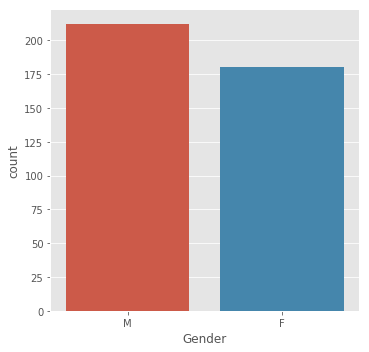

In [12]:
sns.catplot(x='Gender', kind='count', data=data);
#slightly more males than females; this surprises me I expected way more males

data['Gender'].value_counts()

2    119
3    113
4     91
1     43
5     26
Name: Q2, dtype: int64

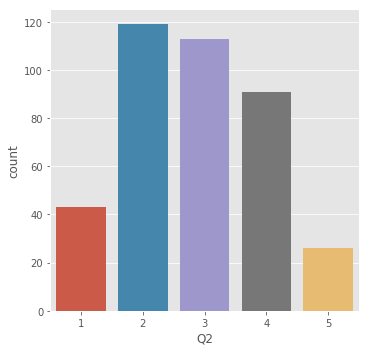

In [13]:
sns.catplot(x='Q2', kind='count', data=data);
#Mixed answers about whether the information provided was used when trading

data['Q2'].value_counts()

2    184
3     79
1     62
4     57
5     10
Name: Q9, dtype: int64

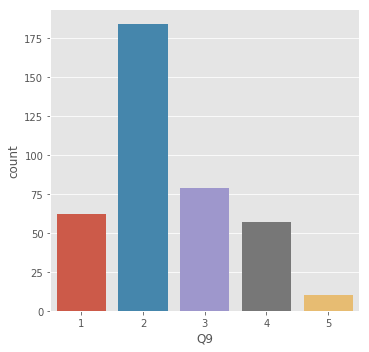

In [14]:
sns.catplot(x='Q9', kind='count', data=data);
#Most people agreed that they could have traded better if they were given more information
#this is interesting given the responses to the previous question where about 40% indicated that the used all of the information provided

data['Q9'].value_counts()

2    224
3     85
1     52
4     26
5      5
Name: Q12, dtype: int64

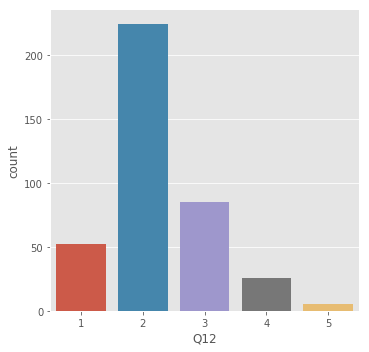

In [15]:
sns.catplot(x='Q12', kind='count', data=data);
#Most people agreed that the source of the information impacted their decision
#about 8% disagree or strongly disagree

data['Q12'].value_counts()

2    195
3     88
4     65
1     31
5     13
Name: Q14, dtype: int64

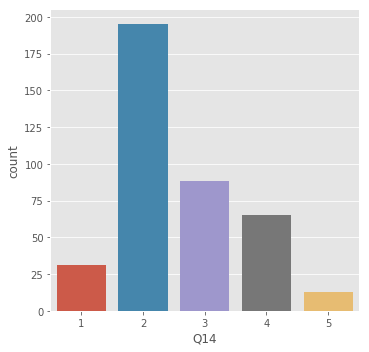

In [16]:
sns.catplot(x='Q14', kind='count', data=data);
#Most people agreed that the medium of the information impacted their decision
#about 19% disagree or strongly disagree

data['Q14'].value_counts()

2    231
1     89
3     51
4     16
5      5
Name: Q15, dtype: int64

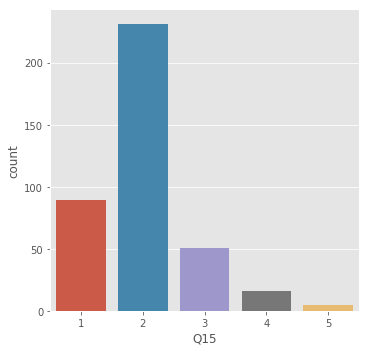

In [17]:
sns.catplot(x='Q15', kind='count', data=data);
#High amount of people beleive that more stock specific info could have imporved thier profits
# highest number of agrees and of strongly agrees
#only about 4.6% disagree or strongly disagree

data['Q15'].value_counts()

N    313
Y     79
Name: Q30, dtype: int64

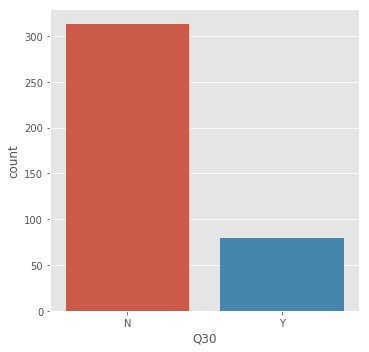

In [18]:
sns.catplot(x='Q30', kind='count', data=data);
#Much higher amount of people never had experience trading before
#almost 80%

data['Q30'].value_counts()

S6     54
S3     53
S10    52
S5     50
S7     49
S2     43
S4     36
S9     29
S1     14
S8     12
Name: desk, dtype: int64

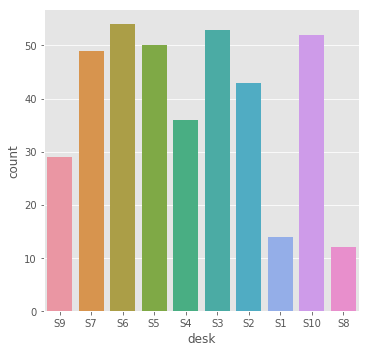

In [19]:
sns.catplot(x='desk', kind='count', data=data);
#varied number of transactions from each desk
#about half of the desks around 50
#2 desks less than 15

data['desk'].value_counts()

***
# Looking at box plots of all of the numerical variables to see the spread of data and to look for outliers
##### Cherilyn

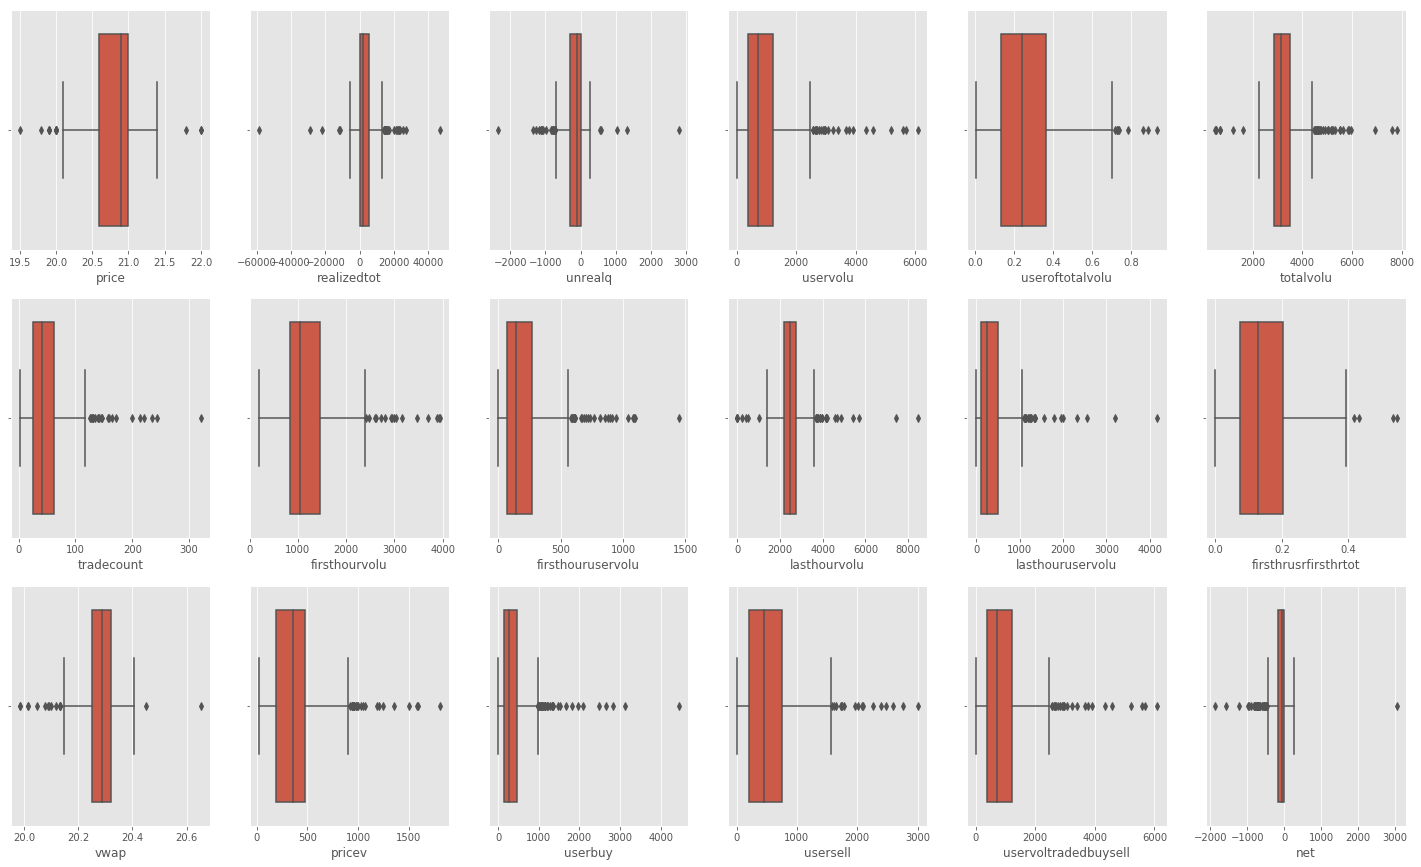

In [20]:
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(3, 6, 1)
sns.boxplot(data.price)
#low variability in the price, ranged from 19.5 to 22
#middle 50% of the data between 20.6 and 21
#outliers below 20 and above 21.5

ax = fig.add_subplot(3, 6, 2)
sns.boxplot(data.realizedtot)
#middle 50% of the data between 32.5 and 5414.4
#outliers above 13487 going upto 46923.9 and below -8041 going down to -58791.4
#more outliers above than below

ax = fig.add_subplot(3, 6, 3)
sns.boxplot(data.unrealq)
#middle 50% of the data between -271 and 0
#outliers above 406.5 going upto 2811 and below -677.5 going down to -2349
#more ourliers below than above

ax = fig.add_subplot(3, 6, 4)
sns.boxplot(data.uservolu)
#most of the data below 2000
##middle 50% of the data between 1190 and 378.5
#outliers above 2407 going upto 6107
#nothing below 0

ax = fig.add_subplot(3, 6, 5)
sns.boxplot(data.useroftotalvolu)
#middle 50% of the data between 13% and 35%
#outliers aabove 68% up to 93% 
#nothing below 0

ax = fig.add_subplot(3, 6, 6)
sns.boxplot(data.totalvolu)
#middle 50% of the data between 2860 and 3504
#outliers above 4470 upto 7800 and below 1894 down to 498

ax = fig.add_subplot(3, 6, 7)
sns.boxplot(data.tradecount)
#most of the data less than 100
#middle 50% between 60.5 and 24
#outliers above 115 
#nothing below 0

ax = fig.add_subplot(3, 6, 8)
sns.boxplot(data.firsthourvolu)
#most of the data less than 2000
#middle 50% between 838 and 1441
#outliers above 2345.5 upto 4466
#nothing below 0

ax = fig.add_subplot(3, 6, 9)
sns.boxplot(data.firsthouruservolu)
#most of the data less than 500
#middle 50% between 70 and 267
#outliers above 562.5 upto 1450
#nothing below 0

ax = fig.add_subplot(3, 6, 10)
sns.boxplot(data.lasthourvolu)
#middle 50% between 2166 and 2752
#outliers above 3181 upto 8474 and below 1557 down to zero
#nothing below 0

ax = fig.add_subplot(3, 6, 11)
sns.boxplot(data.lasthouruservolu)
#middle 50% between 102 and 490
#outliers above 1772 upto 4182
#nothing below 0

ax = fig.add_subplot(3, 6, 12)
sns.boxplot(data.firsthrusrfirsthrtot)
#middle 50% between 7% and 19%
#outliers above 37% upto 54%
#nothing below 0


ax = fig.add_subplot(3, 6, 13)
sns.boxplot(data.vwap)
# data between 19.98 and 20.65
#middle 50% between 20.25 and 20.32
#outliers above 20.425 and below 20.145

ax = fig.add_subplot(3, 6, 14)
sns.boxplot(data.pricev)
#middle 50% between 206 and 476.1
#outliers above 881 upto 1809
#nothing below 20.5

ax = fig.add_subplot(3, 6, 15)
sns.boxplot(data.userbuy)
#middle 50% between 140 and 457.5
#outliers above 933 upto 4459
#nothing below 0

ax = fig.add_subplot(3, 6, 16)
sns.boxplot(data.usersell)
#middle 50% between 210.5 and 732
#outliers above 1514 upto 3014
#nothing below 0

ax = fig.add_subplot(3, 6, 17)
sns.boxplot(data.uservoltradedbuysell)
#middle 50% between 378.5 and 1190
#outliers above 2407 upto 6107
#nothing below 0

ax = fig.add_subplot(3, 6, 18)
sns.boxplot(data.net);
#middle 50% between -165.7 and 5.6
#outliers above 262.5 upto 3050 and below -422.65 down to -1861.5
#more outliers below than above #one at 3050 seems to be drastic outlier


***
# Creating scatterplots and violin plots between some of the categorical data and the survey data
### note: small problem with violin plots - for some data all responses are all nonnegative however the violin plot shows in the negative
##### Cherilyn

## First looking at comparing different variables from the trading set to a users gender and experience

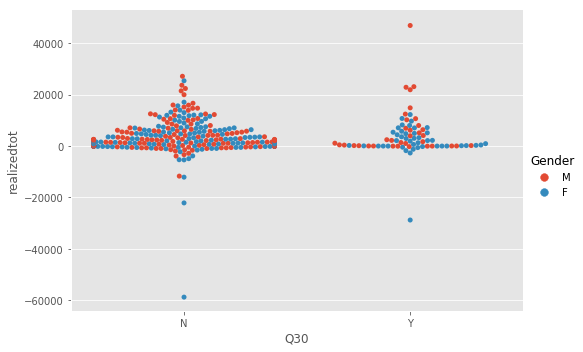

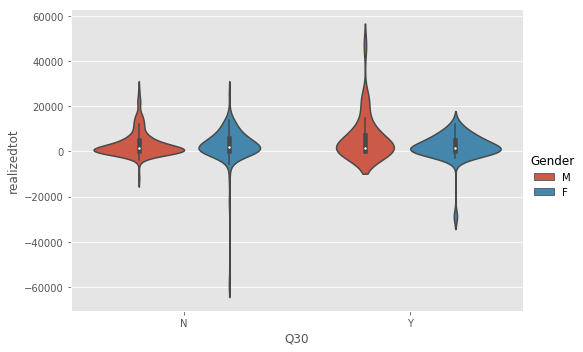

In [21]:
sns.catplot(x="Q30", y="realizedtot", hue="Gender", aspect=1.5, kind="swarm", data=data);
sns.catplot(x="Q30", y="realizedtot", hue="Gender", aspect=1.5, kind="violin", data=data);

#within both the experienced and un experience groups there were females with a lower realized total than the males
#in the experienced group there were a few males who acheived a higher realized total
#in all of the groups the majority of the data is centered at 0

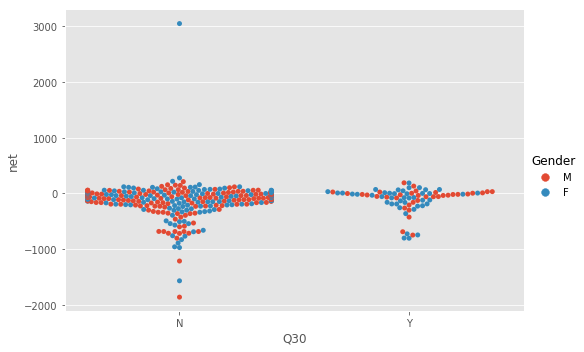

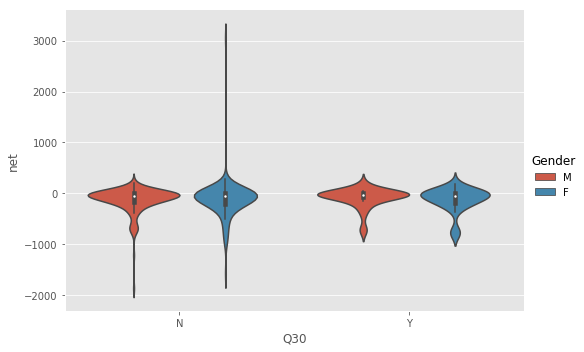

In [22]:
sns.catplot(x="Q30", y="net", hue="Gender", aspect=1.5, kind="swarm", data=data);
sns.catplot(x="Q30", y="net", hue="Gender", aspect=1.5, kind="violin", data=data);

# for the net amount of money after adjustments only one user really made money (this was a female with no previous experience)
# Most of the data is centered around a net amount of 0
# it appears as though more of the unexperienced users lost money

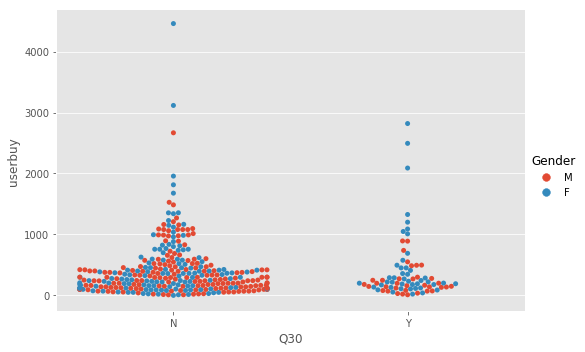

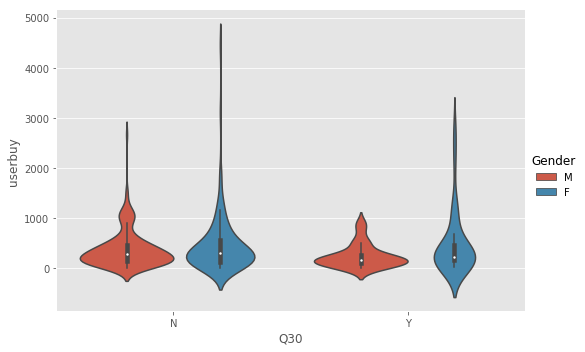

In [23]:
sns.catplot(x="Q30", y="userbuy", hue="Gender", aspect=1.5, kind="swarm", data=data);
sns.catplot(x="Q30", y="userbuy", hue="Gender", aspect=1.5, kind="violin", data=data);

#males buy more than females
#unexperienced buy more than experienced

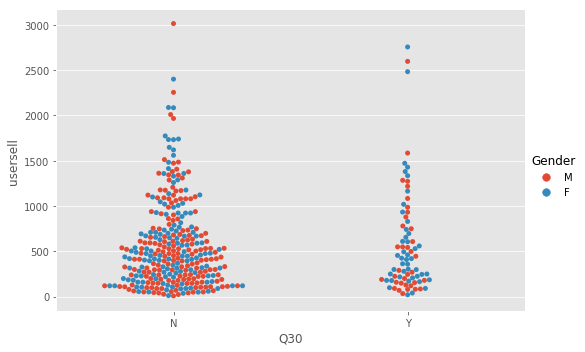

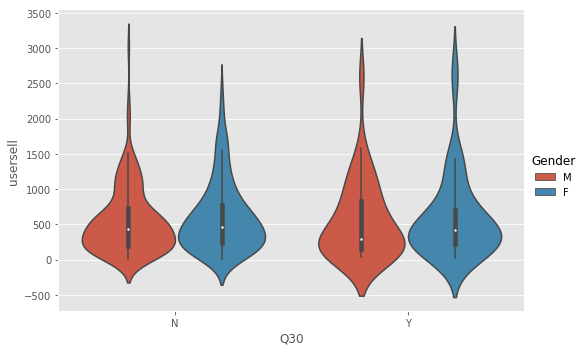

In [24]:
sns.catplot(x="Q30", y="usersell", hue="Gender", aspect=1.5, kind="swarm", data=data);
sns.catplot(x="Q30", y="usersell", hue="Gender", aspect=1.5, kind="violin", data=data);

#no major difference in the amount of stock sold for gender or experience

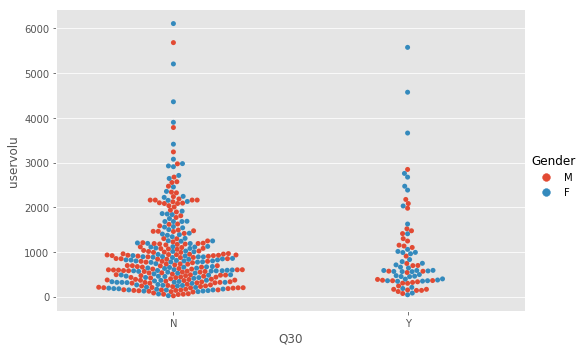

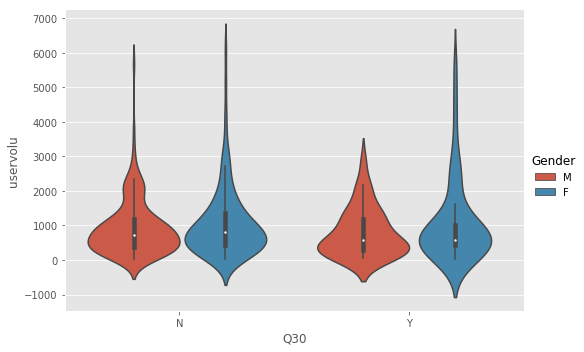

In [25]:
sns.catplot(x="Q30", y="uservolu", hue="Gender", aspect=1.5, kind="swarm", data=data);
sns.catplot(x="Q30", y="uservolu", hue="Gender", aspect=1.5, kind="violin", data=data);

#lower amount of total volume for experienced males; this is due to the lower volume bought by experienced males

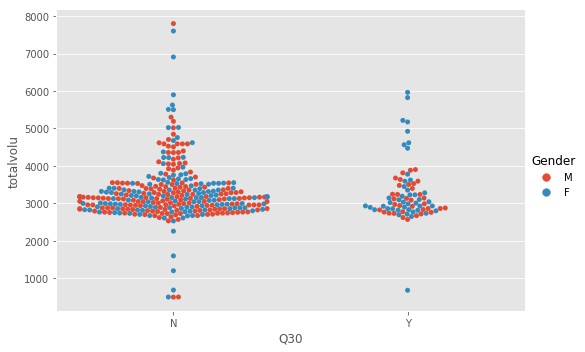

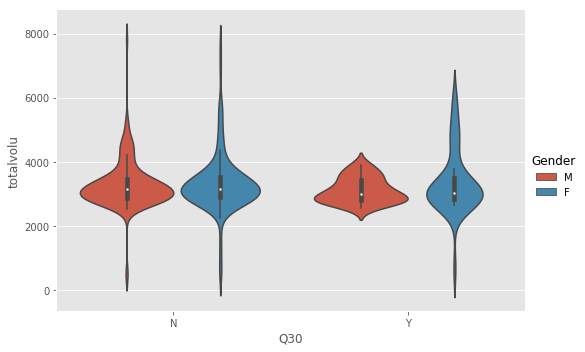

In [26]:
sns.catplot(x="Q30", y="totalvolu", hue="Gender", aspect=1.5, kind="swarm", data=data);
sns.catplot(x="Q30", y="totalvolu", hue="Gender", aspect=1.5, kind="violin", data=data);

#majority of total volume is centered around 3000
# lower amount of total volume for experienced males

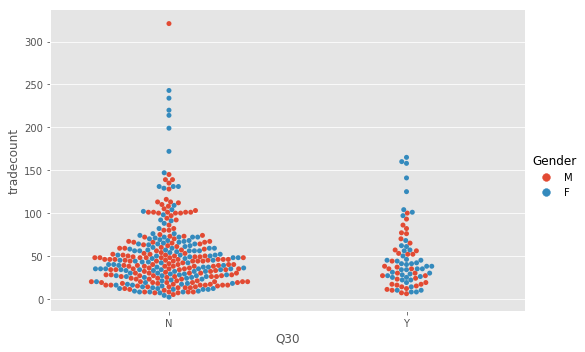

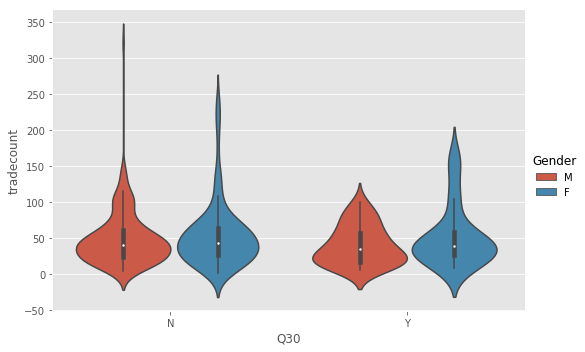

In [27]:
sns.catplot(x="Q30", y="tradecount", hue="Gender", aspect=1.5, kind="swarm", data=data);
sns.catplot(x="Q30", y="tradecount", hue="Gender", aspect=1.5, kind="violin", data=data);

#trade count is higher for unexperienced users
#most counts below 50

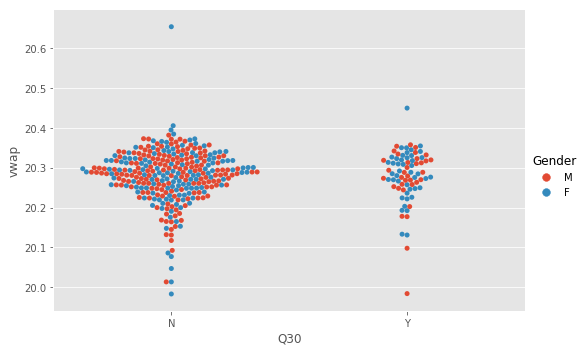

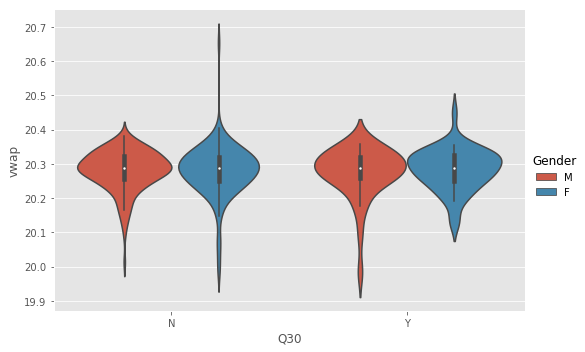

In [28]:
sns.catplot(x="Q30", y="vwap", hue="Gender", aspect=1.5, kind="swarm", data=data);
sns.catplot(x="Q30", y="vwap", hue="Gender", aspect=1.5, kind="violin", data=data);

#mostly clustered about 20.3 some data spread below

## Comparing a person's net profit to their answers to each of the questions and sorting by gender within each question

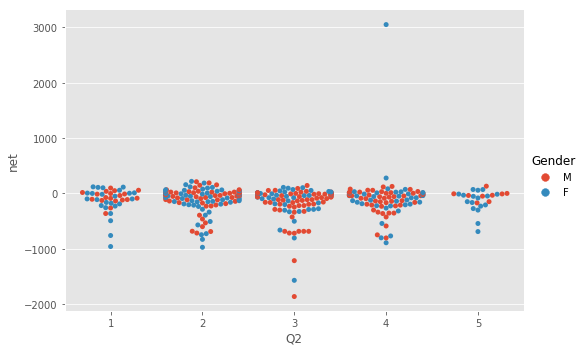

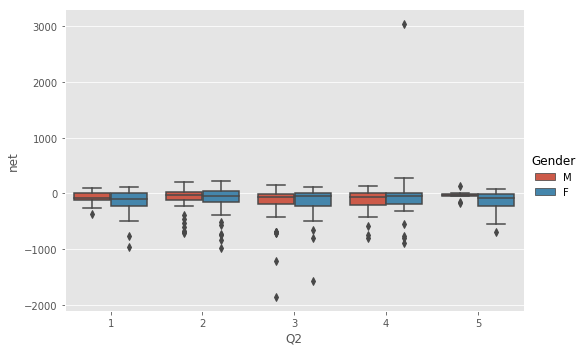

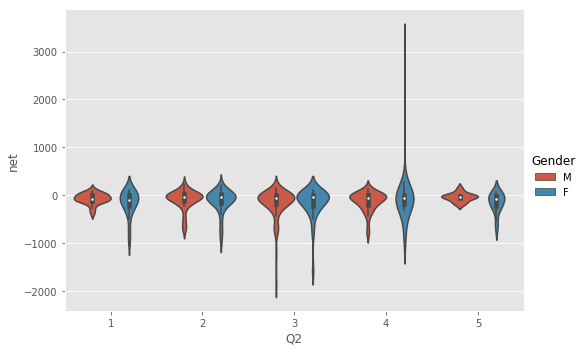

In [29]:
sns.catplot(x="Q2", y="net", hue='Gender', aspect=1.5, kind="swarm", data=data);
sns.catplot(x="Q2", y="net", hue="Gender", aspect=1.5, kind="box", data=data);
sns.catplot(x="Q2", y="net", hue="Gender", aspect=1.5, kind="violin", data=data);

# Close to similar performance across answers
#males in the strongly agree and strongly disagree group did better than females in same group (by better I mean there were fewer negative outliers)

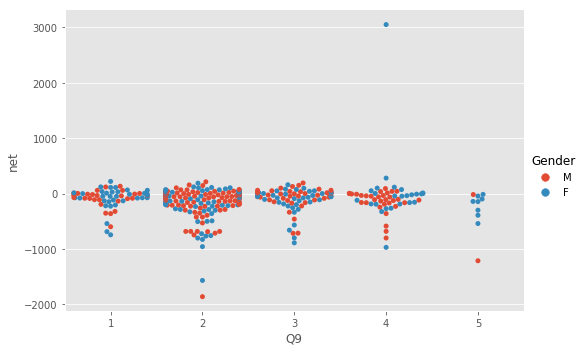

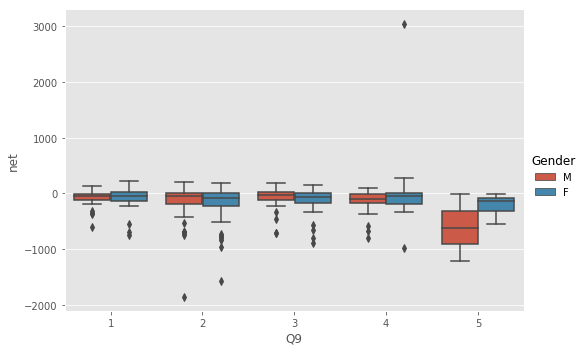

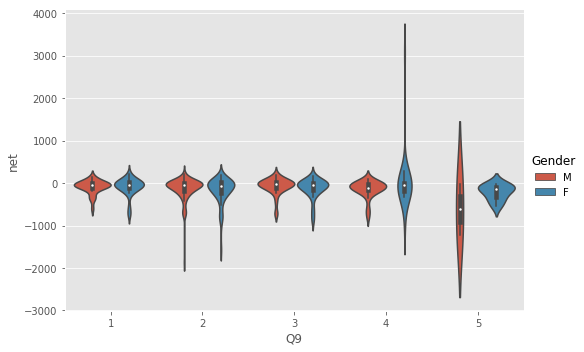

In [30]:
sns.catplot(x="Q9", y="net", hue='Gender', aspect=1.5, kind="swarm", data=data);
sns.catplot(x="Q9", y="net", hue="Gender", aspect=1.5, kind="box", data=data);
sns.catplot(x="Q9", y="net", hue="Gender", aspect=1.5, kind="violin", data=data);

# close to similar performance for males and females with in all of the answers except for disagree and strongly disagree
#more variety of performance for males who disagreed

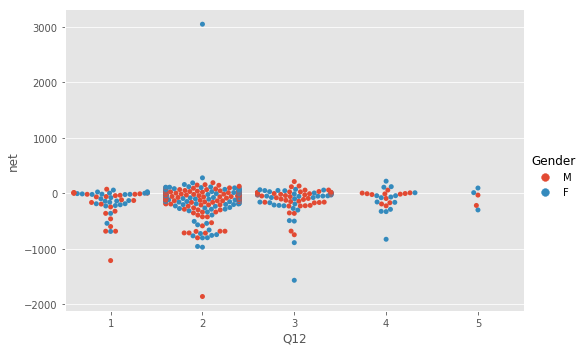

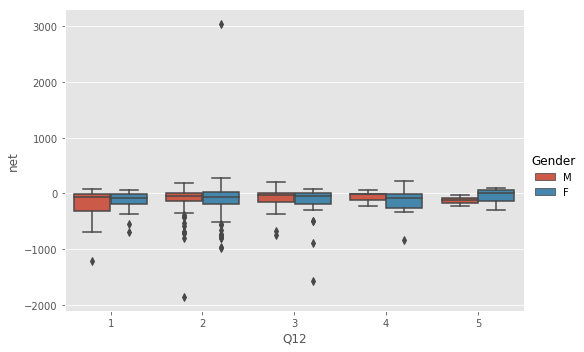

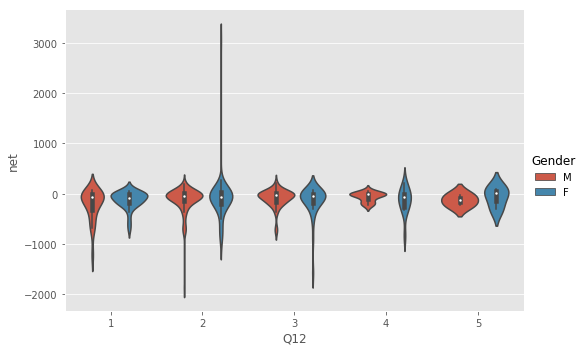

In [31]:
sns.catplot(x="Q12", y="net", hue='Gender', aspect=1.5, kind="swarm", data=data);
sns.catplot(x="Q12", y="net", hue="Gender", aspect=1.5, kind="box", data=data);
sns.catplot(x="Q12", y="net", hue="Gender", aspect=1.5, kind="violin", data=data);

# close to similar performance between each answer between males and females
# some more varied performance in females in the disagree category 

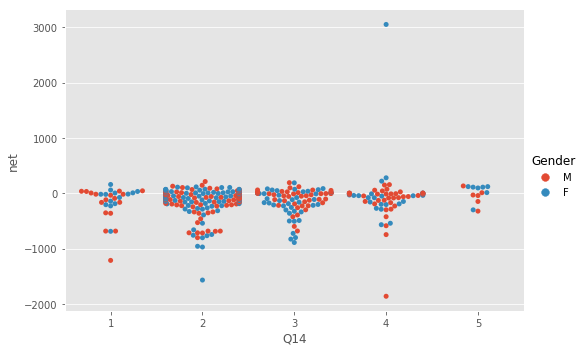

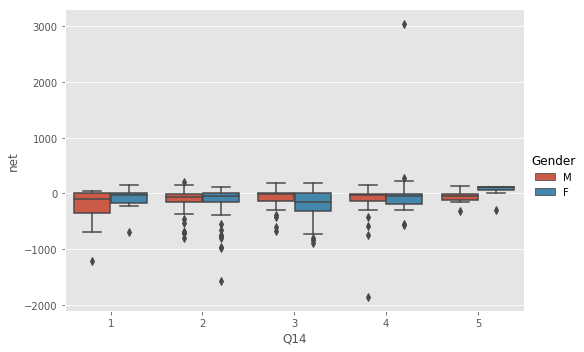

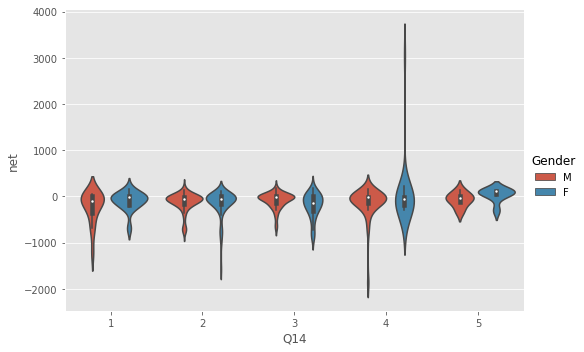

In [32]:
sns.catplot(x="Q14", y="net", hue='Gender', aspect=1.5, kind="swarm", data=data);
sns.catplot(x="Q14", y="net", hue="Gender", aspect=1.5, kind="box", data=data);
sns.catplot(x="Q14", y="net", hue="Gender", aspect=1.5, kind="violin", data=data);

# more varied performance in males who strongly agreed that the medium mattered 
# more varied performace in females who were neutral
#a little better performance for females wo strongly disagreed

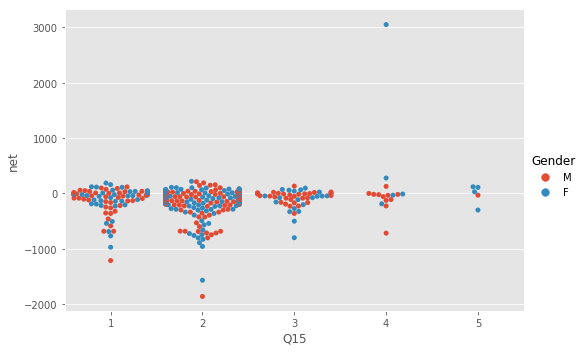

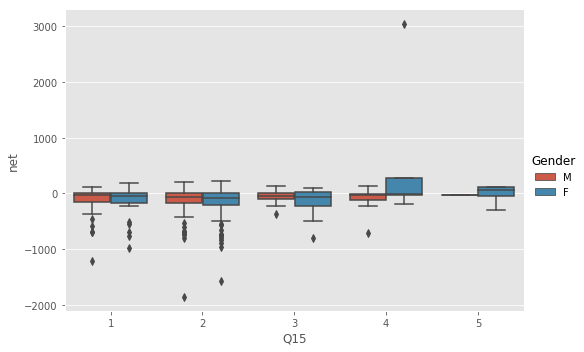

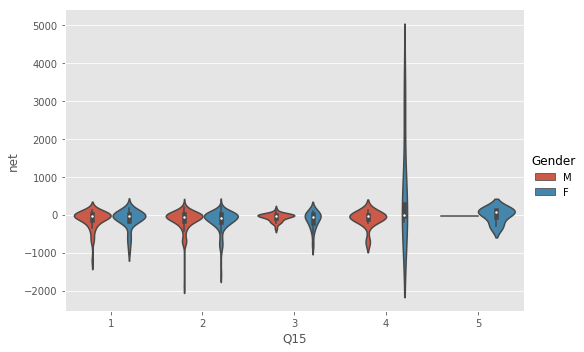

In [33]:
sns.catplot(x="Q15", y="net", hue='Gender', aspect=1.5, kind="swarm", data=data);
sns.catplot(x="Q15", y="net", hue="Gender", aspect=1.5, kind="box", data=data);
sns.catplot(x="Q15", y="net", hue="Gender", aspect=1.5, kind="violin", data=data);

# Close to even performance between males in females in the agreeing categories
#more varied performance in the other categories

## Comparing a person's net profit to their answers to each of the questions this time sorting by experience within each question

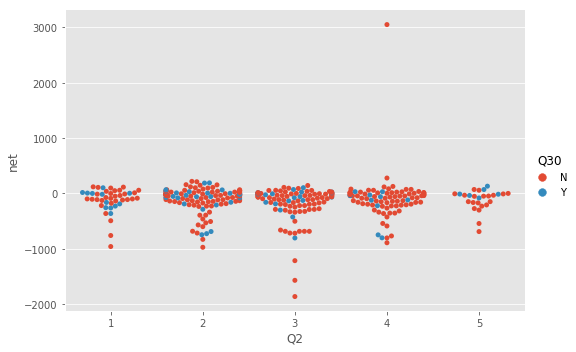

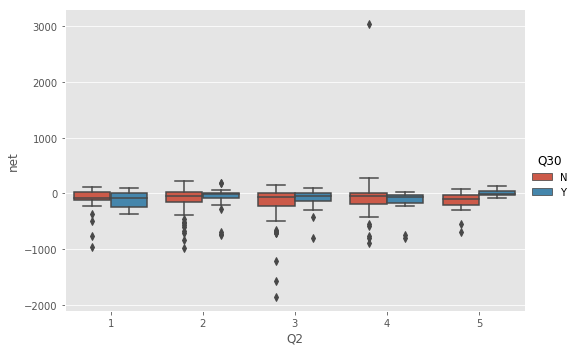

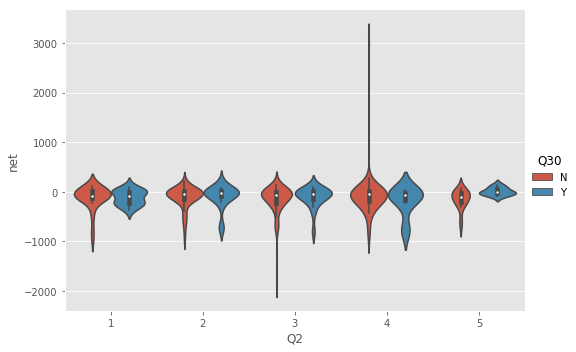

In [34]:
sns.catplot(x="Q2", y="net", hue="Q30", aspect=1.5, kind="swarm", data=data);
sns.catplot(x="Q2", y="net", hue="Q30", aspect=1.5, kind="box", data=data);
sns.catplot(x="Q2", y="net", hue="Q30", aspect=1.5, kind="violin", data=data);

# the user with the higherst net did not use all of the data provided
# the users who lost the most were neutral towards using all of the data provided

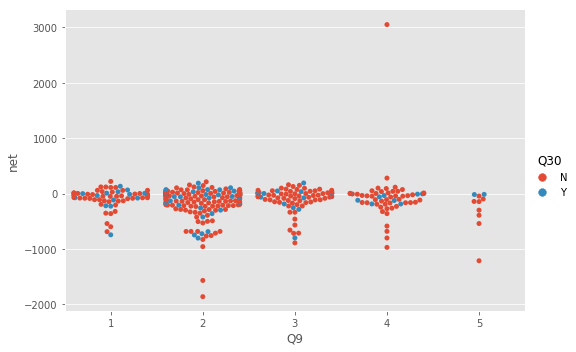

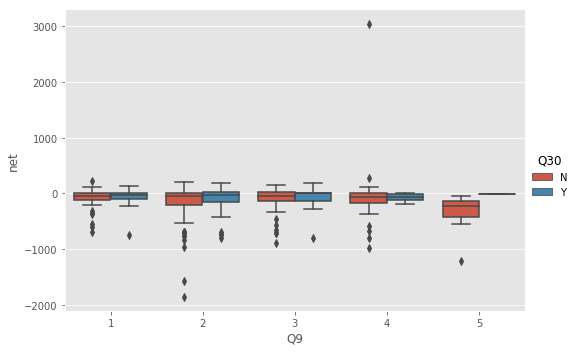

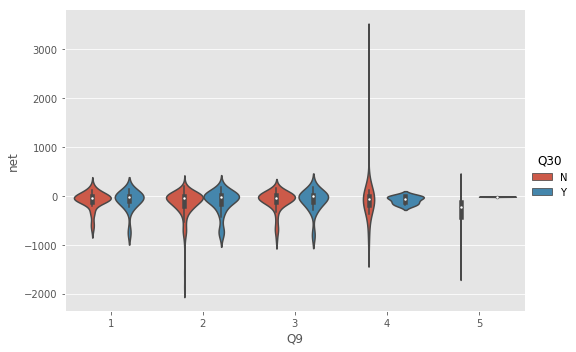

In [35]:
sns.catplot(x="Q9", y="net", hue="Q30", aspect=1.5, kind="swarm", data=data);
sns.catplot(x="Q9", y="net", hue="Q30", aspect=1.5, kind="box", data=data);
sns.catplot(x="Q9", y="net", hue="Q30", aspect=1.5, kind="violin", data=data);

# the user with the higherst net disagreed that more information could have benefited her
# the users who lost the most agreed that they could improve their performance with more information

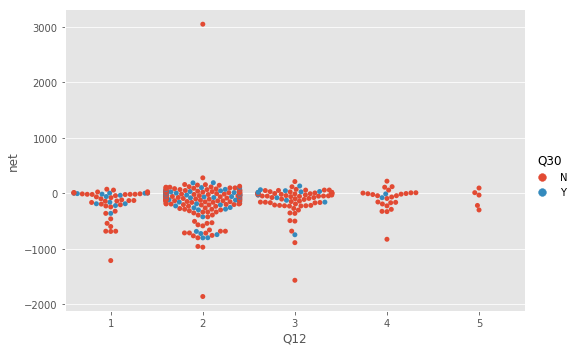

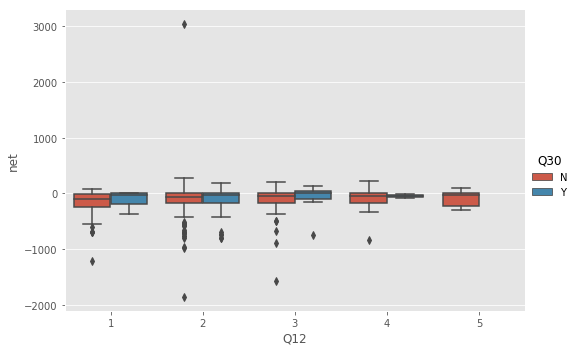

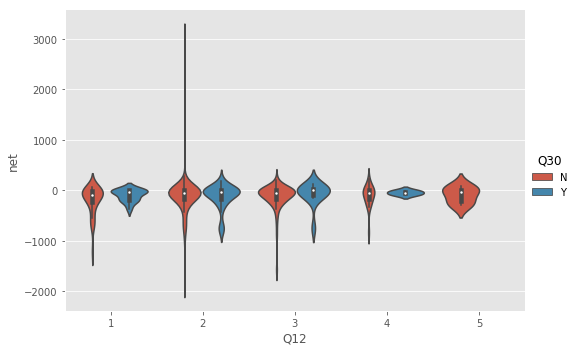

In [36]:
sns.catplot(x="Q12", y="net", hue="Q30", aspect=1.5, kind="swarm", data=data);
sns.catplot(x="Q12", y="net", hue="Q30", aspect=1.5, kind="box", data=data);
sns.catplot(x="Q12", y="net", hue="Q30", aspect=1.5, kind="violin", data=data);

# low amount of users diagreed that the source impacted their decisions

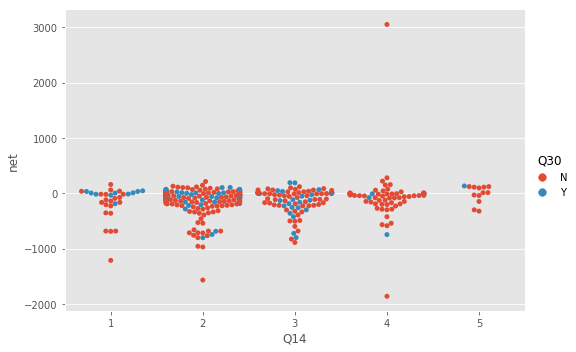

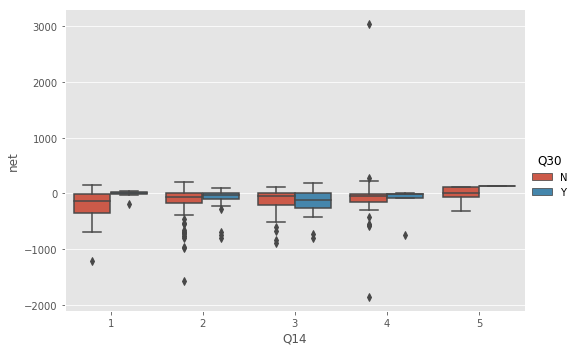

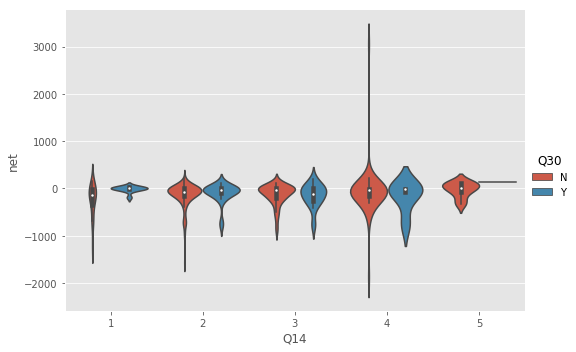

In [37]:
sns.catplot(x="Q14", y="net", hue="Q30", aspect=1.5, kind="swarm", data=data);
sns.catplot(x="Q14", y="net", hue="Q30", aspect=1.5, kind="box", data=data);
sns.catplot(x="Q14", y="net", hue="Q30", aspect=1.5, kind="violin", data=data);

# low amount of users diagreed that the medium impacted their decisions

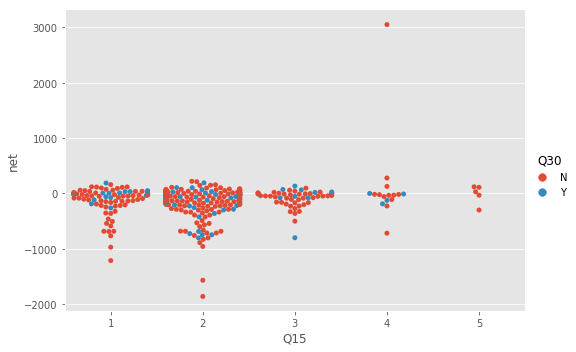

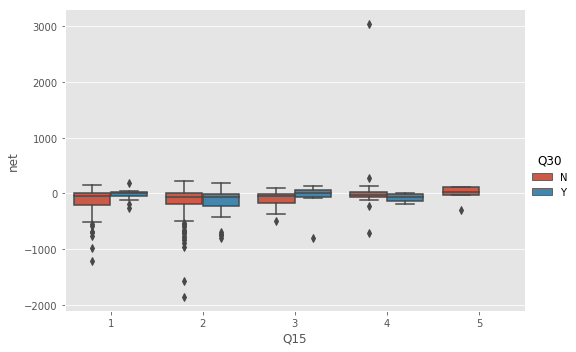

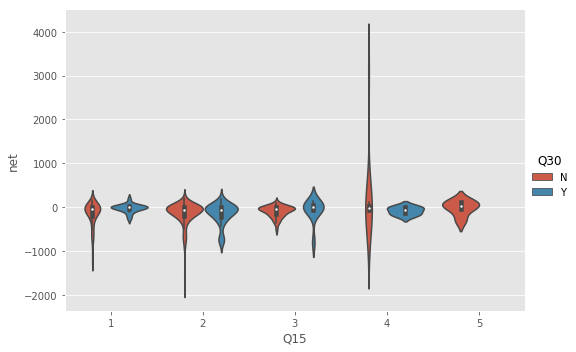

In [38]:
sns.catplot(x="Q15", y="net", hue="Q30", aspect=1.5, kind="swarm", data=data);
sns.catplot(x="Q15", y="net", hue="Q30", aspect=1.5, kind="box", data=data);
sns.catplot(x="Q15", y="net", hue="Q30", aspect=1.5, kind="violin", data=data);

# the user with the highest net disagreed that more stock specific information could have benefited her
# the users who lost the most agreed that they could improve their performance with more stock specific information

## Comparing a persons realized total to their answers to each of the questions and sorting by experience within each question

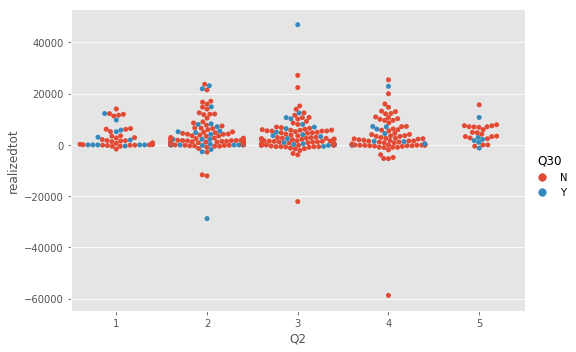

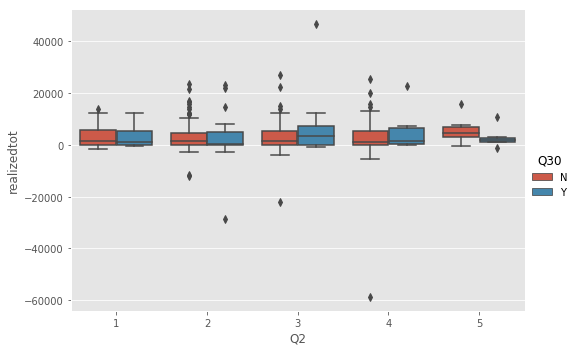

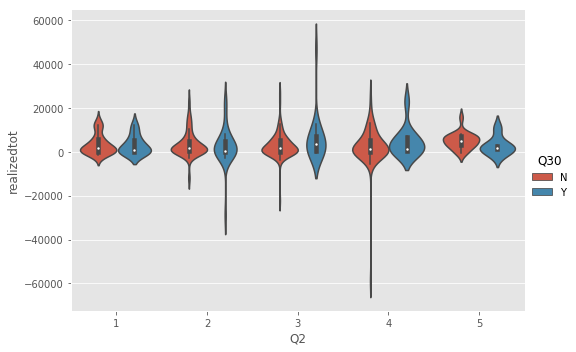

In [39]:
sns.catplot(x="Q2", y="realizedtot", hue="Q30", aspect=1.5, kind="swarm", data=data);
sns.catplot(x="Q2", y="realizedtot", hue="Q30", aspect=1.5, kind="box", data=data);
sns.catplot(x="Q2", y="realizedtot", hue="Q30", aspect=1.5, kind="violin", data=data);

# the user with the lowest realize total did not use all of the information provided

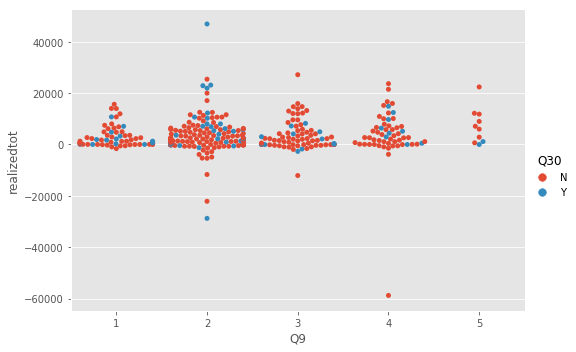

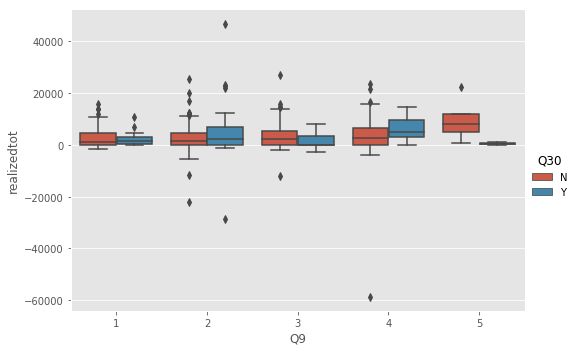

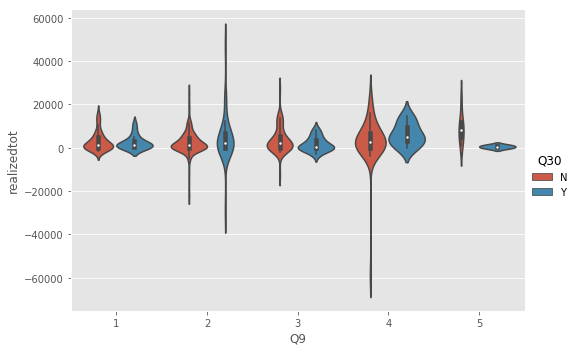

In [40]:
sns.catplot(x="Q9", y="realizedtot", hue="Q30", aspect=1.5, kind="swarm", data=data);
sns.catplot(x="Q9", y="realizedtot", hue="Q30", aspect=1.5, kind="box", data=data);
sns.catplot(x="Q9", y="realizedtot", hue="Q30", aspect=1.5, kind="violin", data=data);

#the user with the lowest total also did not believe that more information could improve their net profit

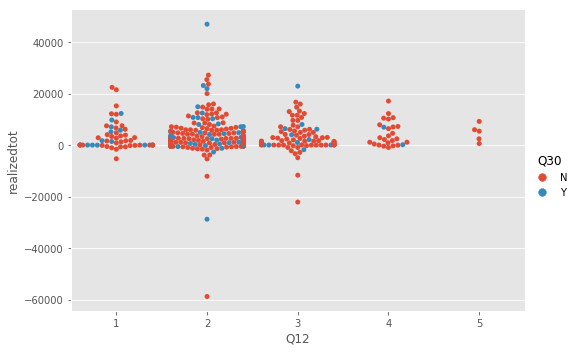

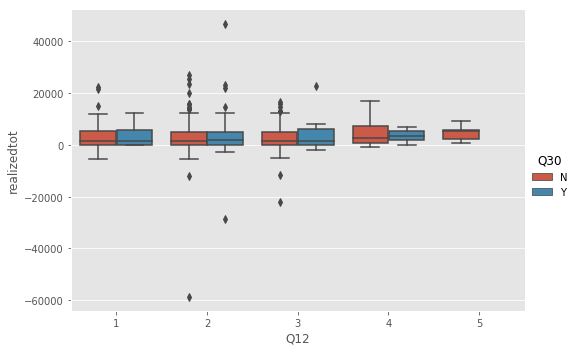

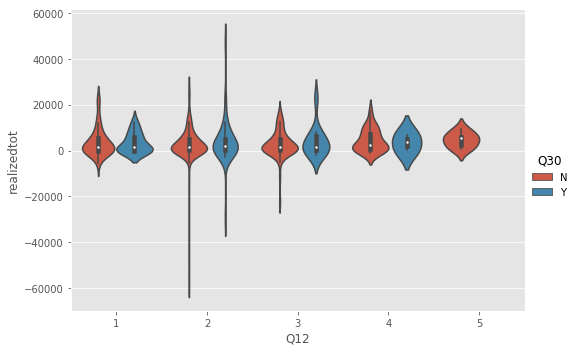

In [41]:
sns.catplot(x="Q12", y="realizedtot", hue="Q30", aspect=1.5, kind="swarm", data=data);
sns.catplot(x="Q12", y="realizedtot", hue="Q30", aspect=1.5, kind="box", data=data);
sns.catplot(x="Q12", y="realizedtot", hue="Q30", aspect=1.5, kind="violin", data=data);

#most users find the source impactful

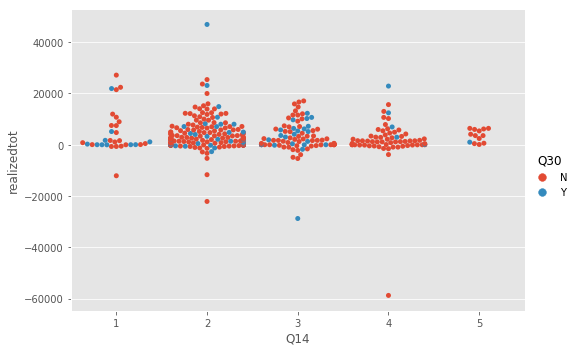

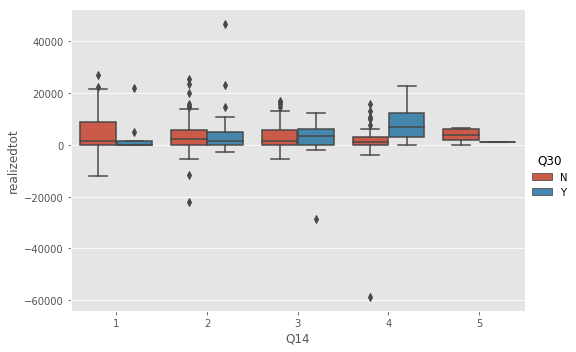

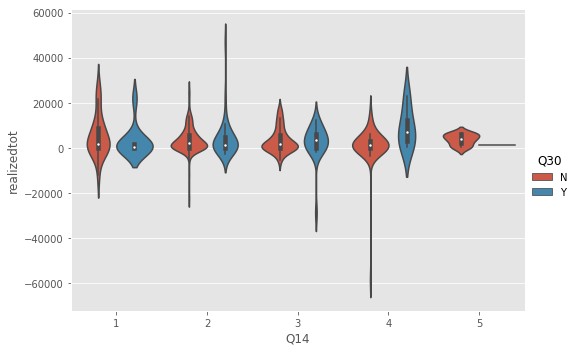

In [42]:
sns.catplot(x="Q14", y="realizedtot", hue="Q30", aspect=1.5, kind="swarm", data=data);
sns.catplot(x="Q14", y="realizedtot", hue="Q30", aspect=1.5, kind="box", data=data);
sns.catplot(x="Q14", y="realizedtot", hue="Q30", aspect=1.5, kind="violin", data=data);
# many users find medium to be impactful

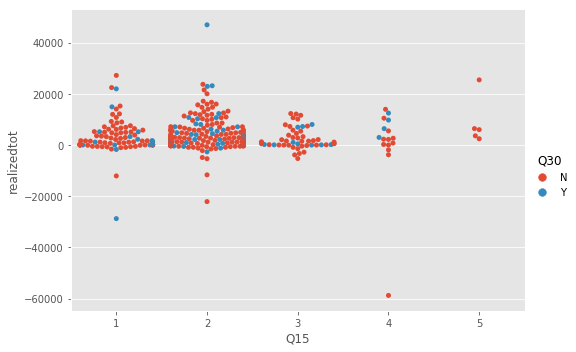

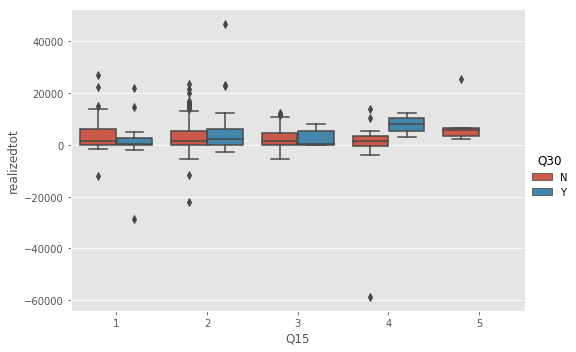

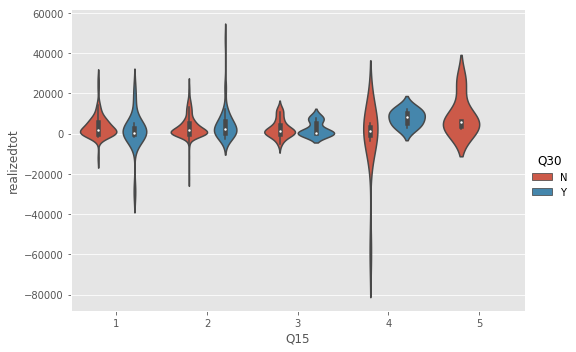

In [43]:
sns.catplot(x="Q15", y="realizedtot", hue="Q30", aspect=1.5, kind="swarm", data=data);
sns.catplot(x="Q15", y="realizedtot", hue="Q30", aspect=1.5, kind="box", data=data);
sns.catplot(x="Q15", y="realizedtot", hue="Q30", aspect=1.5, kind="violin", data=data);
#most users feel more stock specific information would help them

## Comparing a person trade count to their answers to each of the questions and sorting by experience within each question

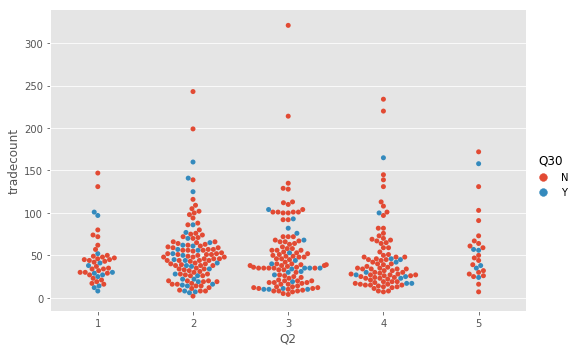

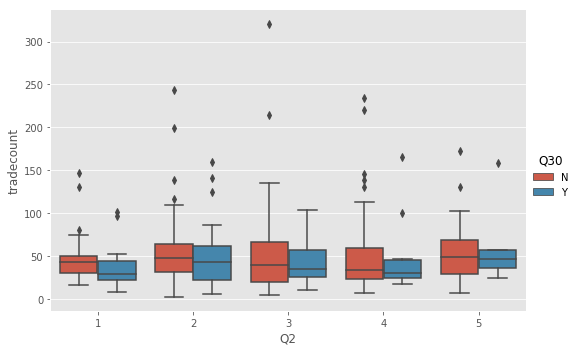

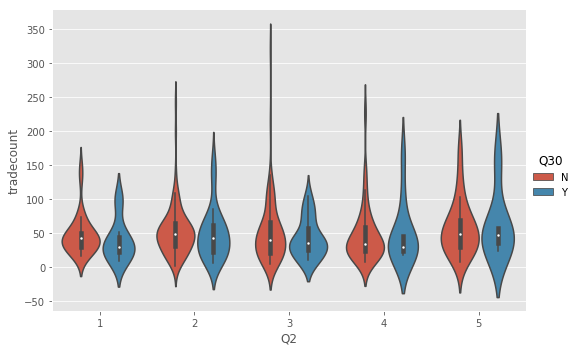

In [44]:
sns.catplot(x="Q2", y="tradecount", hue="Q30", aspect=1.5, kind="swarm", data=data);
sns.catplot(x="Q2", y="tradecount", hue="Q30", aspect=1.5, kind="box", data=data);
sns.catplot(x="Q2", y="tradecount", hue="Q30", aspect=1.5, kind="violin", data=data);

#answers vary across trade counts

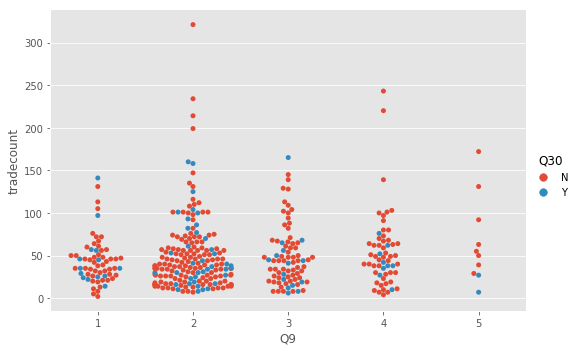

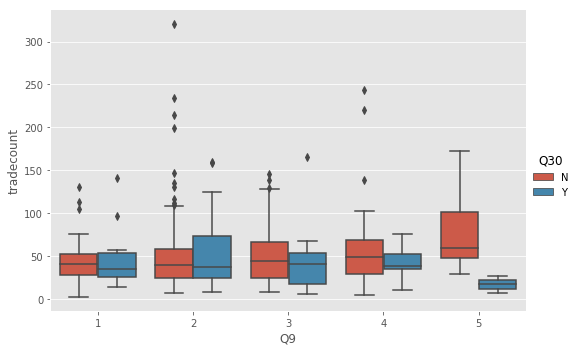

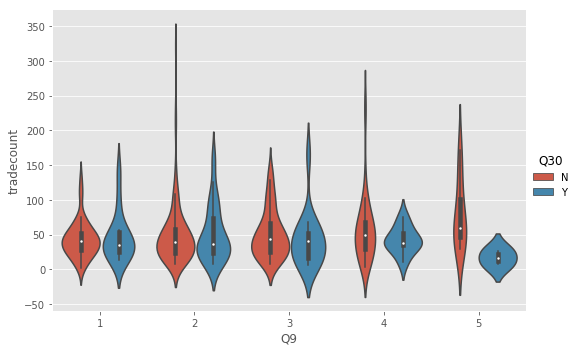

In [45]:
sns.catplot(x="Q9", y="tradecount", hue="Q30", aspect=1.5, kind="swarm", data=data);
sns.catplot(x="Q9", y="tradecount", hue="Q30", aspect=1.5, kind="box", data=data);
sns.catplot(x="Q9", y="tradecount", hue="Q30", aspect=1.5, kind="violin", data=data);

#answers vary across trade count

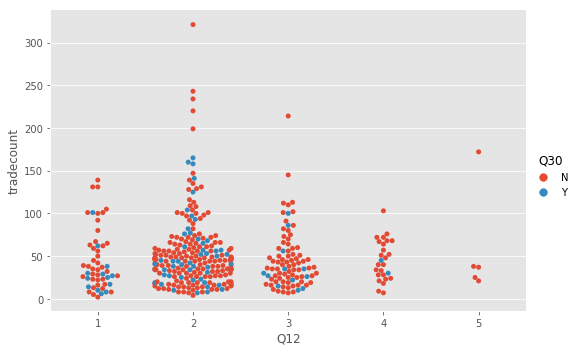

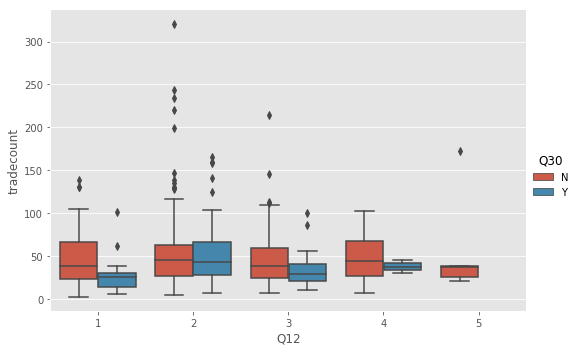

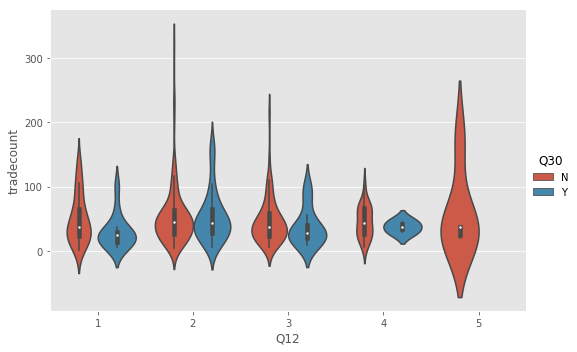

In [46]:
sns.catplot(x="Q12", y="tradecount", hue="Q30", aspect=1.5, kind="swarm", data=data);
sns.catplot(x="Q12", y="tradecount", hue="Q30", aspect=1.5, kind="box", data=data);
sns.catplot(x="Q12", y="tradecount", hue="Q30", aspect=1.5, kind="violin", data=data);

#answers vary across trade count, very little of experienced users disagree that the source is impactful

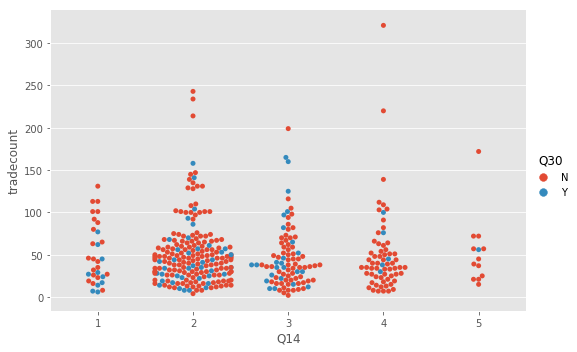

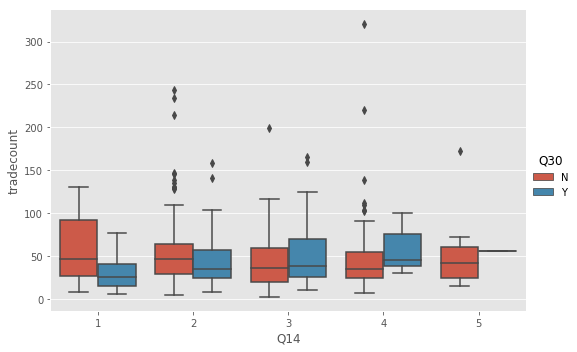

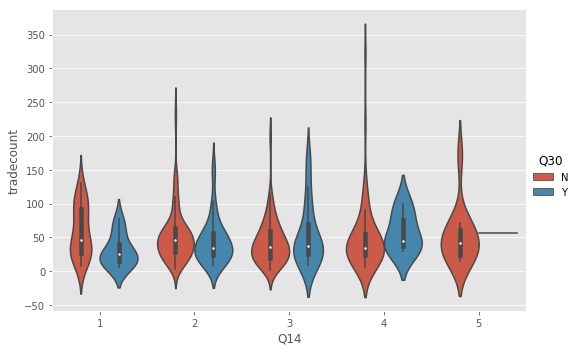

In [47]:
sns.catplot(x="Q14", y="tradecount", hue="Q30", aspect=1.5, kind="swarm", data=data);
sns.catplot(x="Q14", y="tradecount", hue="Q30", aspect=1.5, kind="box", data=data);
sns.catplot(x="Q14", y="tradecount", hue="Q30", aspect=1.5, kind="violin", data=data);

#answers also vary, again very few experienced users disagree that the medium was impactful

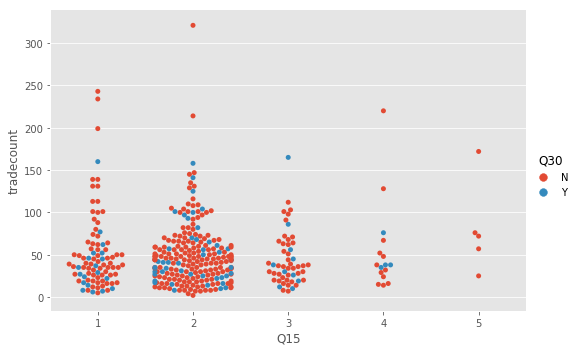

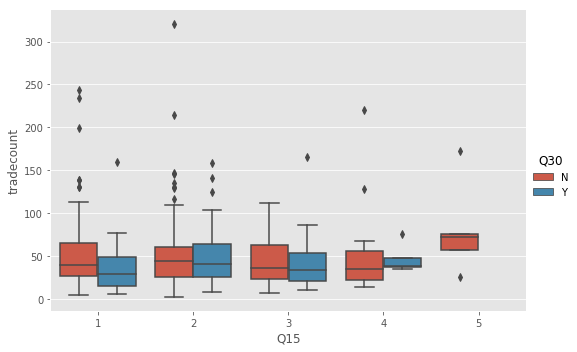

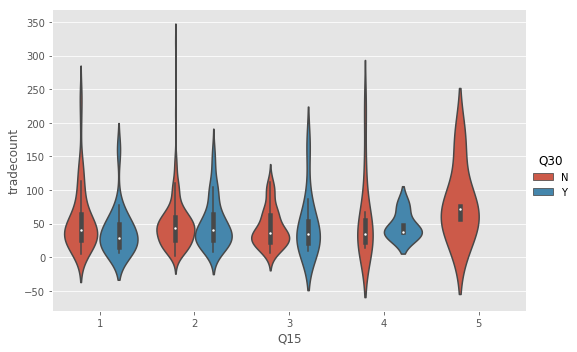

In [48]:
sns.catplot(x="Q15", y="tradecount", hue="Q30", aspect=1.5, kind="swarm", data=data);
sns.catplot(x="Q15", y="tradecount", hue="Q30", aspect=1.5, kind="box", data=data);
sns.catplot(x="Q15", y="tradecount", hue="Q30", aspect=1.5, kind="violin", data=data);

#answers vary; very few users disagree that more stock information would benefit them

## Comparing a persons net profit to their answers to each of the questions and sorting by desk

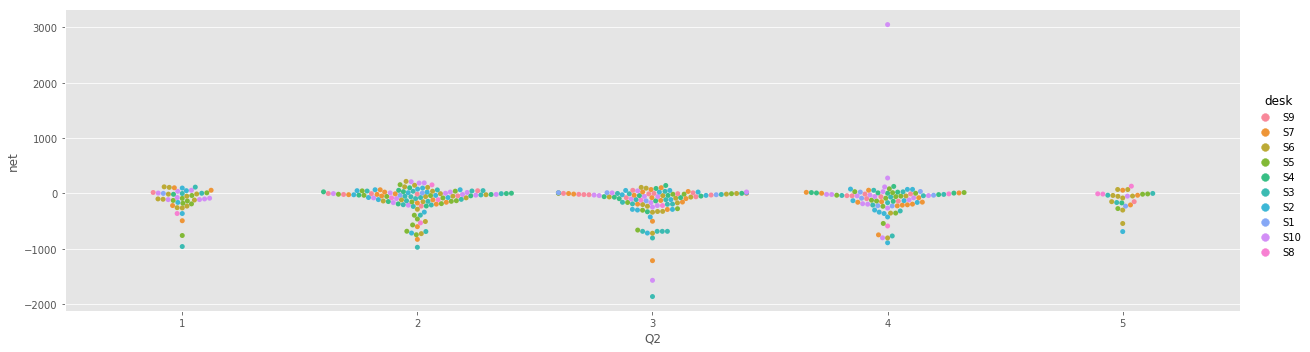

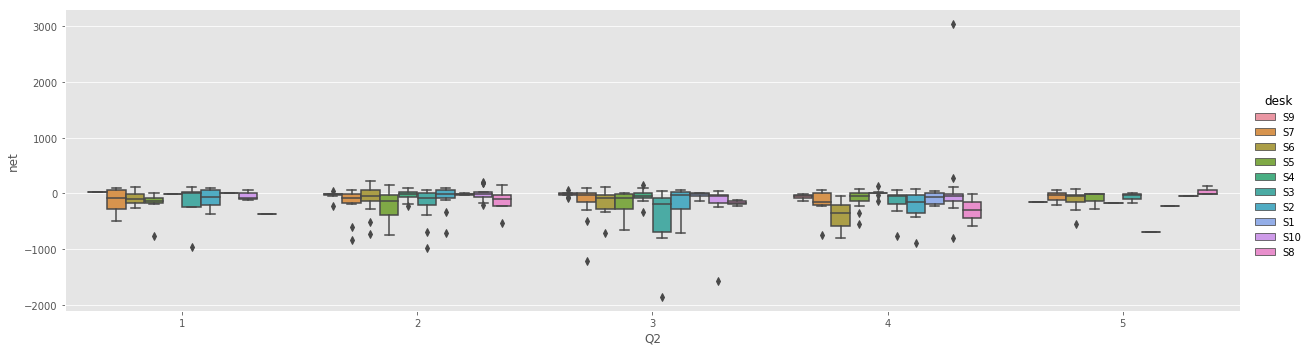

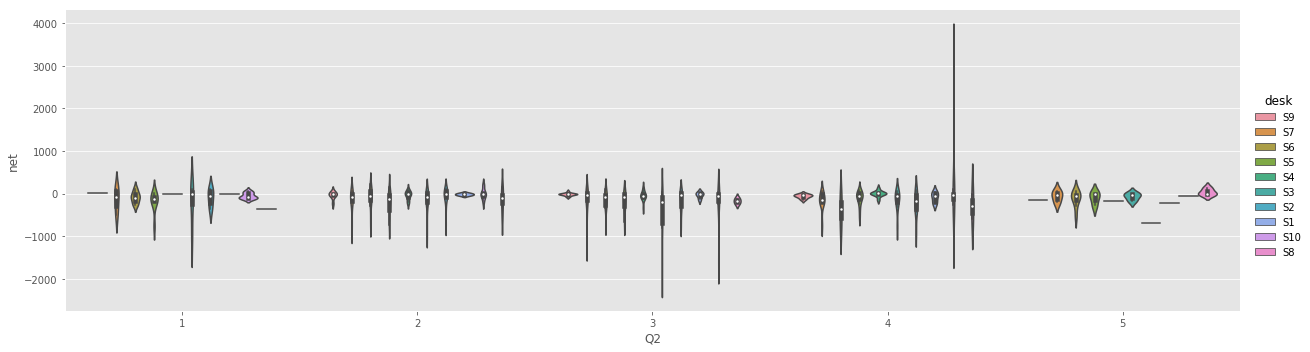

In [49]:
sns.catplot(x="Q2", y="net", hue="desk", aspect=3.5, kind="swarm", data=data);
sns.catplot(x="Q2", y="net", hue="desk", aspect=3.5, kind="box", data=data);
sns.catplot(x="Q2", y="net", hue="desk", aspect=3.5, kind="violin", data=data);

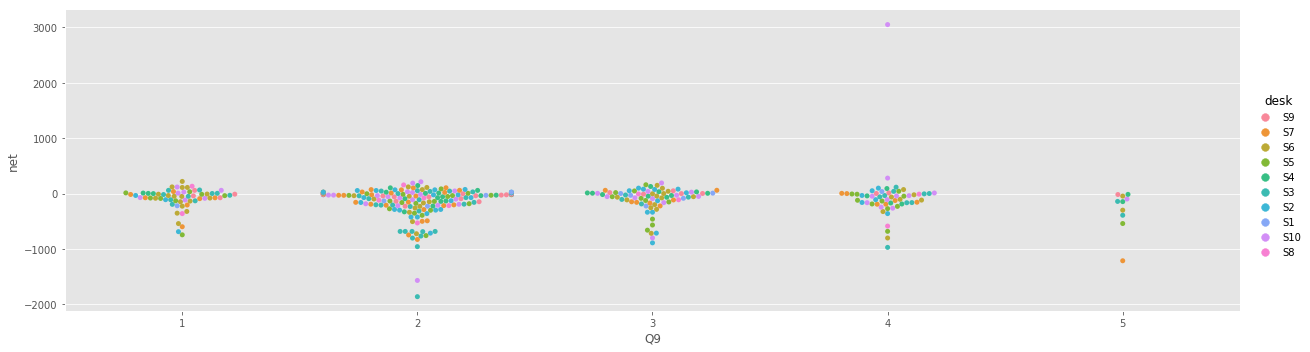

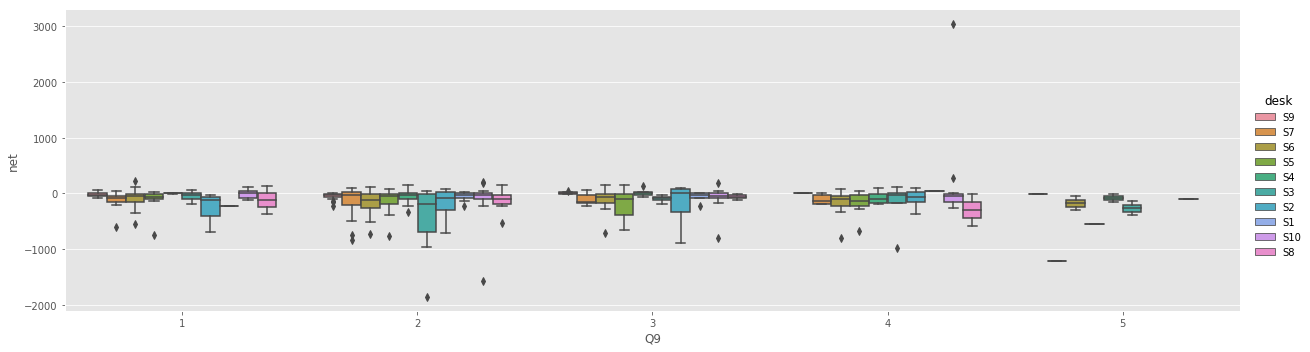

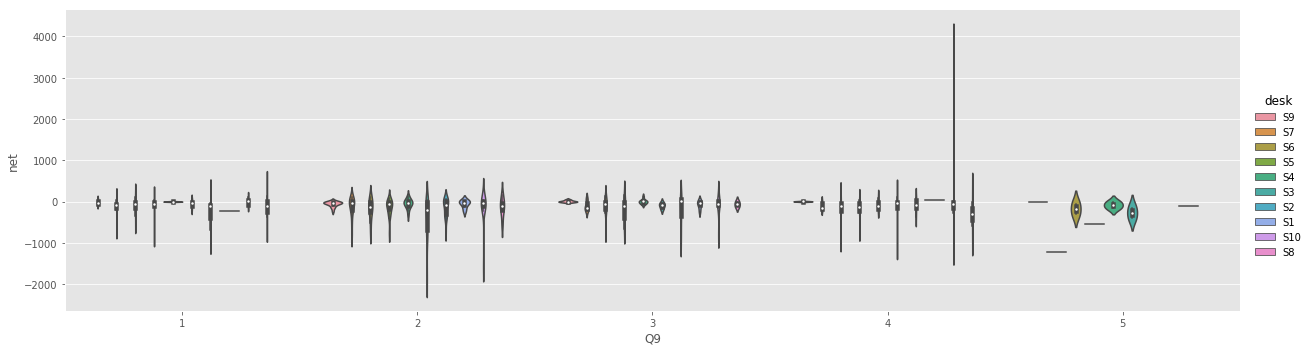

In [50]:
sns.catplot(x="Q9", y="net", hue="desk", aspect=3.5, kind="swarm", data=data);
sns.catplot(x="Q9", y="net", hue="desk", aspect=3.5, kind="box", data=data);
sns.catplot(x="Q9", y="net", hue="desk", aspect=3.5, kind="violin", data=data);

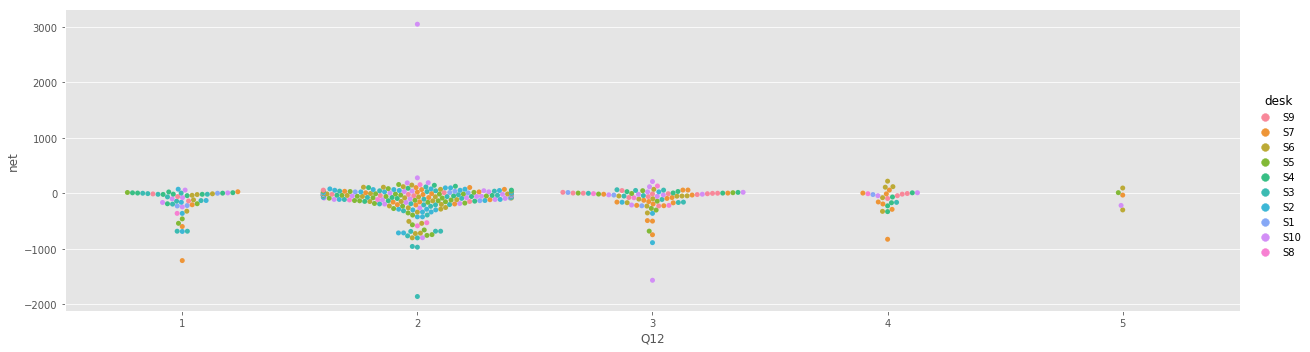

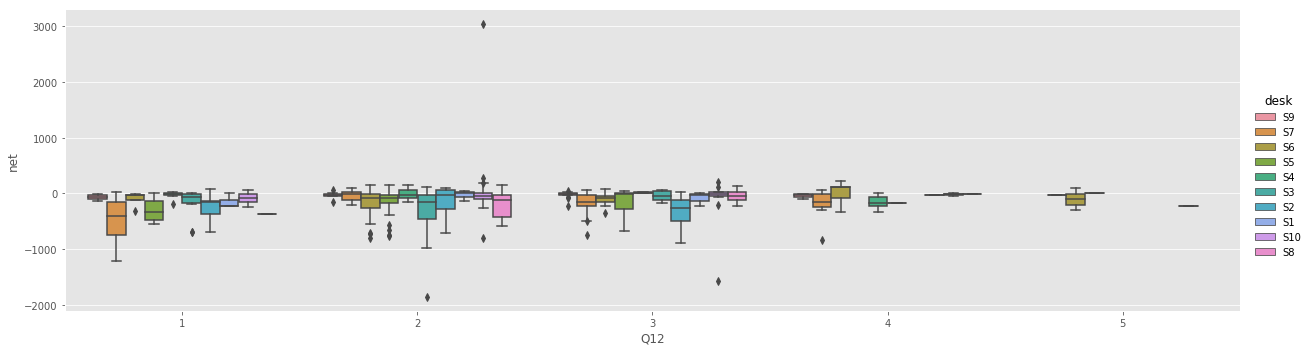

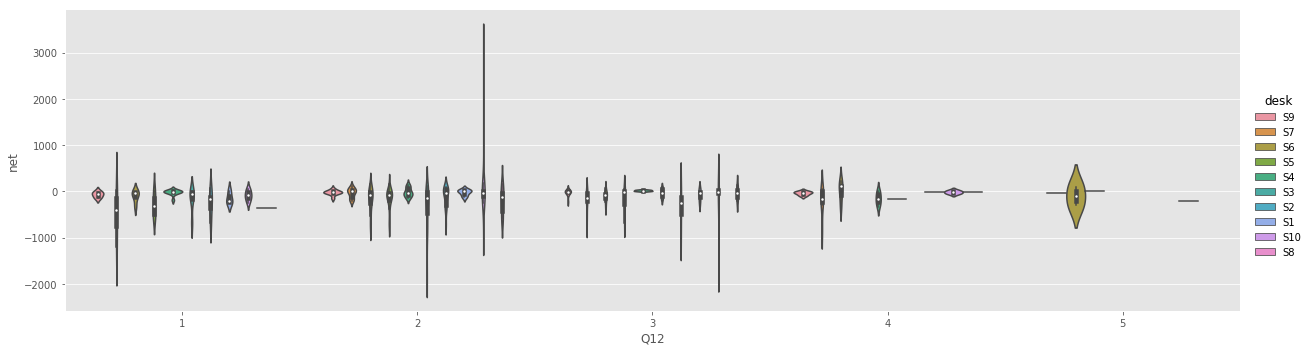

In [51]:
sns.catplot(x="Q12", y="net", hue="desk", aspect=3.5, kind="swarm", data=data);
sns.catplot(x="Q12", y="net", hue="desk", aspect=3.5, kind="box", data=data);
sns.catplot(x="Q12", y="net", hue="desk", aspect=3.5, kind="violin", data=data);

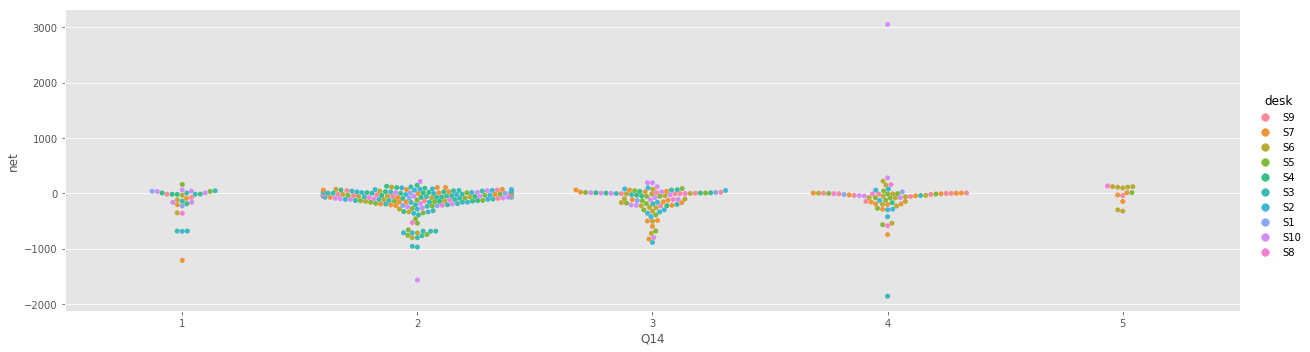

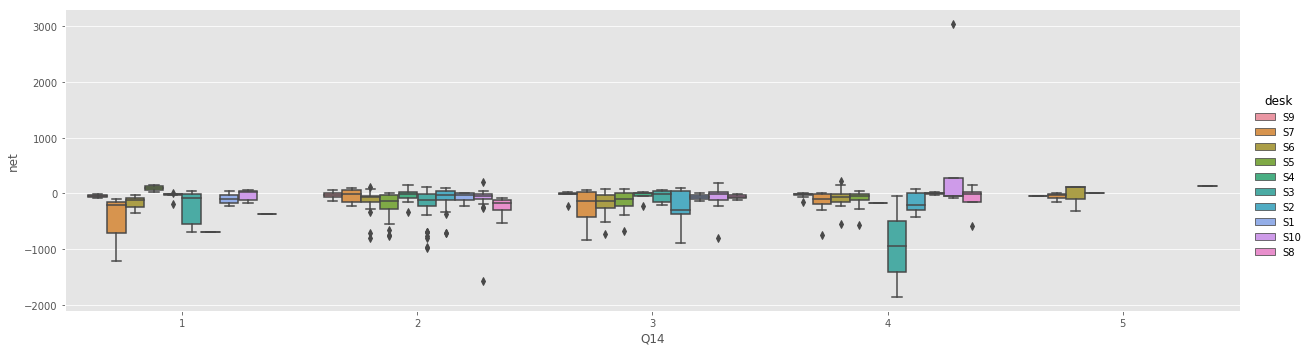

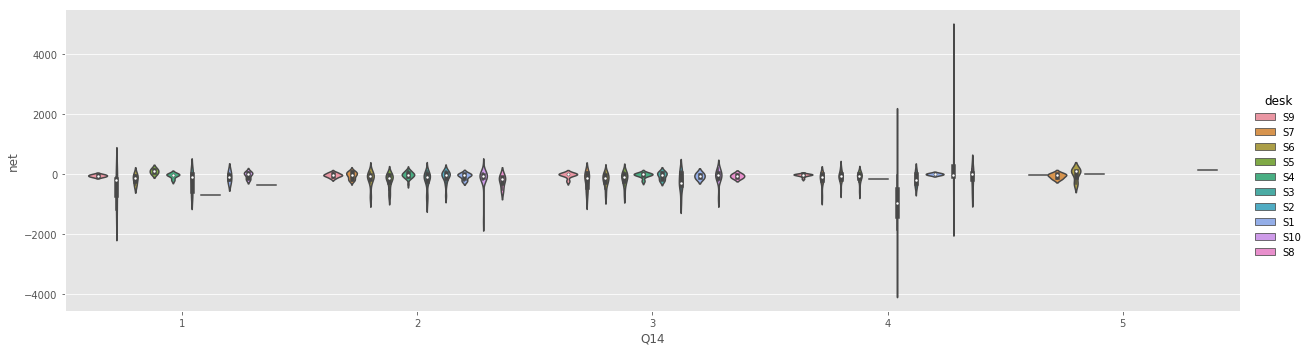

In [52]:
sns.catplot(x="Q14", y="net", hue="desk", aspect=3.5, kind="swarm", data=data);
sns.catplot(x="Q14", y="net", hue="desk", aspect=3.5, kind="box", data=data);
sns.catplot(x="Q14", y="net", hue="desk", aspect=3.5, kind="violin", data=data);

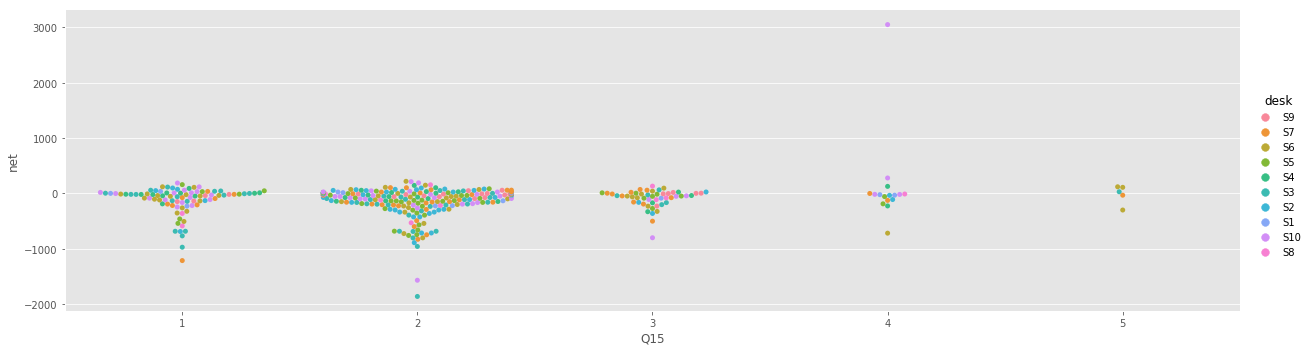

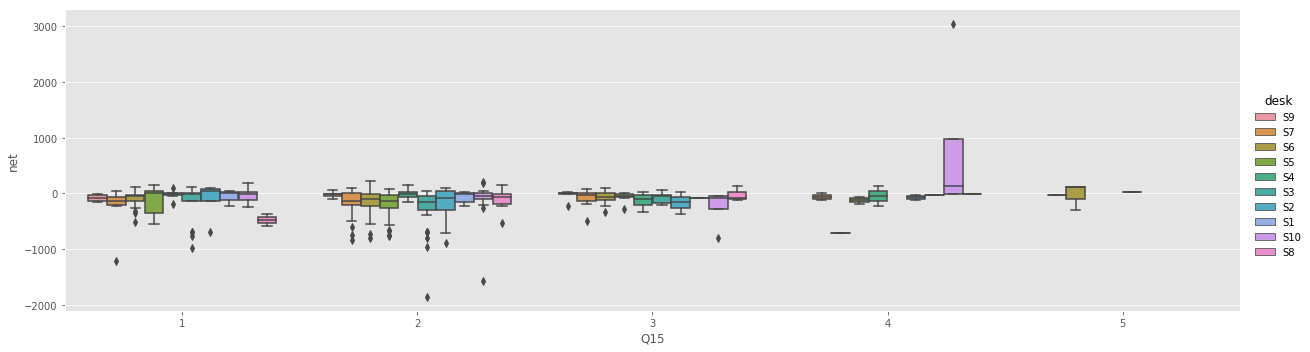

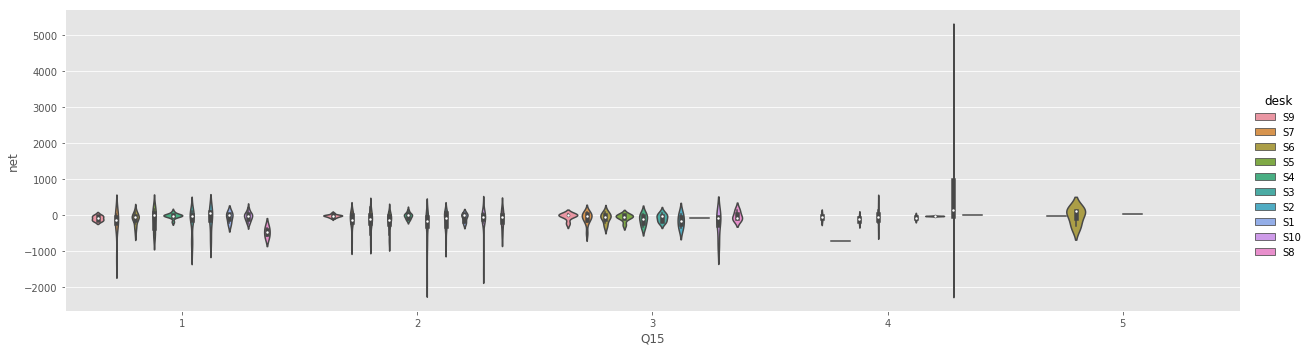

In [53]:
sns.catplot(x="Q15", y="net", hue="desk", aspect=3.5, kind="swarm", data=data);
sns.catplot(x="Q15", y="net", hue="desk", aspect=3.5, kind="box", data=data);
sns.catplot(x="Q15", y="net", hue="desk", aspect=3.5, kind="violin", data=data);

***
# Experimenting with some regressions
### looking at different independent variables with both dependent variables
##### Cherilyn

0.9988639541686133

array([[-20.4414895]])

array([-91.91115574])

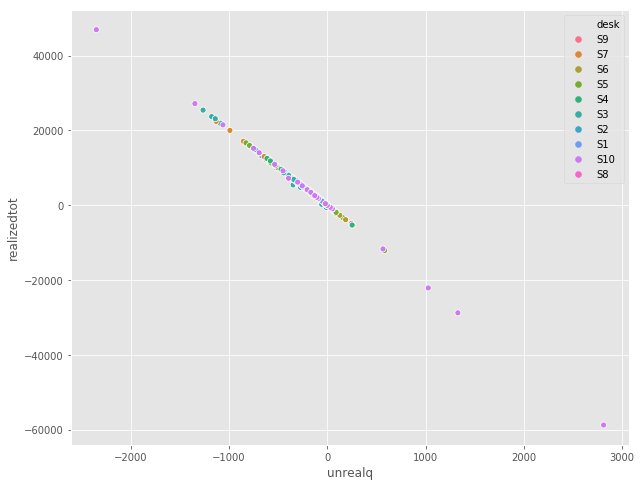

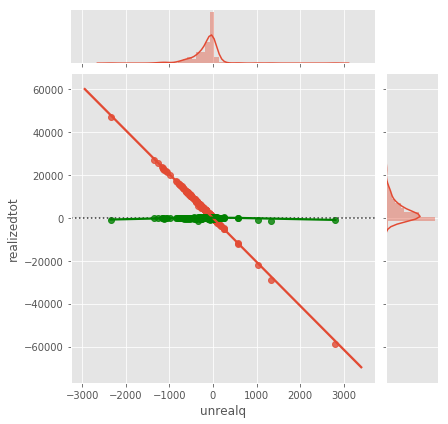

In [54]:
axes = plt.subplots(figsize = (10,8))
sns.scatterplot(x="unrealq", y="realizedtot", hue="desk", data=data);
sns.jointplot(x="unrealq", y="realizedtot", data=data, kind="reg");
sns.residplot(x='unrealq', y='realizedtot', lowess=True, color="g", data=data);
#strong negative linear correlation between final quantity of stock and realized total;
#only a few points are not fully on the regression line
#as the final quantity increases realized total decreases
#highest amount of final quantity is bellow zero indicating that more were short/oversold
#Realized total skews to just below zero

df = pd.DataFrame(data.unrealq)
target = pd.DataFrame(data.realizedtot)

X=df
y=target

lm = linear_model.LinearRegression()
model = lm.fit(X,y)


predictions = lm.predict(X)
# print(predictions)

lm.score(X,y) #really good r squared, this is expected based on the plot from above

lm.coef_ #coefficient of -20 makes sense since the line was decreasing
lm.intercept_ #intercept of -91 this seems plausable based on the graph

0.1177854912240548

array([[1522.04925382]])

array([-30986.34886865])

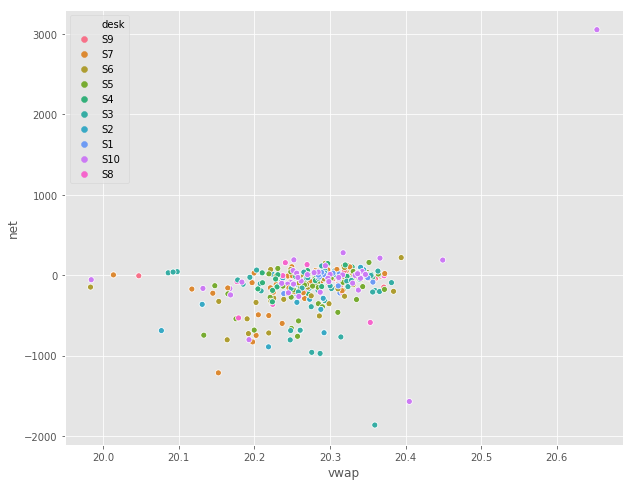

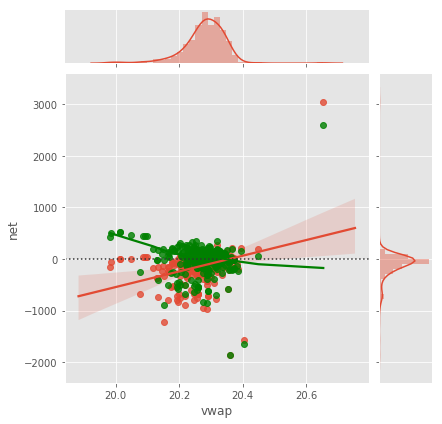

In [55]:
axes = plt.subplots(figsize = (10,8))
sns.scatterplot(x="vwap", y="net", hue="desk", data=data);
sns.jointplot(x="vwap", y="net", data=data, kind="reg");
sns.residplot(x='vwap', y='net', lowess=True, color="g", data=data);
#looking into if the volume weighted average price effects the net money
#there is a slight positive corelation between the two but the 95% confidence interval is wider;
#there is one drastic outlier in the data that appears to be skewing the line to be more positive

df = pd.DataFrame(data.vwap)
target = pd.DataFrame(data.net)

X=df
y=target

lm = linear_model.LinearRegression()
model = lm.fit(X,y)


predictions = lm.predict(X)
# print(predictions)

lm.score(X,y) #very poor r squared of .117 this make sense based on the grouping of the data and the width of the 95% confidence interval

lm.coef_ #coefficient of 1522 makes sense since the line was increasing
lm.intercept_ #intercept of -30986 could make sense as the graph is just above -1000 at 19.9

0.38272046900525414

array([[-63717.9077693]])

array([1295479.92897386])

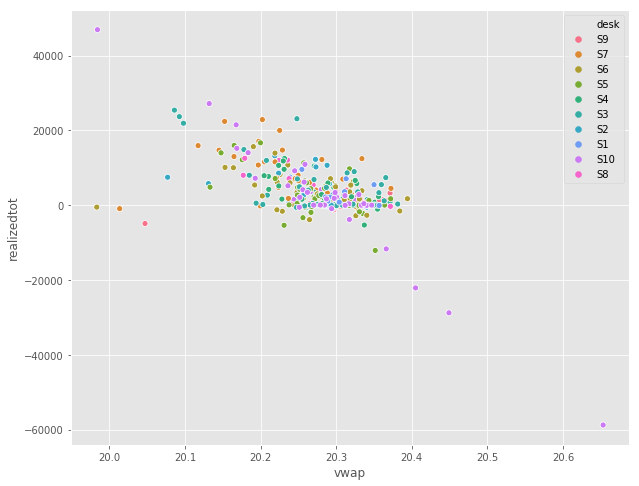

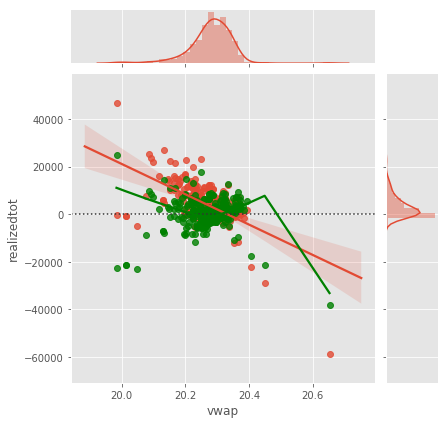

In [56]:
axes = plt.subplots(figsize = (10,8))
sns.scatterplot(x="vwap", y="realizedtot", hue="desk", data=data)
sns.jointplot(x="vwap", y="realizedtot", data=data, kind="reg");
sns.residplot(x='vwap', y='realizedtot', lowess=True, color="g", data=data);
#looking into if the volume weighted average price effects the realized total
#most of the data is center distributed for both of them with a negative corelation

df = pd.DataFrame(data.vwap)
target = pd.DataFrame(data.realizedtot)

X=df
y=target

lm = linear_model.LinearRegression()
model = lm.fit(X,y)


predictions = lm.predict(X)
# print(predictions)

lm.score(X,y) #r squared not great; not unexpected as the data is a little less consistent

lm.coef_ #coefficient of -63717 apears to be really high but makes sense when you look at the range for vwap is less than 1
lm.intercept_ #this appears to not make sense based on the graph but the graph is a 30K at x=19.9 and -30k at x=20.75 therefore the x intercept would be very high

0.584699690896384

array([[0.81037899]])

array([242.86030239])

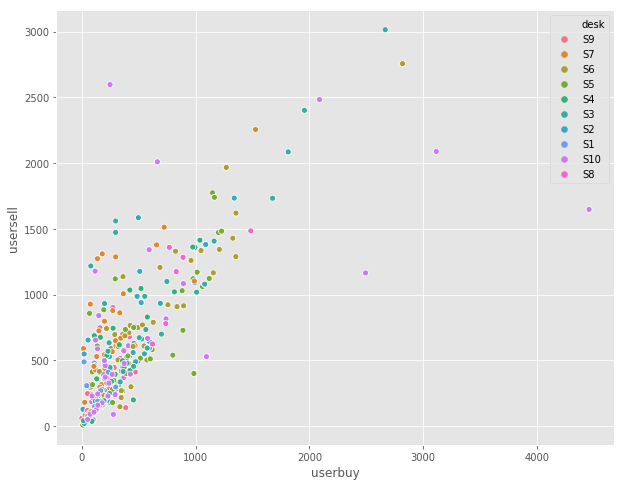

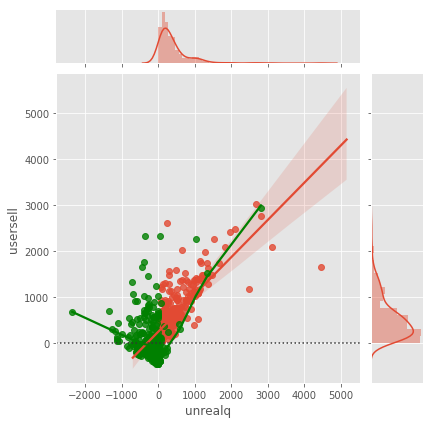

In [57]:
axes = plt.subplots(figsize = (10,8))
sns.scatterplot(x="userbuy", y="usersell", hue="desk", data=data)
sns.jointplot(x="userbuy", y="usersell", data=data, kind="reg");
sns.residplot(x='unrealq', y='usersell', lowess=True, color="g", data=data);
#looking to see if there is a corelation between how much a user buys and how much they sell
#there is a positive corelation between the two but the 95% confidence is wider

df = pd.DataFrame(data.userbuy)
target = pd.DataFrame(data.usersell)

X=df
y=target

lm = linear_model.LinearRegression()
model = lm.fit(X,y)


predictions = lm.predict(X)
# print(predictions)

lm.score(X,y) # moderate r squared, shows some corelation but nor at strong as it could be

lm.coef_ #coefficient of .8 makes sense since the line seems to be increasing a little less than y=x
lm.intercept_ #intercept of 242 seems high compared to the data but seems to match the jointplot line

***
# Logistical regression
### Regression Prerequisite
### Creating unbiased training and testing data sets are key. I am going to use Pandas' sample function to obtain 80/20 (Train/Test) split in order to run the regression. In doing so, this will promote an unbiased sampled dataset.
##### Jean

In [58]:
price = df1['price'] # extracting target variable
size_df1 = len(df1) ##finding out the size of df1
size_df2 = len(df2_log_data) ## finding out the length of df2
train_size_df1 = math.ceil(.8*size_df1)
train_size_df2 = math.ceil(.8*size_df2) ## 80 perfecnt is about 291, which is the sample size i will use to train 

size_df1
size_df2
difference = size_df1 - size_df2  # calculate difference. This will allow me remove the difference from df1 to make sure each dataframe has the same # of rows
difference

df1_sample = df1.sample(n = size_df1 - difference) ## sampled and cut df1 down to 363
df1_train = df1_sample.sample(n = math.ceil(.8*len(df1_sample))) # trained df1 
df2_train = df2_log_data.sample( n = train_size_df2)

### THIS CELL MAY OR MAY HAVE NOT BEEN USED >> IT was created just incase if I needed quick reference

411

363

48

### MORE LOGISTICAL REGRESSION PREREQ. Prepairing the train data and test data so that I can run a Logistical Regression and view the Confusion Matrix to determine the accuracy of the model .

In [59]:
#split dataset in features and target variable
feature_cols = [ 'realizedtot', 'unrealq', 'uservolu', 'useroftotalvolu',
       'totalvolu', 'tradecount', 'firsthourvolu', 'firsthouruservolu',
       'lasthourvolu', 'vwap', 'pricev', 'net', 'userbuy', 'usersell',
       'uservoltradedbuysell', 'Gender', 'Q9', 'Q12', 'Q14', 'Q15',
       'Q30']
X = data_1a[feature_cols] # Features
y = data_1a['Q2']  # Target variable

In [60]:
# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [61]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

C:\Users\Cherilyn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cherilyn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [62]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 0,  5,  5,  2,  0],
       [ 0, 11,  9,  3,  2],
       [ 1, 14, 12,  2,  0],
       [ 1,  9, 11,  2,  0],
       [ 0,  4,  3,  2,  0]], dtype=int64)

([<matplotlib.axis.XTick at 0x2507ac4bb70>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x2507d3e0710>,
 <a list of 2 Text yticklabel objects>)

Text(0.5, 1.1, 'Confusion matrix')

Text(33.0, 0.5, 'Actual label')

Text(0.5, 257.44, 'Predicted label')

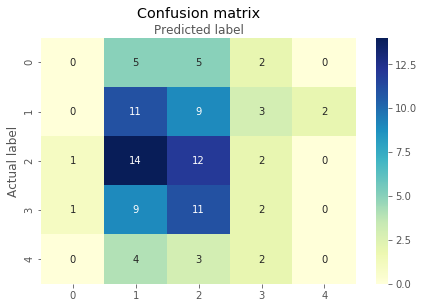

In [63]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [64]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.25510204081632654


### The Confusion Matrix is the result of the logistical regression predicting for Q2, "I traded using ALL of the information provided to me at each stage". If we consider an application involving an event for which where the data set came from, there is no predictability in determening the status of Q2. The Conusion Matrix reads all of the TRUE/FALSE Positives or Negatives. As a result I was able to determine the accuracy of the logistical regression by taking a ratio correctly predicted outcomes to all outcomes. 

C:\Users\Cherilyn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cherilyn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

array([[ 1,  3,  8,  0,  0],
       [ 1, 17, 24,  4,  0],
       [ 0, 10,  5,  4,  2],
       [ 0,  9,  3,  3,  0],
       [ 0,  4,  0,  0,  0]], dtype=int64)

([<matplotlib.axis.XTick at 0x2507db9c710>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x2507d1c2f28>,
 <a list of 2 Text yticklabel objects>)

Text(0.5, 1.1, 'Confusion matrix')

Text(33.0, 0.5, 'Actual label')

Text(0.5, 257.44, 'Predicted label')

Accuracy: 0.2653061224489796


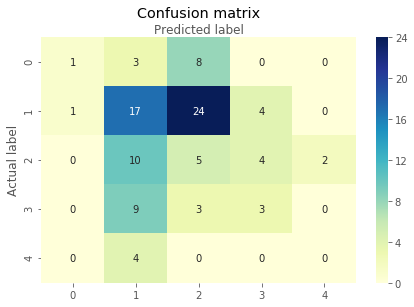

In [65]:
#split dataset in features and target variable
feature_cols = [ 'realizedtot', 'unrealq', 'uservolu', 'useroftotalvolu',
       'totalvolu', 'tradecount', 'firsthourvolu', 'firsthouruservolu',
       'lasthourvolu', 'vwap', 'pricev', 'net', 'userbuy', 'usersell',
       'uservoltradedbuysell', 'Gender', 'Q2', 'Q12', 'Q14', 'Q15',
       'Q30']
X = data_1a[feature_cols] # Features
y = data_1a['Q9']  # Target variable

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


C:\Users\Cherilyn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cherilyn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

array([[ 6,  5,  0,  0,  0],
       [ 1, 37,  2,  7,  0],
       [ 2, 20,  0,  1,  0],
       [ 0, 14,  0,  0,  0],
       [ 0,  2,  0,  1,  0]], dtype=int64)

([<matplotlib.axis.XTick at 0x2507f13e4a8>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x2507aad1240>,
 <a list of 2 Text yticklabel objects>)

Text(0.5, 1.1, 'Confusion matrix')

Text(33.0, 0.5, 'Actual label')

Text(0.5, 257.44, 'Predicted label')

Accuracy: 0.4387755102040816


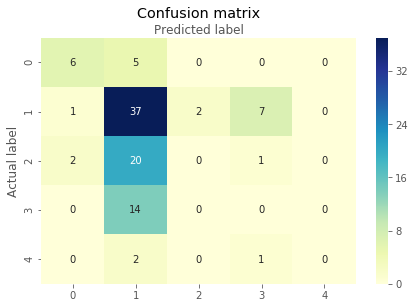

In [66]:
#split dataset in features and target variable
feature_cols = [ 'realizedtot', 'unrealq', 'uservolu', 'useroftotalvolu',
       'totalvolu', 'tradecount', 'firsthourvolu', 'firsthouruservolu',
       'lasthourvolu', 'vwap', 'pricev', 'net', 'userbuy', 'usersell',
       'uservoltradedbuysell', 'Gender', 'Q2', 'Q12', 'Q9', 'Q15',
       'Q30']
X = data_1a[feature_cols] # Features
y = data_1a['Q14']  # Target variable

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

C:\Users\Cherilyn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cherilyn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

array([[ 2, 21,  3,  0,  0],
       [ 0, 45,  7,  1,  1],
       [ 0,  9,  1,  2,  0],
       [ 0,  3,  1,  0,  0],
       [ 0,  2,  0,  0,  0]], dtype=int64)

([<matplotlib.axis.XTick at 0x2507a48a438>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x2507d410128>,
 <a list of 2 Text yticklabel objects>)

Text(0.5, 1.1, 'Confusion matrix')

Text(33.0, 0.5, 'Actual label')

Text(0.5, 257.44, 'Predicted label')

Accuracy: 0.4897959183673469


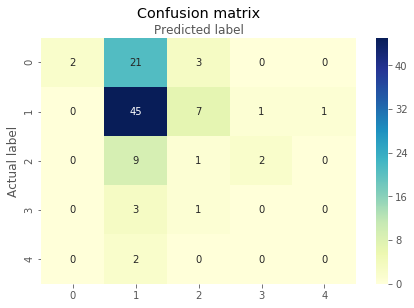

In [67]:
#split dataset in features and target variable
feature_cols = [ 'realizedtot', 'unrealq', 'uservolu', 'useroftotalvolu',
       'totalvolu', 'tradecount', 'firsthourvolu', 'firsthouruservolu',
       'lasthourvolu', 'vwap', 'pricev', 'net', 'userbuy', 'usersell',
       'uservoltradedbuysell', 'Gender', 'Q2', 'Q12', 'Q14', 'Q9',
       'Q30']
X = data_1a[feature_cols] # Features
y = data_1a['Q15']  # Target variable

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

***
# MACHINE LEARNING ALGORITHMS

### * 6 different algorithms Used To Predict for Price:
### * Logistic Regression (LR)
### * Linear Discriminant Analysis (LDA)
### * K-Nearest Neighbors (KNN).
### * Classification and Regression Trees (CART).
### * Gaussian Naive Bayes (NB).
### * Support Vector Machines (SVM).
### * This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms

##### Jean

In [68]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'


#split dataset in features and target variable
feature_cols = [ 'realizedtot', 'unrealq', 'uservolu', 'useroftotalvolu',
       'totalvolu', 'tradecount', 'firsthourvolu', 'firsthouruservolu',
       'lasthourvolu', 'vwap', 'pricev', 'net', 'userbuy', 'usersell',
       'uservoltradedbuysell']
X = data_1a[feature_cols] # Features
y = data_1a['Q12']  # Target variable

# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))


# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.544368 (0.090306)
LDA: 0.544368 (0.082311)
KNN: 0.465517 (0.086467)
NB: 0.180460 (0.069340)


C:\Users\Cherilyn\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Cherilyn\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Cherilyn\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Cherilyn\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Cherilyn\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Cherilyn\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\U

SVM: 0.554368 (0.077938)


Text(0.5, 0.98, 'Algorithm Comparison')

{'whiskers': [<matplotlib.lines.Line2D at 0x2507db57470>,
 'caps': [<matplotlib.lines.Line2D at 0x2507d31a128>,
 'boxes': [<matplotlib.lines.Line2D at 0x2507aa56eb8>,
 'medians': [<matplotlib.lines.Line2D at 0x2507d31aa58>,
 'fliers': [<matplotlib.lines.Line2D at 0x2507d31ab38>,
 'means': []}

[Text(0, 0, 'LR'),
 Text(0, 0, 'LDA'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'NB'),
 Text(0, 0, 'SVM')]

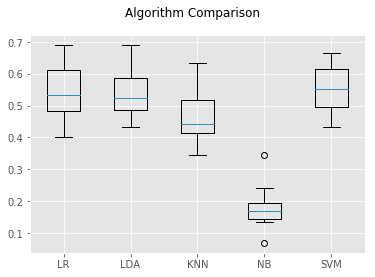

In [69]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Result
#### The Result of each algorithm generated produced the mean value of accuracy.  
#### LDA: 0.567356 (0.077895)
#### KNN: 0.471149 (0.109154)
#### NB: 0.206322 (0.072626)
#### SVM: 0.567356 (0.082348)  
#### As you will notice the Linear Discriminant Analysis and Support Vector Machines have the highest accuracy's out of the group. With Support Vector Machines, I can determine the hyperplanes needed for clustering . 

#### I chose to target Question 2: I traded using ALL of the information provided to me at each stage in order to find deterministic features what will predict Q2. Without loss of generality the Following code should be used to find the rest of the ordinal categories, We can consider the application within an orginazation that can better aid their employee buy understanding what scenarios or goal they want to acheive and how informed about the task do employees need to be. Initially I believed the Naive Bayes Algortihm would act as the best predictor to a given categorical outcome but as you notice from the illustration above I was dead wrong. The Naive Bayes's performance is due to the amount of features I have selected. If my focus was to increase NB, then I would perform a factor analysis and reduce the amound of features that I used. 

In [70]:

# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

0.5102040816326531
[[ 2 10  5  0  0]
 [ 6 46  7  0  0]
 [ 2 10  2  0  0]
 [ 1  4  1  0  0]
 [ 1  1  0  0  0]]
              precision    recall  f1-score   support

           1       0.17      0.12      0.14        17
           2       0.65      0.78      0.71        59
           3       0.13      0.14      0.14        14
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2

   micro avg       0.51      0.51      0.51        98
   macro avg       0.19      0.21      0.20        98
weighted avg       0.44      0.51      0.47        98



C:\Users\Cherilyn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Cherilyn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Cherilyn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### F1 Score of algorithm 2 or KNN is relatively hi which suggests that model is effective in determining clusters with distinct features. As expected the BN has a terrible F1 score since it is very innaccurate. 

***
# Clustermaps
##### Mike

#### Making new Data Frame (cdata)

In [71]:
# dropping ido, desk, trader, and lasthusrlasthrtot

cdata=data.drop('ido', axis=1)
cdata.Gender = cdata.Gender.str.replace("F",'0').str.replace("M", '1')
cdata.Q30 = cdata.Q30.str.replace("Y",'1').str.replace("N", '0')
cdata=cdata.drop('desk', axis=1)
cdata=cdata.drop('trader', axis=1)
cdata=cdata.drop('lasthusrlasthrtot', axis=1)


# changing some column  values to integers

cdata['Gender']=cdata['Gender'].astype("int")
cdata['Q2']=cdata['Q2'].astype("int")
cdata['Q9']=cdata['Q9'].astype("int")
cdata['Q12']=cdata['Q12'].astype("int")
cdata['Q14']=cdata['Q14'].astype("int")
cdata['Q15']=cdata['Q15'].astype("int")
cdata['Q30']=cdata['Q30'].astype("int")

In [72]:
# checking data frame

print(cdata.columns)

cdata.info();

with pd.option_context('display.max_columns', 40):
    cdata.describe(include="all")

Index(['price', 'realizedtot', 'unrealq', 'uservolu', 'useroftotalvolu',
       'totalvolu', 'tradecount', 'firsthourvolu', 'firsthouruservolu',
       'lasthourvolu', 'lasthouruservolu', 'firsthrusrfirsthrtot', 'vwap',
       'pricev', 'net', 'userbuy', 'usersell', 'uservoltradedbuysell',
       'Gender', 'Q2', 'Q9', 'Q12', 'Q14', 'Q15', 'Q30'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 391
Data columns (total 25 columns):
price                   392 non-null float64
realizedtot             392 non-null float64
unrealq                 392 non-null int64
uservolu                392 non-null int64
useroftotalvolu         392 non-null float64
totalvolu               392 non-null int64
tradecount              392 non-null int64
firsthourvolu           392 non-null int64
firsthouruservolu       392 non-null int64
lasthourvolu            392 non-null int64
lasthouruservolu        392 non-null int64
firsthrusrfirsthrtot    392 non-null float64


price   realizedtot      unrealq     uservolu  useroftotalvolu  \
count  392.000000    392.000000   392.000000   392.000000       392.000000   
mean    20.812500   3289.538810  -165.420918   982.201531         0.270675   
std      0.320361   6835.969267   334.226387   912.381383         0.177991   
min     19.500000 -58791.400130 -2349.000000    18.000000         0.006700   
25%     20.600000     32.725034  -286.000000   369.250000         0.133875   
50%     20.900000   1696.400075   -87.000000   728.000000         0.239250   
75%     21.000000   5561.500012     0.000000  1210.750000         0.364475   
max     22.000000  46923.900000  2811.000000  6107.000000         0.934800   

         totalvolu  tradecount  firsthourvolu  firsthouruservolu  \
count   392.000000  392.000000     392.000000         392.000000   
mean   3284.155612   50.306122    1232.984694         207.318878   
std     789.655170   39.934258     558.884310         211.047752   
min     498.000000    2.000000     192.000000           0.000000   
25%    2862.750000   25.000000     835.500000          69.000000   
50%    3132.000000   40.500000    1042.000000         145.500000   
75%    3504.250000   62.250000    1459.500000         271.750000   
max    7800.000000  321.000000    3944.000000        1450.000000   

       lasthourvolu  lasthouruservolu  firsthrusrfirsthrtot        vwap  \
count    392.000000        392.000000            392.000000  392.000000   
mean    2534.892857        383.201531              0.143826   20.279862   
std      748.578991        443.002812              0.094726    0.066371   
min        0.000000          0.000000              0.000000   19.983490   
25%     2170.000000        102.750000              0.075400   20.251412   
50%     2450.000000        240.500000              0.128150   20.287872   
75%     2758.000000        498.500000              0.204025   20.322294   
max     8474.000000       4182.000000              0.546000   20.652945   

            pricev          net      userbuy     usersell  \
count   392.000000   392.000000   392.000000   392.000000   
mean    386.665052  -119.399717   408.390306   573.811224   
std     284.307656   294.348785   471.533959   499.729185   
min      20.500000 -1861.500000     0.000000     9.000000   
25%     189.675000  -178.124978   135.000000   200.000000   
50%     357.000000   -47.850049   267.500000   447.000000   
75%     473.800000     6.600223   476.250000   750.000000   
max    1809.000000  3050.599866  4459.000000  3014.000000   

       uservoltradedbuysell      Gender          Q2          Q9         Q12  \
count            392.000000  392.000000  392.000000  392.000000  392.000000   
mean             982.201531    0.540816    2.841837    2.410714    2.255102   
std              912.381383    0.498968    1.103579    1.002395    0.816220   
min               18.000000    0.000000    1.000000    1.000000    1.000000   
25%              369.250000    0.000000    2.000000    2.000000    2.000000   
50%              728.000000    1.000000    3.000000    2.000000    2.000000   
75%             1210.750000    1.000000    4.000000    3.000000    3.000000   
max             6107.000000    1.000000    5.000000    5.000000    5.000000   

              Q14         Q15         Q30  
count  392.000000  392.000000  392.000000  
mean     2.576531    2.022959    0.201531  
std      0.967111    0.797684    0.401656  
min      1.000000    1.000000    0.000000  
25%      2.000000    2.000000    0.000000  
50%      2.000000    2.000000    0.000000  
75%      3.000000    2.000000    0.000000  
max      5.000000    5.000000    1.000000

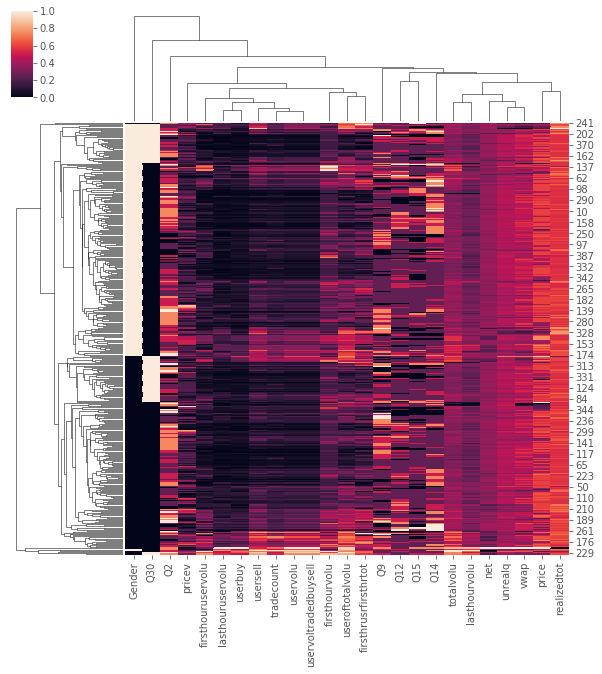

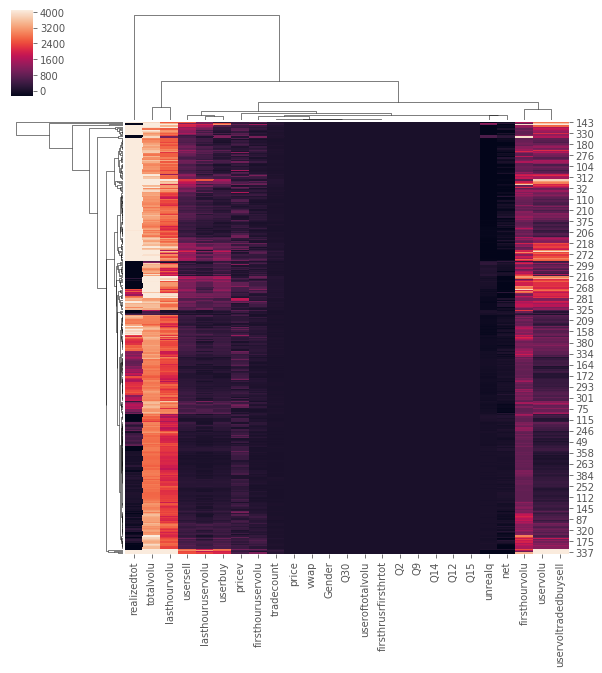

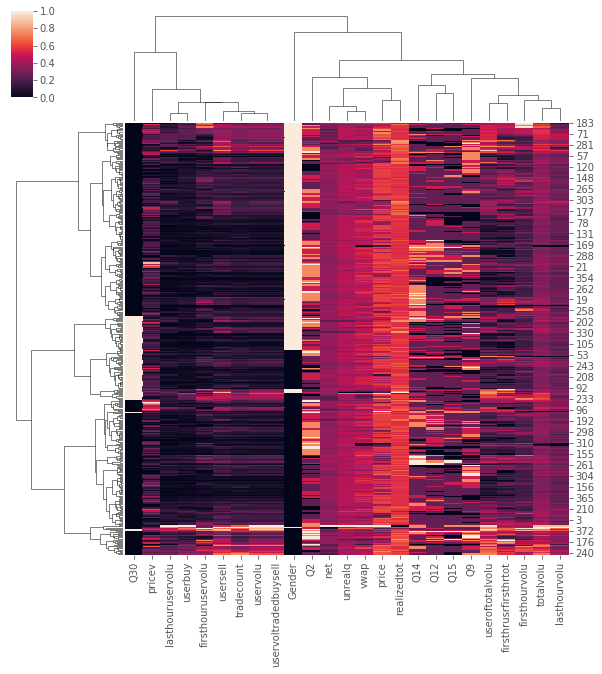

In [73]:
#sns.clustermap(cdata);

#sns.clustermap(cdata, z_score=0);

#sns.clustermap(cdata, col_cluster=False);



# y axis = row number
# x axis = column

sns.clustermap(cdata, standard_scale=1);



sns.clustermap(cdata, robust=True);
# you can see that realizedtot and unrealq are on opposite ends of the colormap in the upper range; nearly perfect negative correlation as indicated earlier
# lasthourvolu seems to be consistently greater than firsthourvolu



sns.clustermap(cdata, metric="euclidean", standard_scale=1, method="ward", robust=True);

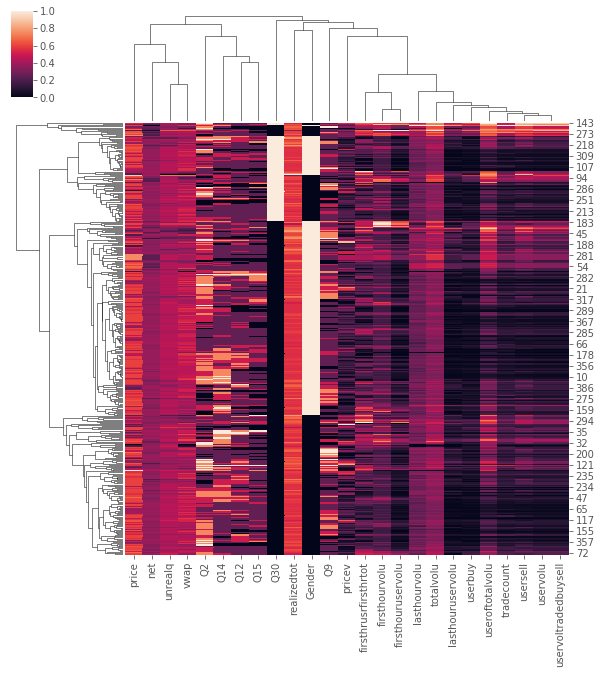

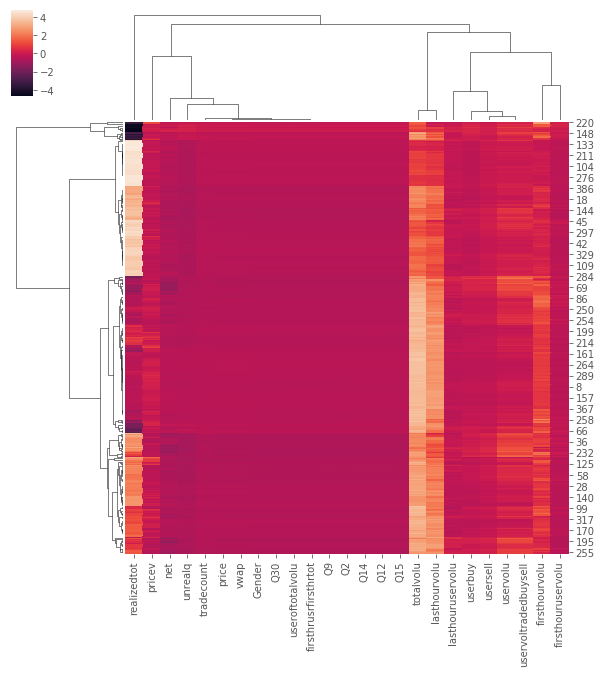

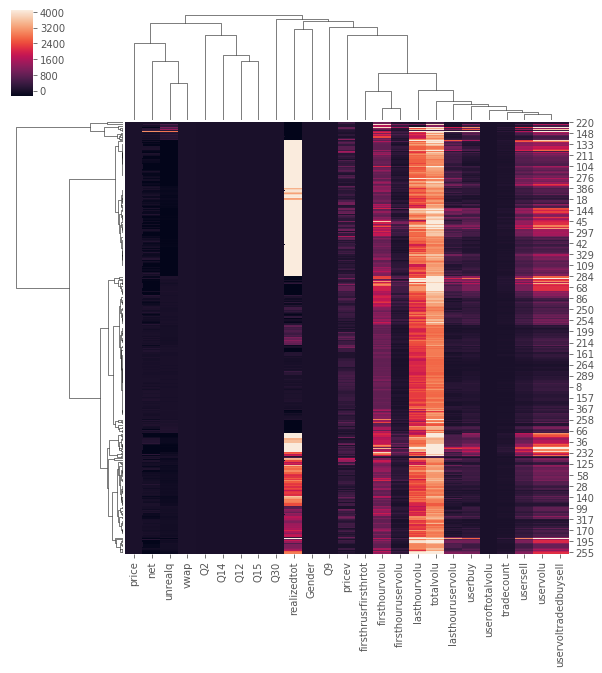

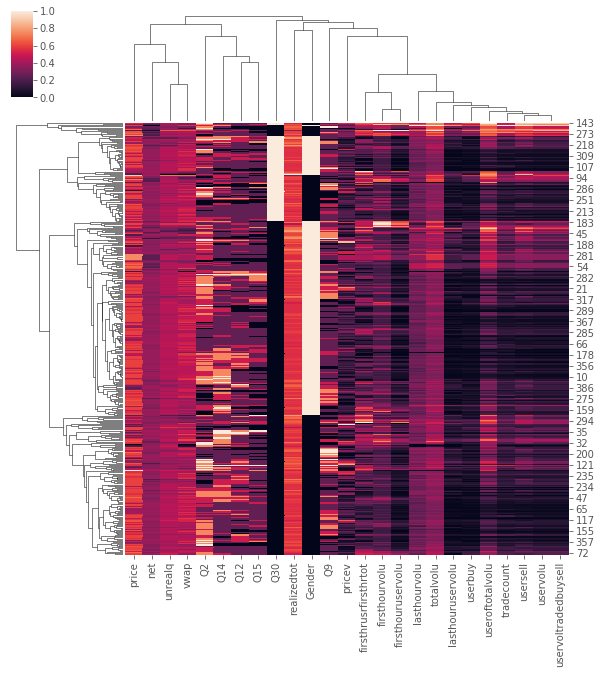

In [74]:
#sns.clustermap(cdata, metric="correlation");

sns.clustermap(cdata, metric="correlation", standard_scale=1);

sns.clustermap(cdata, metric="correlation",z_score=0);

#sns.clustermap(cdata, metric="correlation",col_cluster=False);

sns.clustermap(cdata, metric="correlation",robust=True);

sns.clustermap(cdata, metric="correlation", standard_scale=1, method="average", robust=True);

*** 
# Dendrogram
##### Michael

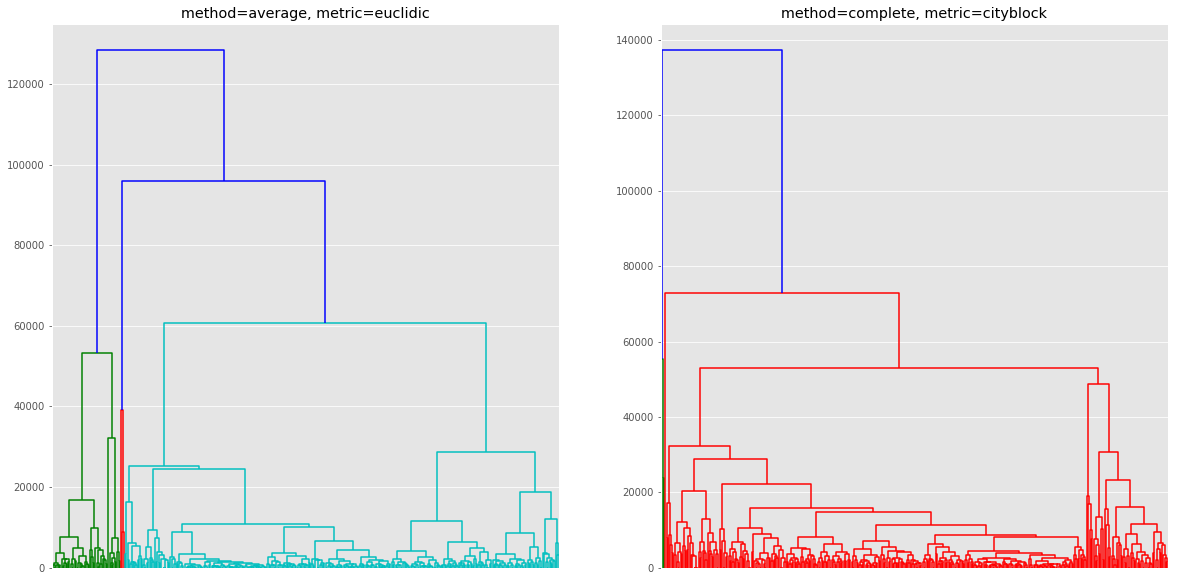

In [75]:
d1 = linkage(cdata, method='ward', metric='euclidean')
d2 = linkage(cdata, method='complete', metric='cityblock')

plt.figure(figsize=(20,10))

plt1 = plt.subplot(1,2,1)
plt.title("method=average, metric=euclidic")
dendrogram(d1)
plt1.set_xticks([])

plt2 = plt.subplot(1,2,2)
plt.title("method=complete, metric=cityblock")
dendrogram(d2)
plt2.set_xticks([])

plt.show();

# shows relationships 

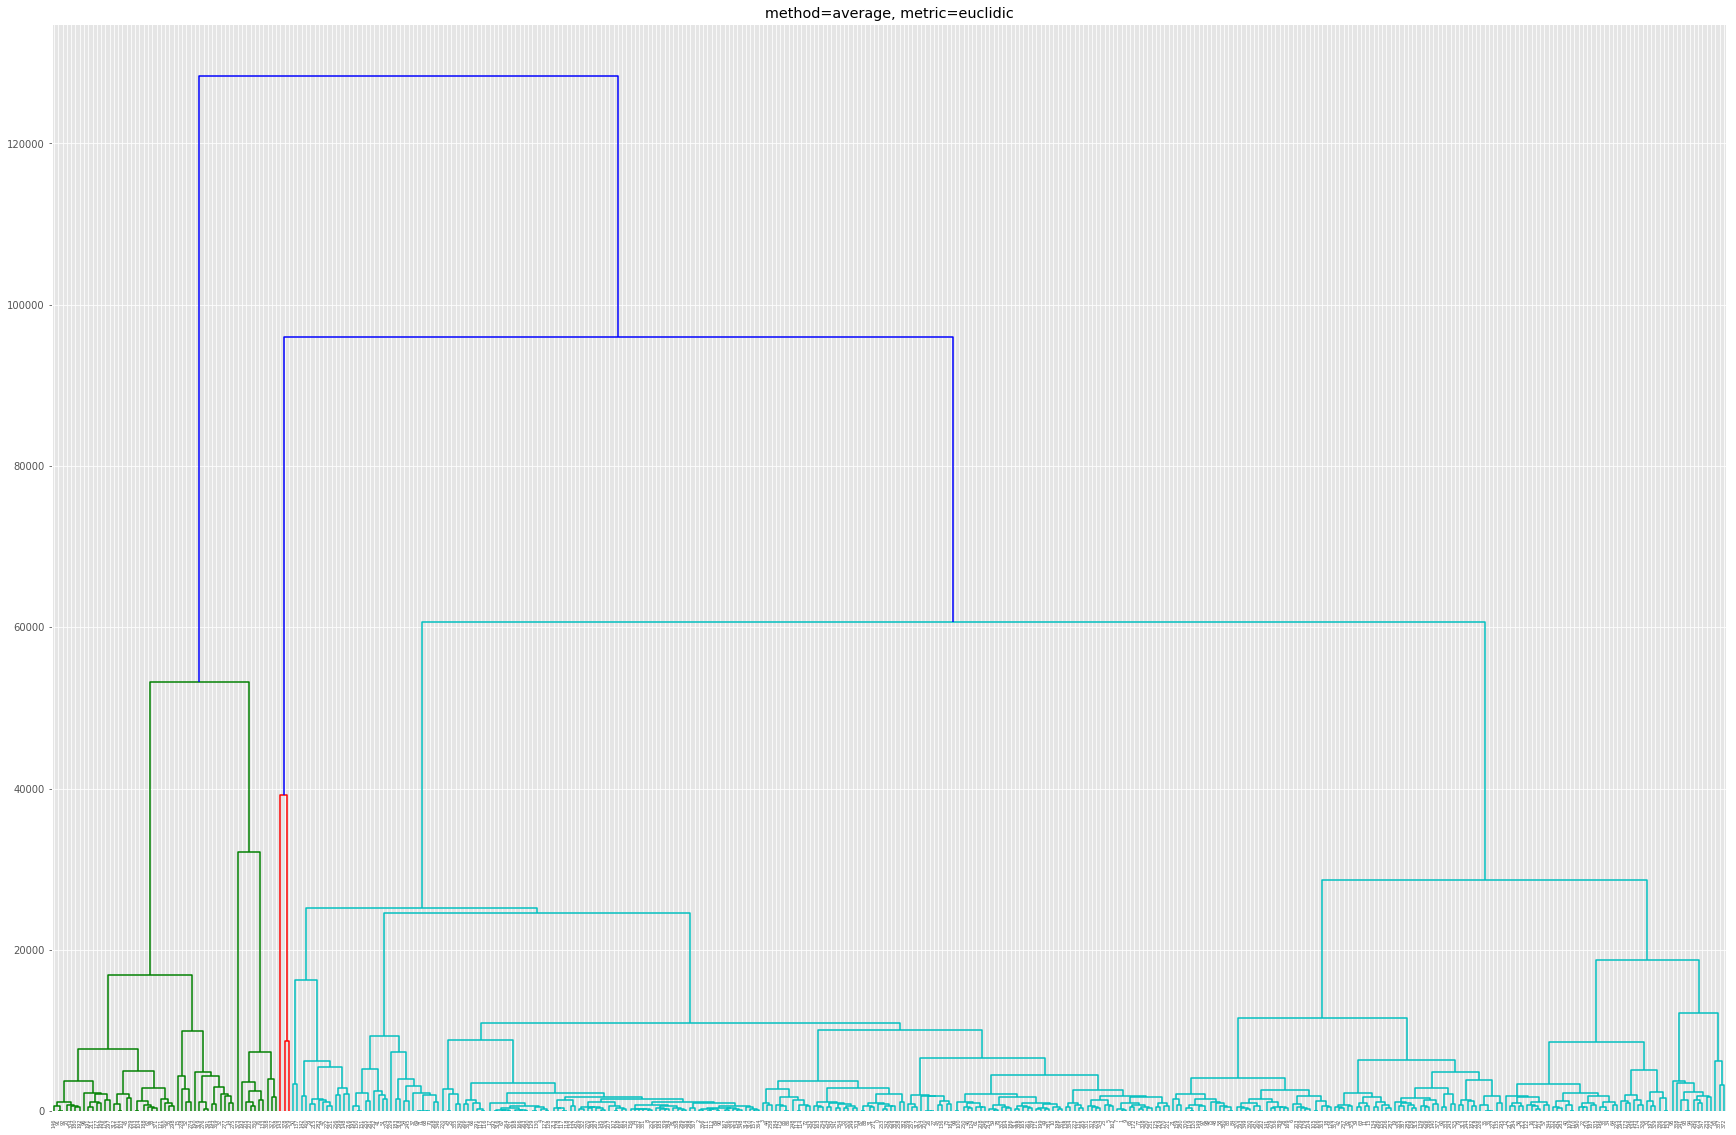

In [76]:
# enlarging dendrogram

plt.figure(figsize=(30,20))

plt.title("method=average, metric=euclidic")
dendrogram(d1)
plt1.set_xticks([]);
#plt.savefig('den');

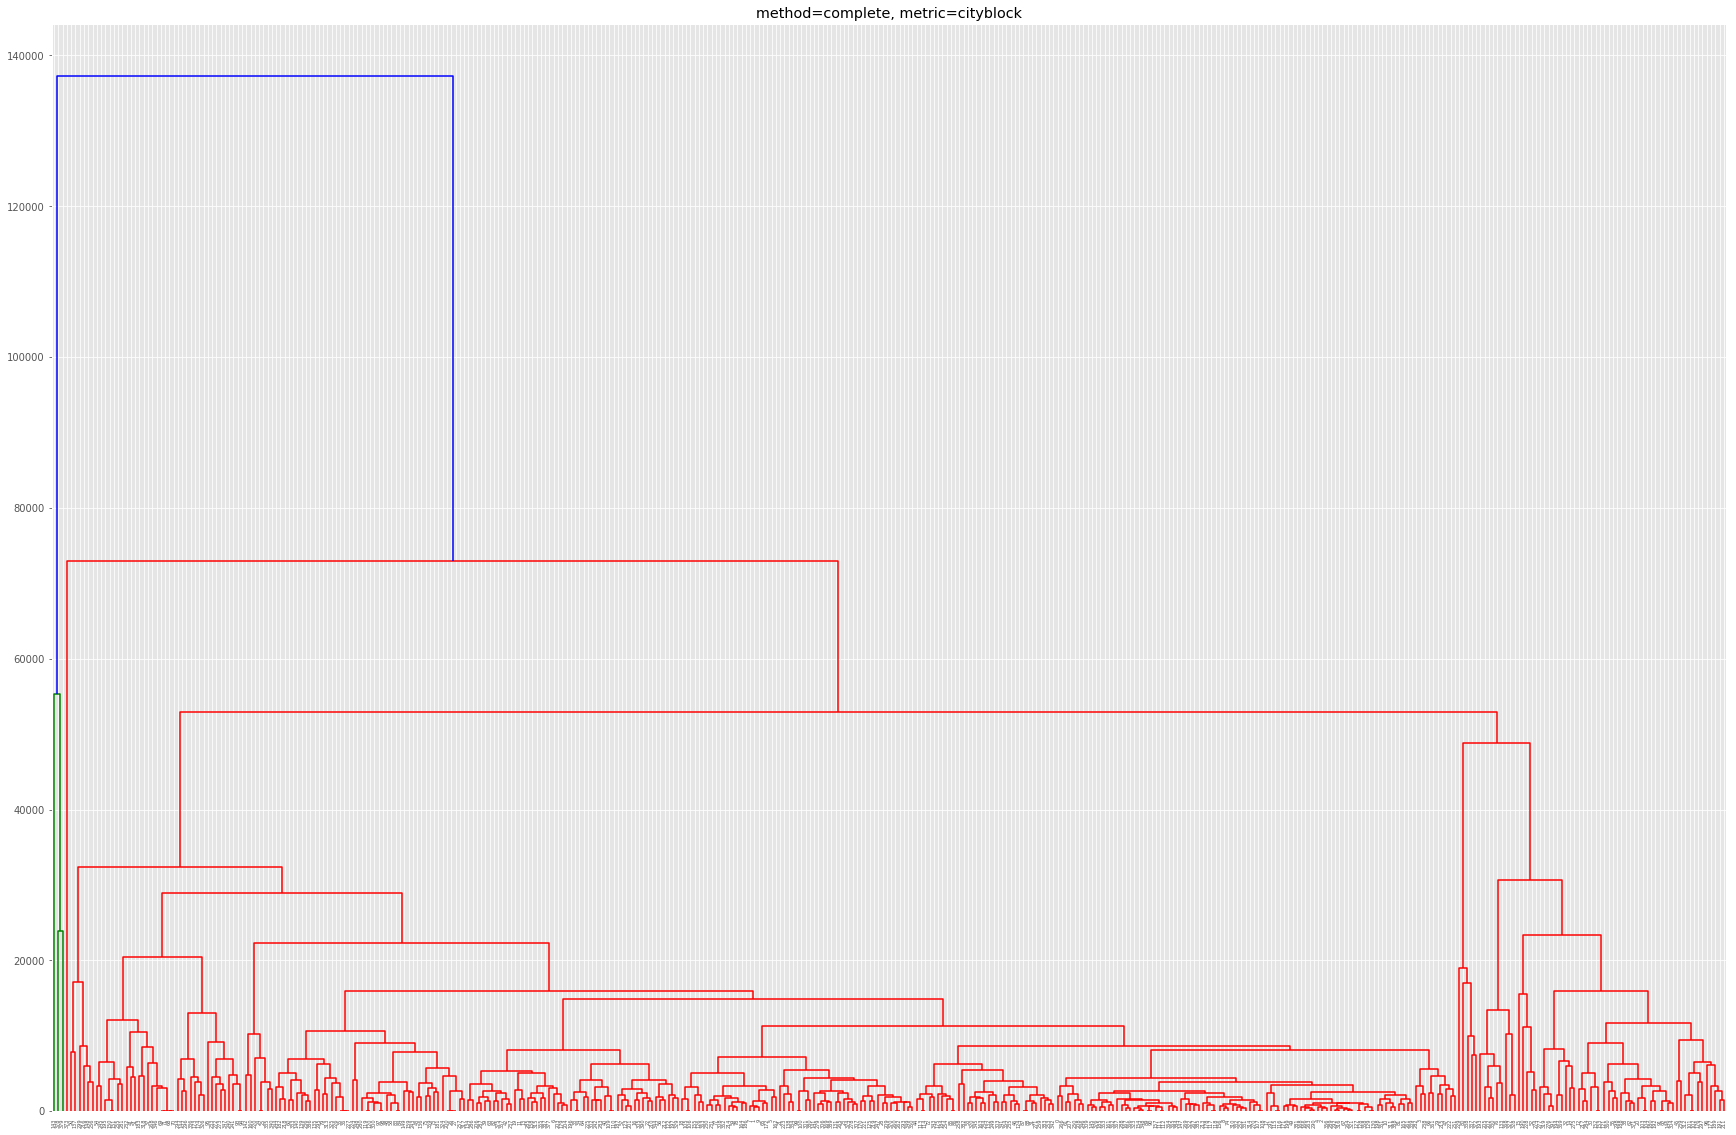

In [77]:
# enlarging dendrogram

plt.figure(figsize=(30,20))

plt.title("method=complete, metric=cityblock")
dendrogram(d2)
plt2.set_xticks([]);

***
# Clustering
##### Michael

### Finding number of clusters to use

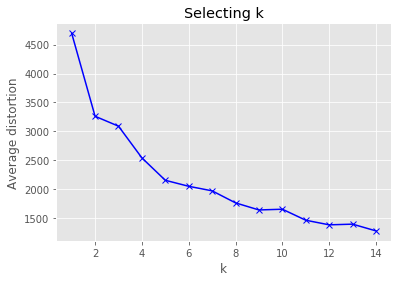

In [78]:
clusters=range(1,15)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(cdata)
    prediction=model.predict(cdata)
    meanDistortions.append(sum(np.min(cdist(cdata, model.cluster_centers_, 'euclidean'), axis=1)) / cdata.shape[0])

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k');



# 2 and 5 clusters seem to be the most obvious to try based on where an "elbow" may exist

## Agglomerative Clustering with n=5

In [79]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
x = cluster.fit_predict(cdata)
print(x)
np.bincount(x)

# agglomerative clustering with parameters
# also included is a count of the number of items in each cluster, for a total of 392 items
# most of the items are in clusters 1 and 3, 130 and 206 items respectively
# only 3 items exist in cluster 0, and 10 items in cluster 2
# cluster 4 has 43 items

[3 3 3 3 3 3 1 3 3 3 3 1 1 1 4 4 1 3 1 1 4 1 1 3 3 3 3 3 1 3 1 3 4 1 1 1 1
 3 4 1 1 3 1 3 3 4 3 3 1 3 3 3 4 3 3 4 1 1 1 3 1 3 4 1 1 3 3 3 3 3 3 3 3 3
 3 1 2 3 3 1 1 3 1 1 1 3 3 3 3 3 3 4 4 1 1 1 4 1 1 3 3 4 4 4 4 1 1 3 3 1 1
 3 3 3 3 3 3 3 3 1 1 4 1 1 3 3 1 3 3 3 3 3 3 2 1 1 3 3 3 1 1 1 3 0 1 3 4 3
 3 1 3 3 1 1 3 1 3 3 1 1 3 3 3 3 3 3 3 3 3 1 3 3 3 1 1 3 4 4 3 1 4 3 1 3 3
 3 3 1 4 4 4 4 4 2 4 3 1 1 3 3 3 1 2 1 1 2 1 3 3 1 1 4 1 3 3 3 3 1 1 3 3 3
 3 3 3 1 1 1 4 3 3 3 3 1 3 3 1 1 3 4 1 1 1 1 1 3 3 1 3 3 3 3 3 3 3 3 3 3 3
 3 1 3 1 3 3 3 3 3 3 3 3 3 1 1 4 4 4 4 3 1 1 3 3 1 1 1 1 1 3 3 3 3 3 1 1 1
 1 4 4 3 1 3 1 3 4 1 1 3 3 3 3 3 4 1 3 1 3 3 3 4 3 3 3 3 3 1 1 2 2 1 2 3 3
 1 3 3 1 1 1 3 3 3 3 3 1 3 3 1 3 1 1 3 3 3 3 1 3 1 3 3 4 3 3 1 3 3 3 3 2 4
 1 4 1 2 3 1 3 1 0 0 1 3 3 3 3 3 1 1 3 1 1 4]


array([  3, 130,  10, 206,  43], dtype=int64)

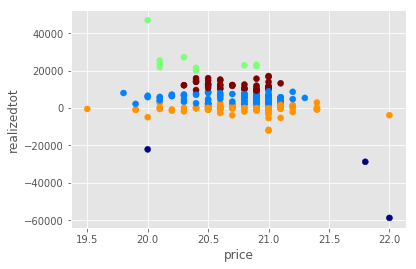

In [80]:
# cluster of price and realizedtot
plt.scatter(cdata.values[:,0],cdata.values[:,1], c=cluster.labels_, cmap='jet');
plt.xlabel("price");
plt.ylabel("realizedtot");

# the following plots are scatterplots with color coded data points corresponding to the clusters in which they belong
# it can be noted that 3 points exist on the bottom half of the figure, corresponding to the 3 items present in cluster 0
# the same applies for the top points, of which there are 10 and thus correspond with the 10 itmes present in cluster 2

# this trend follows throughout the rest of these figures
# the figures each depict two different variables compared (price, realizedtot, unrealq, etc.)

#each of the figures shows easily recognizable clusters, particularly clusters 0 and 2

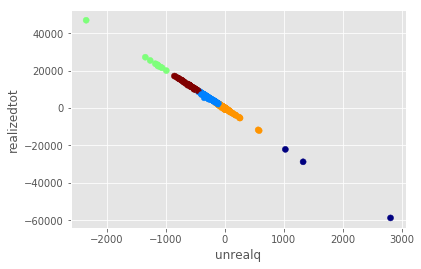

In [81]:
# cluster of unrealq and realizedtot
plt.scatter(cdata.values[:,2],cdata.values[:,1], c=cluster.labels_, cmap='jet');
plt.xlabel("unrealq");
plt.ylabel("realizedtot");

# nearly perfect negative correlation

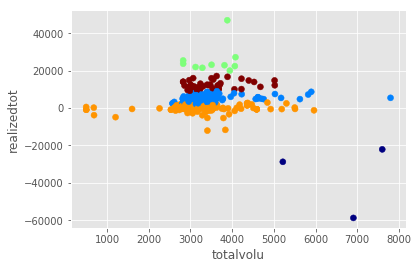

In [82]:
# cluster of totalvolu and realizedtot
plt.scatter(cdata.values[:,5],cdata.values[:,1], c=cluster.labels_, cmap='jet');
plt.xlabel("totalvolu");
plt.ylabel("realizedtot");

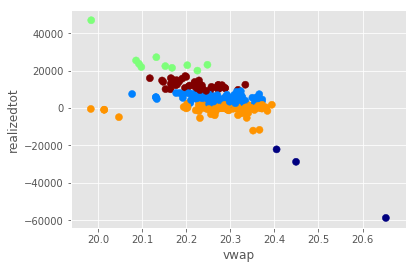

In [83]:
# cluster of vwap and realizedtot
plt.scatter(cdata.values[:,12], cdata.values[:,1], c=cluster.labels_, s=50, cmap='jet');
plt.xlabel("vwap");
plt.ylabel("realizedtot");

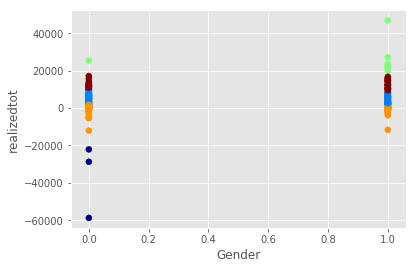

In [84]:
# cluster of Gender and realizedtot
plt.scatter(cdata.values[:,18], cdata.values[:,1], c=cluster.labels_, cmap='jet');
plt.xlabel("Gender");
plt.ylabel("realizedtot");

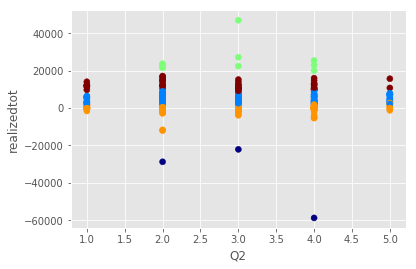

In [85]:
# cluster of Q2 and realizedtot
plt.scatter(cdata.values[:,19], cdata.values[:,1], c=cluster.labels_, cmap='jet');
plt.xlabel("Q2");
plt.ylabel("realizedtot");

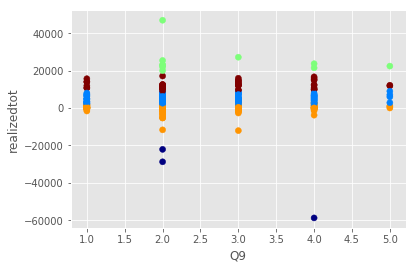

In [86]:
# cluster of Q9 and realizedtot
plt.scatter(cdata.values[:,20], cdata.values[:,1], c=cluster.labels_, cmap='jet');
plt.xlabel("Q9");
plt.ylabel("realizedtot");

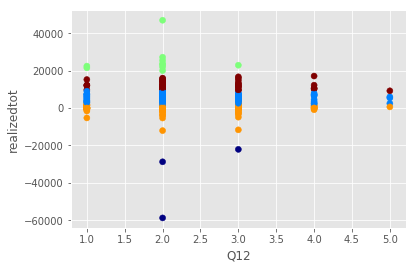

In [87]:
# cluster of Q12 and realizedtot
plt.scatter(cdata.values[:,21], cdata.values[:,1], c=cluster.labels_, cmap='jet');
plt.xlabel("Q12");
plt.ylabel("realizedtot");

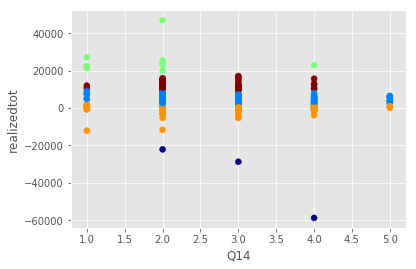

In [88]:
# cluster of Q14 and realizedtot
plt.scatter(cdata.values[:,22], cdata.values[:,1], c=cluster.labels_, cmap='jet');
plt.xlabel("Q14");
plt.ylabel("realizedtot");

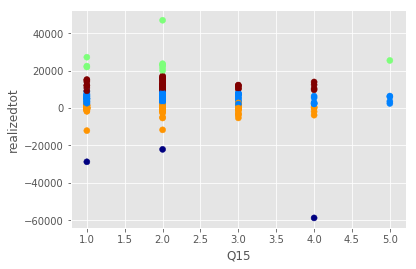

In [89]:
# cluster of Q15 and realizedtot
plt.scatter(cdata.values[:,23], cdata.values[:,1], c=cluster.labels_, cmap='jet');
plt.xlabel("Q15");
plt.ylabel("realizedtot");

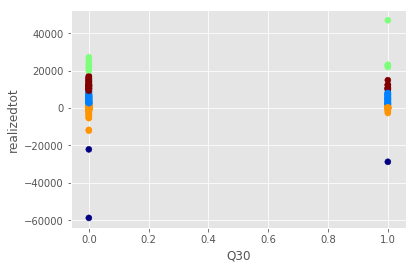

In [90]:
# cluster of Q30 and realizedtot
plt.scatter(cdata.values[:,24], cdata.values[:,1], c=cluster.labels_, cmap='jet');
plt.xlabel("Q30");
plt.ylabel("realizedtot");

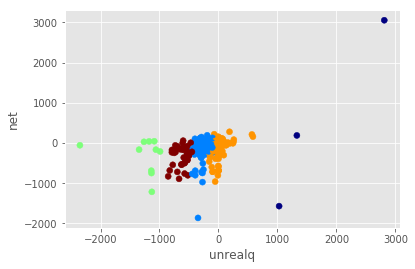

In [91]:
# cluster of unrealq and net
plt.scatter(cdata.values[:,2],cdata.values[:,14], c=cluster.labels_, cmap='jet');
plt.xlabel("unrealq");
plt.ylabel("net");

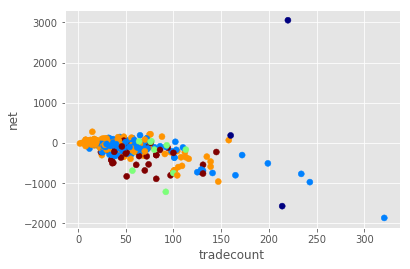

In [92]:
# cluster of tradecount and net
plt.scatter(cdata.values[:,6],cdata.values[:,14], c=cluster.labels_, cmap='jet');
plt.xlabel("tradecount");
plt.ylabel("net");

# here, the clusters begin to overlap more severely
# the clear delineations between clusters are gone

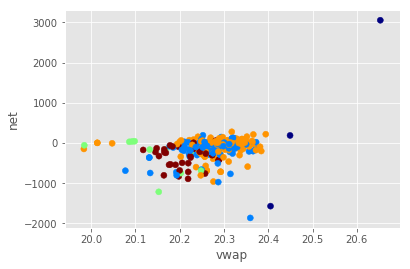

In [93]:
# cluster of vwap and net
plt.scatter(cdata.values[:,12], cdata.values[:,14], c=cluster.labels_, cmap='jet');
plt.xlabel("vwap");
plt.ylabel("net");

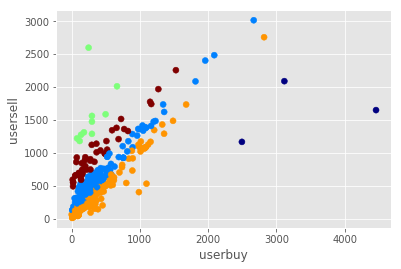

In [94]:
# cluster of userbuy and usersell
plt.scatter(cdata.values[:,15],cdata.values[:,16], c=cluster.labels_, cmap='jet');
plt.xlabel("userbuy");
plt.ylabel("usersell");

# again, we see easily recognizable clustering patterns

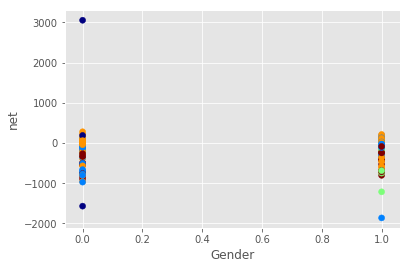

In [95]:
# cluster of gender and net
plt.scatter(cdata.values[:,18], cdata.values[:,14], c=cluster.labels_, cmap='jet');
plt.xlabel("Gender");
plt.ylabel("net");

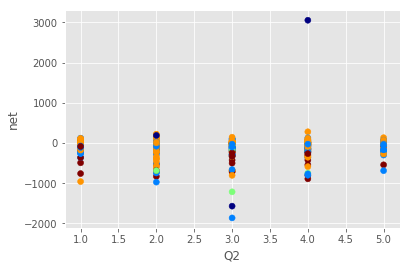

In [96]:
# cluster of Q2 and net
plt.scatter(cdata.values[:,19], cdata.values[:,14], c=cluster.labels_, cmap='jet');
plt.xlabel("Q2");
plt.ylabel("net");

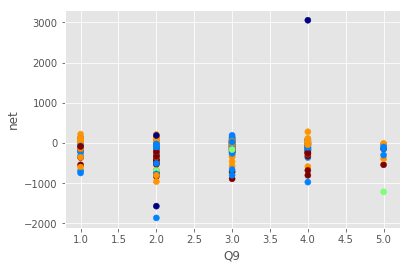

In [97]:
# cluster of Q9 and net
plt.scatter(cdata.values[:,20], cdata.values[:,14], c=cluster.labels_, cmap='jet');
plt.xlabel("Q9");
plt.ylabel("net");

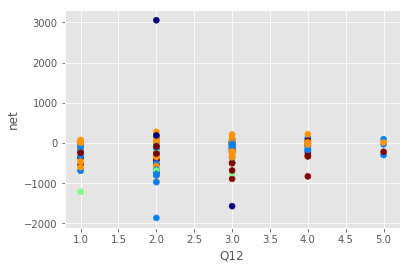

In [98]:
# cluster of Q12 and net
plt.scatter(cdata.values[:,21], cdata.values[:,14], c=cluster.labels_, cmap='jet');
plt.xlabel("Q12");
plt.ylabel("net");

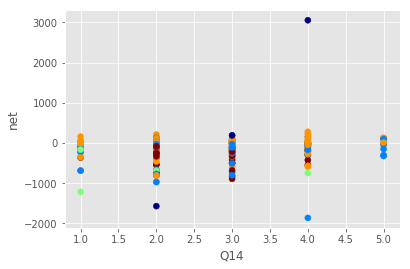

In [99]:
# cluster of Q14 and net
plt.scatter(cdata.values[:,22], cdata.values[:,14], c=cluster.labels_, cmap='jet');
plt.xlabel("Q14");
plt.ylabel("net");

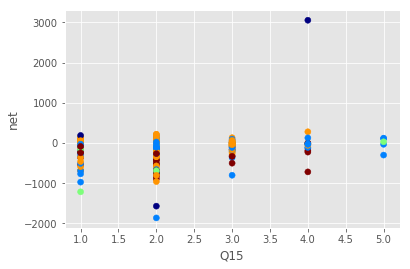

In [100]:
# cluster of Q15 and net
plt.scatter(cdata.values[:,23], cdata.values[:,14], c=cluster.labels_, cmap='jet');
plt.xlabel("Q15");
plt.ylabel("net");

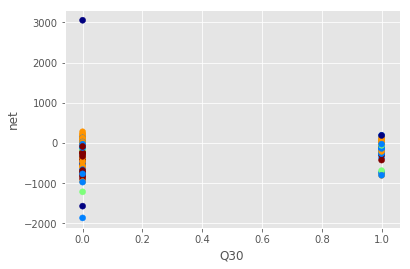

In [101]:
# cluster of Q30 and net
plt.scatter(cdata.values[:,24], cdata.values[:,14], c=cluster.labels_, cmap='jet');
plt.xlabel("Q30");
plt.ylabel("net");

## Kmeans Clustering with n=5

In [102]:
kmeans = KMeans(n_clusters=5, max_iter=1000, init='k-means++', n_init=1000, algorithm = 'auto')
kmeans.fit(cdata)
print(kmeans.cluster_centers_)

y = kmeans.fit_predict(cdata);

# iterations and number of runs are set high so the model converges rather than hits an artificial limit

[[ 2.08568376e+01  2.82139322e+02 -1.64230769e+01  6.71568376e+02
   2.02206838e-01  3.07354701e+03  3.70085470e+01  1.18946154e+03
   1.68341880e+02  2.31558120e+03  2.33598291e+02  1.21200427e-01
   2.02984602e+01  3.59659829e+02 -6.17568317e+01  3.27572650e+02
   3.43995726e+02  6.71568376e+02  5.76923077e-01  2.76068376e+00
   2.31196581e+00  2.22222222e+00  2.57264957e+00  2.01282051e+00
   1.96581197e-01]
 [ 2.07377778e+01  1.21908135e+04 -6.03355556e+02  1.44077778e+03
   3.84493333e-01  3.54900000e+03  6.71777778e+01  1.25124444e+03
   2.47266667e+02  2.85791111e+03  6.21977778e+02  1.68400000e-01
   2.02259113e+01  4.02006668e+02 -3.14079879e+02  4.18711111e+02
   1.02206667e+03  1.44077778e+03  5.11111111e-01  2.80000000e+00
   2.75555556e+00  2.40000000e+00  2.48888889e+00  2.08888889e+00
   1.55555556e-01]
 [ 2.12666667e+01 -3.65680334e+04  1.72266667e+03  4.99000000e+03
   7.56666667e-01  6.57533333e+03  1.98000000e+02  2.14066667e+03
   6.55000000e+02  5.53600000e+03  2.3

### Price and Realizedtot

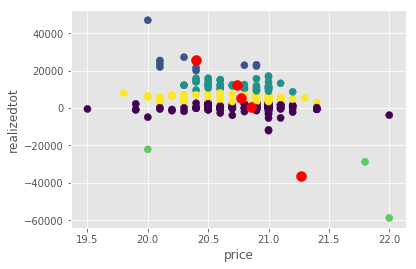

In [103]:
plt.scatter(cdata.values[:,0], cdata.values[:,1], c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=100);
plt.xlabel("price");
plt.ylabel("realizedtot");

# these are largely the same scatterplots as before, except with added centroids for the clusters
# you can see that the centroids are, for the most part, central to their clusters
# cluster 0 with 3 items has few items spread far, equating to a centroid that is central of the points but not necessarily close to any

### Unrealq and Realizedtot

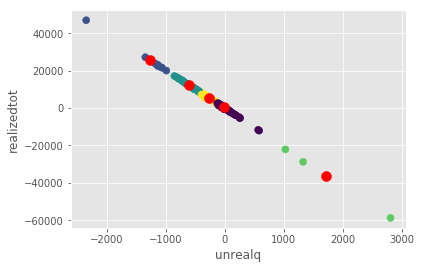

In [104]:
plt.scatter(cdata.values[:,2], cdata.values[:,1], c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,2], centers[:,1], c='red', s=100);
plt.xlabel("unrealq");
plt.ylabel("realizedtot");

# cluster 0 has the same trend here
# we can see cluster 2 centroid is near a majority of the items in cluster 2

### Totalvolu and Realizedtot

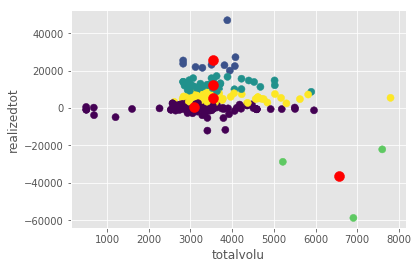

In [105]:
plt.scatter(cdata.values[:,5], cdata.values[:,1], c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,5], centers[:,1], c='red', s=100);
plt.xlabel("totalvolu");
plt.ylabel("realizedtot");

# cluster 0 and 2, same trend
# blue cluster centroid possibly pulled left by several data points

### Vwap and Realizedtot

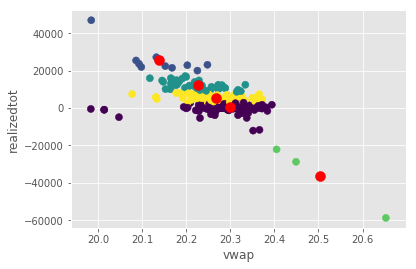

In [106]:
plt.scatter(cdata.values[:,12], cdata.values[:,1], c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,12], centers[:,1], c='red', s=100);
plt.xlabel("vwap");
plt.ylabel("realizedtot");

### Gender and realizedtot

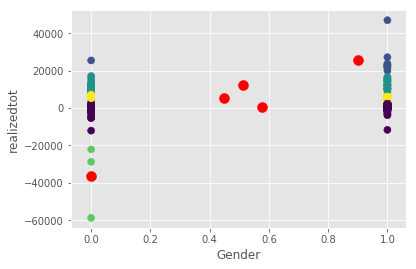

In [107]:
plt.scatter(cdata.values[:,18], cdata.values[:,1],c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,18], centers[:,1], c='red', s=100);
plt.xlabel("Gender");
plt.ylabel("realizedtot");

### Q2 and realizedtot

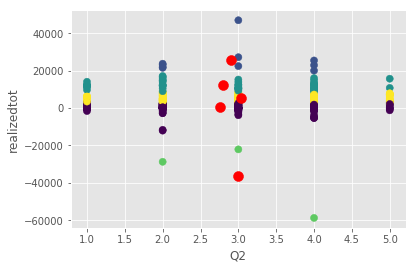

In [108]:
plt.scatter(cdata.values[:,19], cdata.values[:,1],c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,19], centers[:,1], c='red', s=100);
plt.xlabel("Q2");
plt.ylabel("realizedtot");

### Q9 and realizedtot

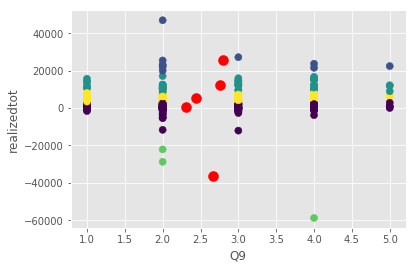

In [109]:
plt.scatter(cdata.values[:,20], cdata.values[:,1], c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,20], centers[:,1], c='red', s=100);
plt.xlabel("Q9");
plt.ylabel("realizedtot");

### Q12 and realizedtot

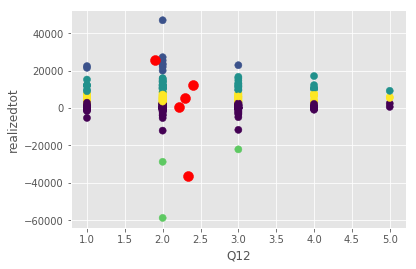

In [110]:
plt.scatter(cdata.values[:,21], cdata.values[:,1], c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,21], centers[:,1], c='red', s=100);
plt.xlabel("Q12");
plt.ylabel("realizedtot");

### Q14 and realizedtot

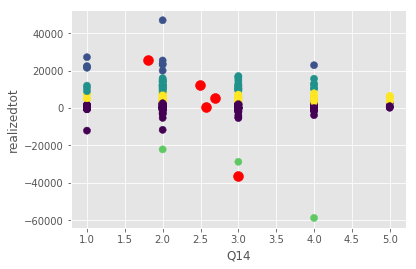

In [111]:
plt.scatter(cdata.values[:,22], cdata.values[:,1], c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,22], centers[:,1], c='red', s=100);
plt.xlabel("Q14");
plt.ylabel("realizedtot");

### Q15 and realizedtot

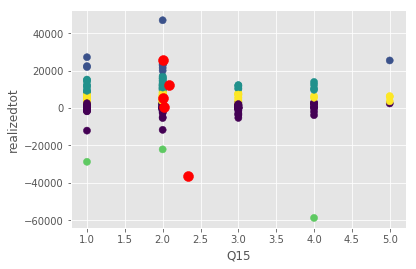

In [112]:
plt.scatter(cdata.values[:,23], cdata.values[:,1], c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,23], centers[:,1], c='red', s=100);
plt.xlabel("Q15");
plt.ylabel("realizedtot");

### Q30 and realizedtot

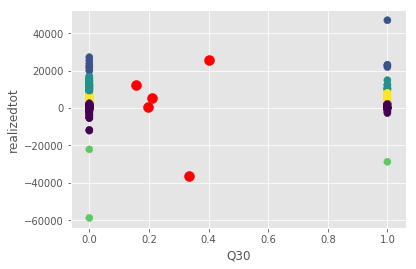

In [113]:
plt.scatter(cdata.values[:,24], cdata.values[:,1], c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,24], centers[:,1], c='red', s=100);
plt.xlabel("Q30");
plt.ylabel("realizedtot");

### Unrealq and Net

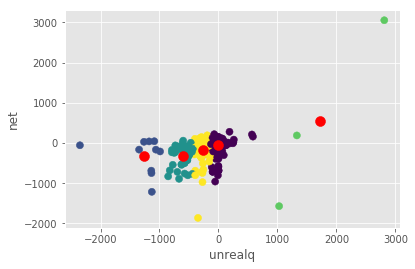

In [114]:
plt.scatter(cdata.values[:,2], cdata.values[:,14], c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,2], centers[:,14], c='red', s=100);
plt.xlabel("unrealq");
plt.ylabel("net");

# cluster 0 centroid far from two of the points

### Tradecount and Net

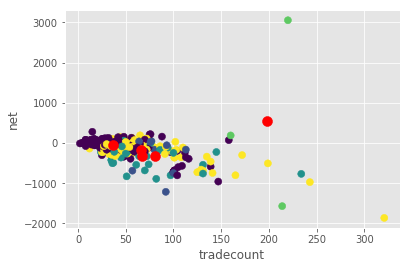

In [115]:
plt.scatter(cdata.values[:,6], cdata.values[:,14], c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,6], centers[:,14], c='red', s=100);
plt.xlabel("tradecount");
plt.ylabel("net");

# many of the clusters overlap

### Vwap and Net

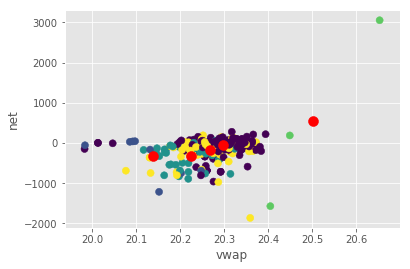

In [116]:
plt.scatter(cdata.values[:,12], cdata.values[:,14], c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,12], centers[:,14], c='red', s=100);
plt.xlabel("vwap");
plt.ylabel("net");

### Gender and Net

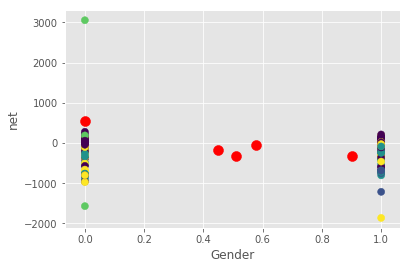

In [117]:
plt.scatter(cdata.values[:,18], cdata.values[:,14],c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,18], centers[:,14], c='red', s=100);
plt.xlabel("Gender");
plt.ylabel("net");

### Q2 and net

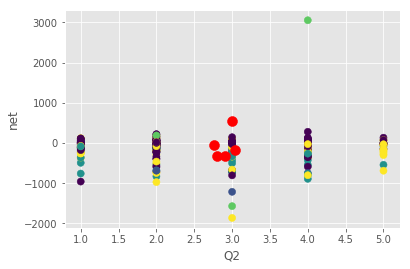

In [118]:
plt.scatter(cdata.values[:,19], cdata.values[:,14],c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,19], centers[:,14], c='red', s=100);
plt.xlabel("Q2");
plt.ylabel("net");

### Q9 and net

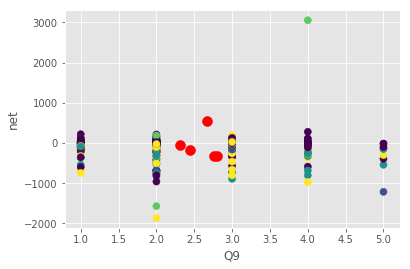

In [119]:
plt.scatter(cdata.values[:,20], cdata.values[:,14], c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,20], centers[:,14], c='red', s=100);
plt.xlabel("Q9");
plt.ylabel("net");

### Q12 and net

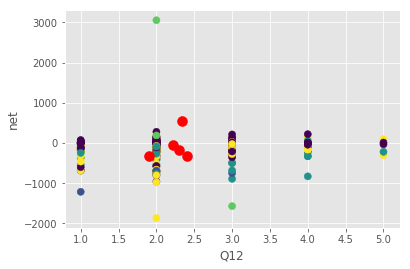

In [120]:
plt.scatter(cdata.values[:,21], cdata.values[:,14], c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,21], centers[:,14], c='red', s=100);
plt.xlabel("Q12");
plt.ylabel("net");

### Q14 and net

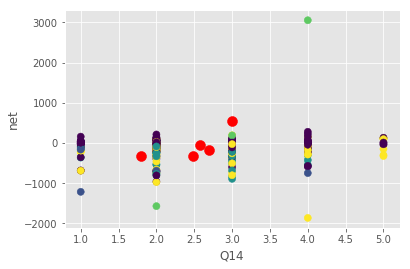

In [121]:
plt.scatter(cdata.values[:,22], cdata.values[:,14], c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,22], centers[:,14], c='red', s=100);
plt.xlabel("Q14");
plt.ylabel("net");

### Q15 and net

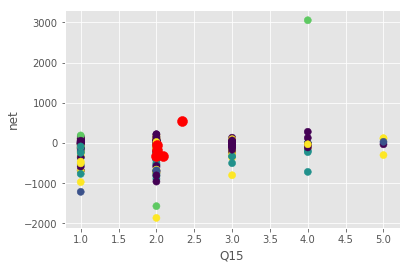

In [122]:
plt.scatter(cdata.values[:,23], cdata.values[:,14], c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,23], centers[:,14], c='red', s=100);
plt.xlabel("Q15");
plt.ylabel("net");

### Q30 and net

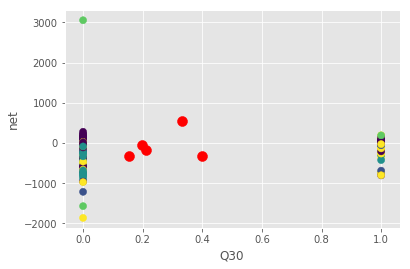

In [123]:
plt.scatter(cdata.values[:,24], cdata.values[:,14], c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,24], centers[:,14], c='red', s=100);
plt.xlabel("Q30");
plt.ylabel("net");

### Userbuy and Usersell

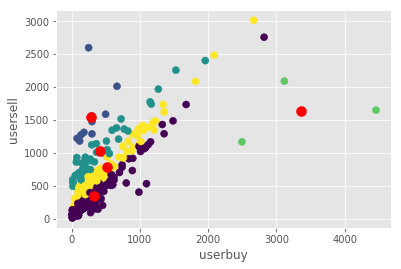

In [124]:
plt.scatter(cdata.values[:,15], cdata.values[:,16], c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,15], centers[:,16], c='red', s=100);
plt.xlabel("userbuy");
plt.ylabel("usersell");

## Agglomerative Clustering with n=2

In [125]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
x = cluster.fit_predict(cdata)
print(x)
np.bincount(x)

# changed the number of clusers to 2

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


array([339,  53], dtype=int64)

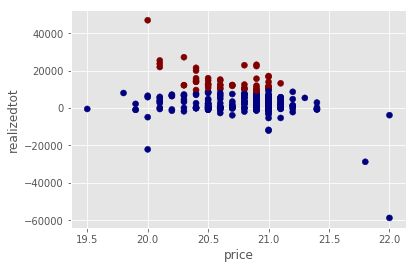

In [126]:
# cluster of price and realizedtot
plt.scatter(cdata.values[:,0],cdata.values[:,1], c=cluster.labels_, cmap='jet');
plt.xlabel("price");
plt.ylabel("realizedtot");

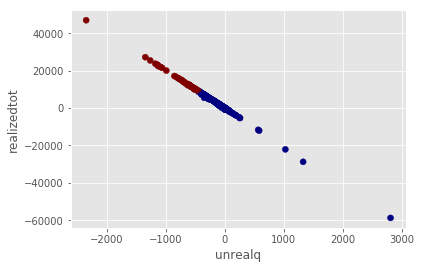

In [127]:
# cluster of unrealq and realizedtot
plt.scatter(cdata.values[:,2],cdata.values[:,1], c=cluster.labels_, cmap='jet');
plt.xlabel("unrealq");
plt.ylabel("realizedtot");

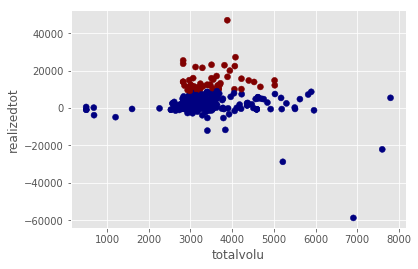

In [128]:
# cluster of totalvolu and realizedtot
plt.scatter(cdata.values[:,5],cdata.values[:,1], c=cluster.labels_, cmap='jet');
plt.xlabel("totalvolu");
plt.ylabel("realizedtot");

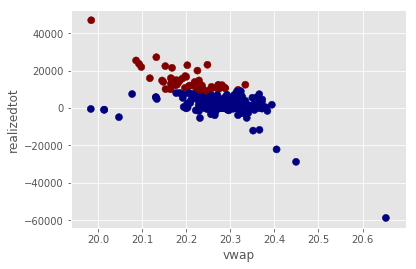

In [129]:
# cluster of vwap and realizedtot
plt.scatter(cdata.values[:,12], cdata.values[:,1], c=cluster.labels_, s=50, cmap='jet');
plt.xlabel("vwap");
plt.ylabel("realizedtot");

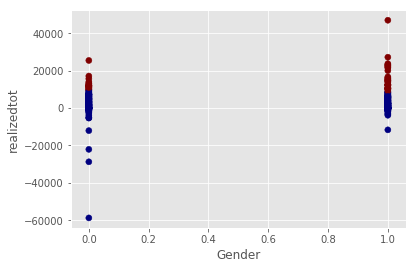

In [130]:
# cluster of Gender and realizedtot
plt.scatter(cdata.values[:,18], cdata.values[:,1], c=cluster.labels_, cmap='jet');
plt.xlabel("Gender");
plt.ylabel("realizedtot");

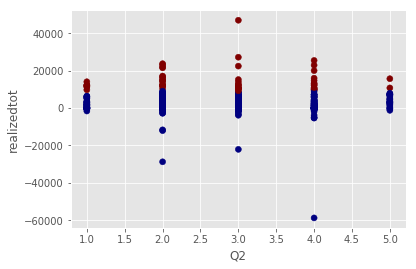

In [131]:
# cluster of Q2 and realizedtot
plt.scatter(cdata.values[:,19], cdata.values[:,1], c=cluster.labels_, cmap='jet');
plt.xlabel("Q2");
plt.ylabel("realizedtot");

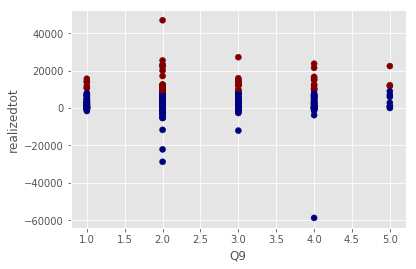

In [132]:
# cluster of Q9 and realizedtot
plt.scatter(cdata.values[:,20], cdata.values[:,1], c=cluster.labels_, cmap='jet');
plt.xlabel("Q9");
plt.ylabel("realizedtot");

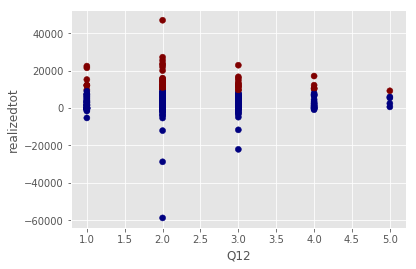

In [133]:
# cluster of Q12 and realizedtot
plt.scatter(cdata.values[:,21], cdata.values[:,1], c=cluster.labels_, cmap='jet');
plt.xlabel("Q12");
plt.ylabel("realizedtot");

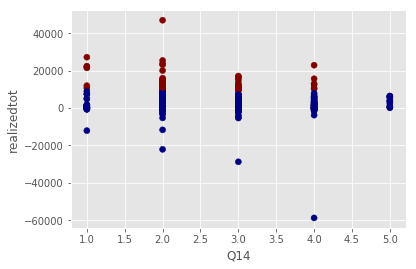

In [134]:
# cluster of Q14 and realizedtot
plt.scatter(cdata.values[:,22], cdata.values[:,1], c=cluster.labels_, cmap='jet');
plt.xlabel("Q14");
plt.ylabel("realizedtot");

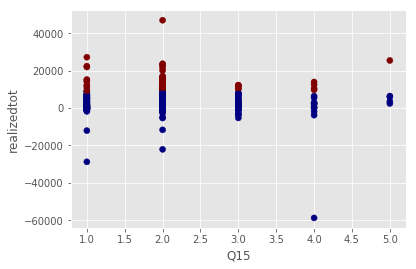

In [135]:
# cluster of Q15 and realizedtot
plt.scatter(cdata.values[:,23], cdata.values[:,1], c=cluster.labels_, cmap='jet');
plt.xlabel("Q15");
plt.ylabel("realizedtot");

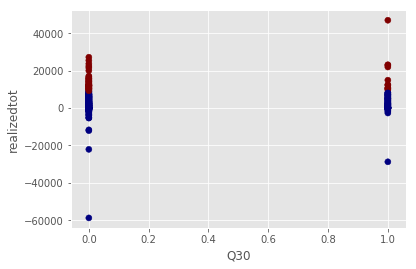

In [136]:
# cluster of Q30 and realizedtot
plt.scatter(cdata.values[:,24], cdata.values[:,1], c=cluster.labels_, cmap='jet');
plt.xlabel("Q30");
plt.ylabel("realizedtot");

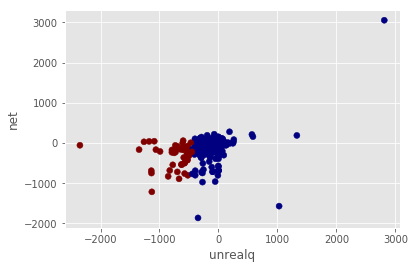

In [137]:
# cluster of unrealq and net
plt.scatter(cdata.values[:,2],cdata.values[:,14], c=cluster.labels_, cmap='jet');
plt.xlabel("unrealq");
plt.ylabel("net");

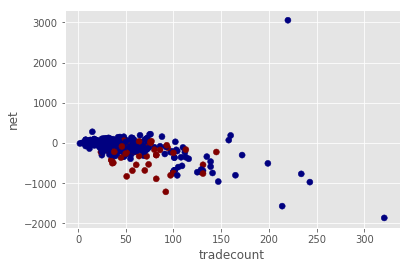

In [138]:
# cluster of tradecount and net
plt.scatter(cdata.values[:,6],cdata.values[:,14], c=cluster.labels_, cmap='jet');
plt.xlabel("tradecount");
plt.ylabel("net");

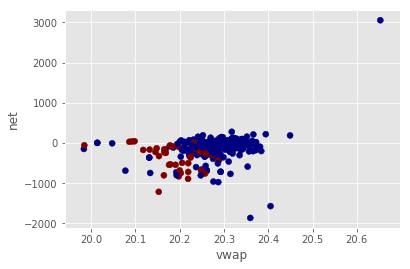

In [139]:
# cluster of vwap and net
plt.scatter(cdata.values[:,12], cdata.values[:,14], c=cluster.labels_, cmap='jet');
plt.xlabel("vwap");
plt.ylabel("net");

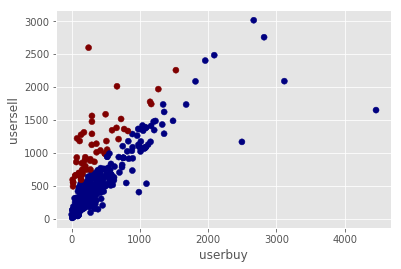

In [140]:
# cluster of userbuy and usersell
plt.scatter(cdata.values[:,15],cdata.values[:,16], c=cluster.labels_, cmap='jet');
plt.xlabel("userbuy");
plt.ylabel("usersell");

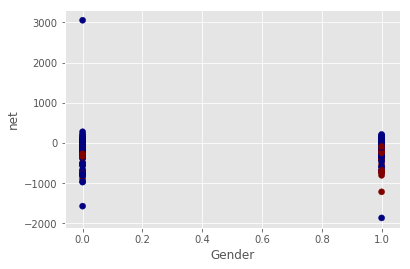

In [141]:
# cluster of Gender and net
plt.scatter(cdata.values[:,18], cdata.values[:,14], c=cluster.labels_, cmap='jet');
plt.xlabel("Gender");
plt.ylabel("net");

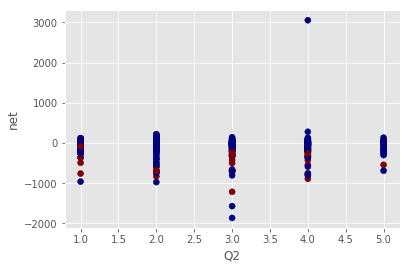

In [142]:
# cluster of Q2 and net
plt.scatter(cdata.values[:,19], cdata.values[:,14], c=cluster.labels_, cmap='jet');
plt.xlabel("Q2");
plt.ylabel("net");

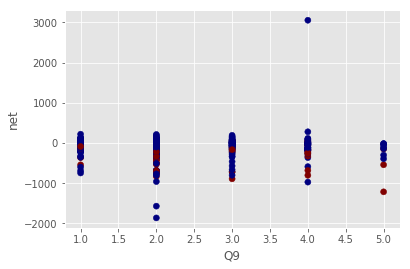

In [143]:
# cluster of Q9 and net
plt.scatter(cdata.values[:,20], cdata.values[:,14], c=cluster.labels_, cmap='jet');
plt.xlabel("Q9");
plt.ylabel("net");

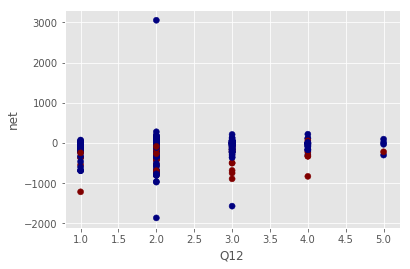

In [144]:
# cluster of Q12 and net
plt.scatter(cdata.values[:,21], cdata.values[:,14], c=cluster.labels_, cmap='jet');
plt.xlabel("Q12");
plt.ylabel("net");

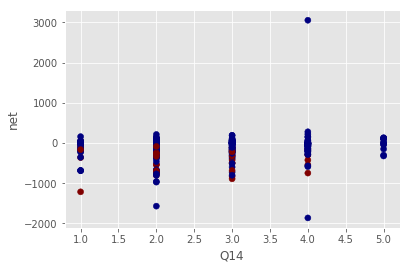

In [145]:
# cluster of Q14 and net
plt.scatter(cdata.values[:,22], cdata.values[:,14], c=cluster.labels_, cmap='jet');
plt.xlabel("Q14");
plt.ylabel("net");

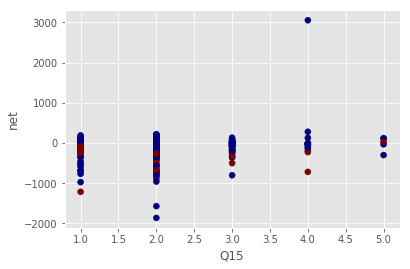

In [146]:
# cluster of Q15 and net
plt.scatter(cdata.values[:,23], cdata.values[:,14], c=cluster.labels_, cmap='jet');
plt.xlabel("Q15");
plt.ylabel("net");

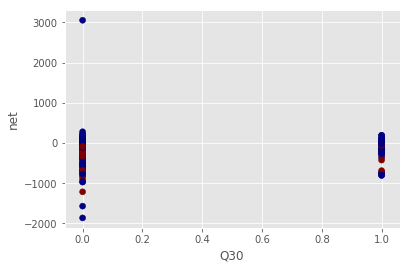

In [147]:
# cluster of Q30 and net
plt.scatter(cdata.values[:,24], cdata.values[:,14], c=cluster.labels_, cmap='jet');
plt.xlabel("Q30");
plt.ylabel("net");

## Kmeans Clustering with n=2

In [148]:
kmeans = KMeans(n_clusters=2, max_iter=1000, init='k-means++', n_init=1000, algorithm = 'auto')
kmeans.fit(cdata)
print(kmeans.cluster_centers_)

y = kmeans.fit_predict(cdata);

[[ 2.08449231e+01  1.20456740e+03 -6.24707692e+01  8.58113846e+02
   2.39724615e-01  3.22012615e+03  4.58800000e+01  1.22666462e+03
   1.94741538e+02  2.45577231e+03  3.20193846e+02  1.35300615e-01
   2.02940765e+01  3.72982769e+02 -8.34966004e+01  3.97821538e+02
   4.60292308e+02  8.58113846e+02  5.38461538e-01  2.83384615e+00
   2.35384615e+00  2.24923077e+00  2.62769231e+00  2.00923077e+00
   1.96923077e-01]
 [ 2.06552239e+01  1.34032061e+04 -6.64805970e+02  1.58411940e+03
   4.20808955e-01  3.59474627e+03  7.17761194e+01  1.26364179e+03
   2.68328358e+02  2.91868657e+03  6.88835821e+02  1.85179104e-01
   2.02109123e+01  4.53034330e+02 -2.93556628e+02  4.59656716e+02
   1.12446269e+03  1.58411940e+03  5.52238806e-01  2.88059701e+00
   2.68656716e+00  2.28358209e+00  2.32835821e+00  2.08955224e+00
   2.23880597e-01]]


#### Price and Realizedtot

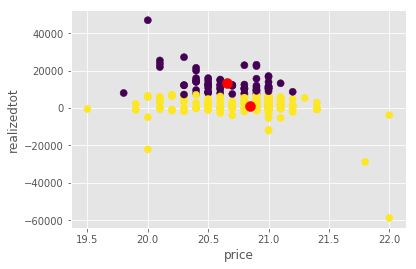

In [149]:
plt.scatter(cdata.values[:,0], cdata.values[:,1], c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=100);
plt.xlabel("price");
plt.ylabel("realizedtot");

# centroids very clear

#### Unrealq and Realizedtot

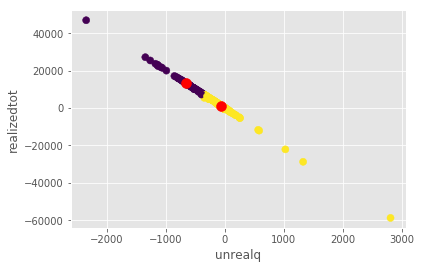

In [150]:
plt.scatter(cdata.values[:,2], cdata.values[:,1], c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,2], centers[:,1], c='red', s=100);
plt.xlabel("unrealq");
plt.ylabel("realizedtot");

#### Totalvolu and Realizedtot

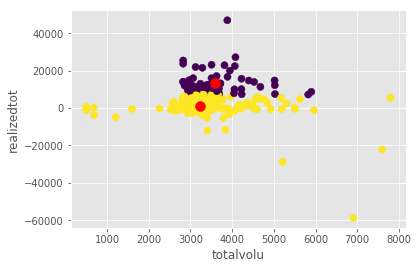

In [151]:
plt.scatter(cdata.values[:,5], cdata.values[:,1], c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,5], centers[:,1], c='red', s=100);
plt.xlabel("totalvolu");
plt.ylabel("realizedtot");

#### Vwap and Realizedtot

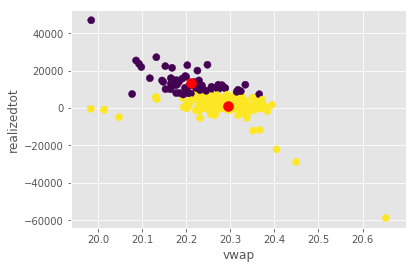

In [152]:
plt.scatter(cdata.values[:,12], cdata.values[:,1], c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,12], centers[:,1], c='red', s=100);
plt.xlabel("vwap");
plt.ylabel("realizedtot");

#### Gender and realizedtot

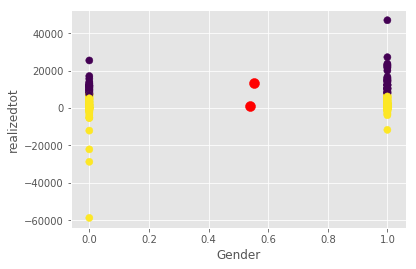

In [153]:
plt.scatter(cdata.values[:,18], cdata.values[:,1],c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,18], centers[:,1], c='red', s=100);
plt.xlabel("Gender");
plt.ylabel("realizedtot");

#### Q2 and realizedtot

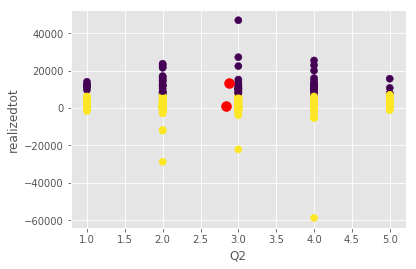

In [154]:
plt.scatter(cdata.values[:,19], cdata.values[:,1],c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,19], centers[:,1], c='red', s=100);
plt.xlabel("Q2");
plt.ylabel("realizedtot");

#### Q9 and realizedtot

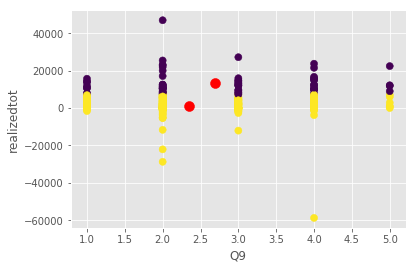

In [155]:
plt.scatter(cdata.values[:,20], cdata.values[:,1], c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,20], centers[:,1], c='red', s=100);
plt.xlabel("Q9");
plt.ylabel("realizedtot");

#### Q12 and realizedtot

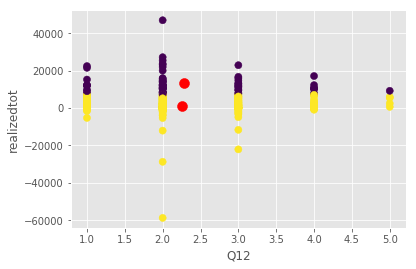

In [156]:
plt.scatter(cdata.values[:,21], cdata.values[:,1], c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,21], centers[:,1], c='red', s=100);
plt.xlabel("Q12");
plt.ylabel("realizedtot");

#### Q14 and realizedtot

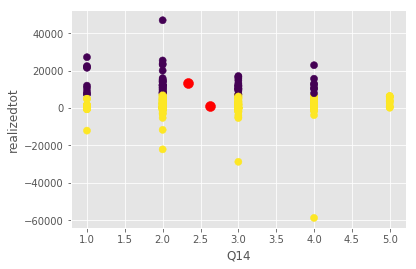

In [157]:
plt.scatter(cdata.values[:,22], cdata.values[:,1], c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,22], centers[:,1], c='red', s=100);
plt.xlabel("Q14");
plt.ylabel("realizedtot");

#### Q15 and realizedtot

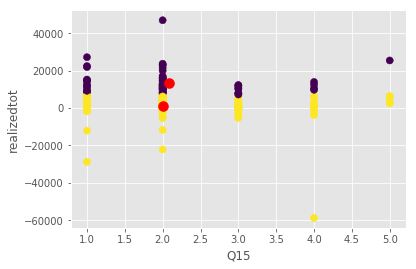

In [158]:
plt.scatter(cdata.values[:,23], cdata.values[:,1], c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,23], centers[:,1], c='red', s=100);
plt.xlabel("Q15");
plt.ylabel("realizedtot");

#### Q30 and realizedtot

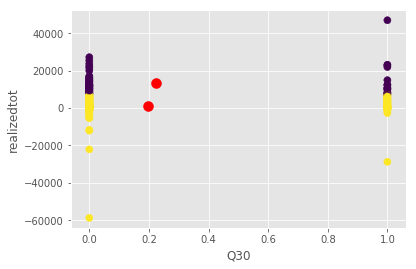

In [159]:
plt.scatter(cdata.values[:,24], cdata.values[:,1], c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,24], centers[:,1], c='red', s=100);
plt.xlabel("Q30");
plt.ylabel("realizedtot");

#### Unrealq and Net

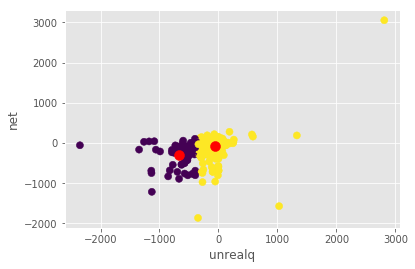

In [160]:
plt.scatter(cdata.values[:,2], cdata.values[:,14], c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,2], centers[:,14], c='red', s=100);
plt.xlabel("unrealq");
plt.ylabel("net");

#### Tradecount and Net

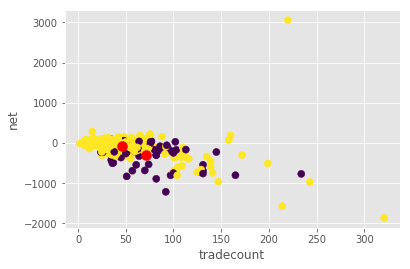

In [161]:
plt.scatter(cdata.values[:,6], cdata.values[:,14], c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,6], centers[:,14], c='red', s=100);
plt.xlabel("tradecount");
plt.ylabel("net");

#### Vwap and Net

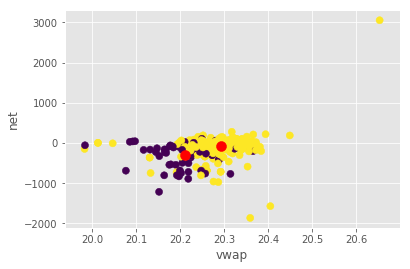

In [162]:
plt.scatter(cdata.values[:,12], cdata.values[:,14], c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,12], centers[:,14], c='red', s=100);
plt.xlabel("vwap");
plt.ylabel("net");

#### Gender and net

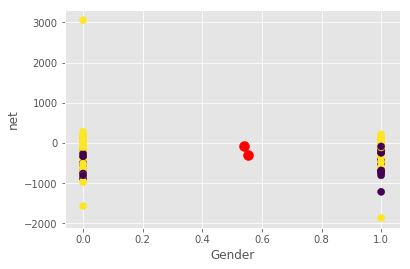

In [163]:
plt.scatter(cdata.values[:,18], cdata.values[:,14],c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,18], centers[:,14], c='red', s=100);
plt.xlabel("Gender");
plt.ylabel("net");

#### Q2 and net

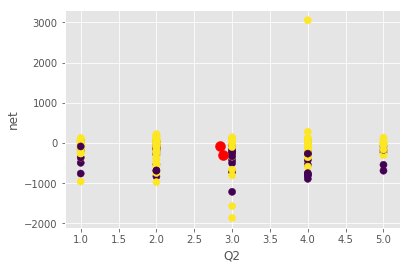

In [164]:
plt.scatter(cdata.values[:,19], cdata.values[:,14],c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,19], centers[:,14], c='red', s=100);
plt.xlabel("Q2");
plt.ylabel("net");

#### Q9 and net

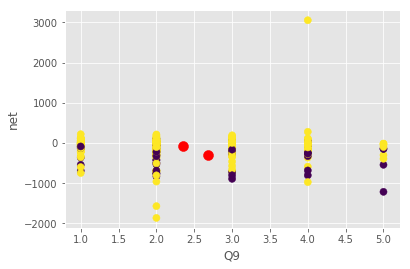

In [165]:
plt.scatter(cdata.values[:,20], cdata.values[:,14], c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,20], centers[:,14], c='red', s=100);
plt.xlabel("Q9");
plt.ylabel("net");

#### Q12 and net

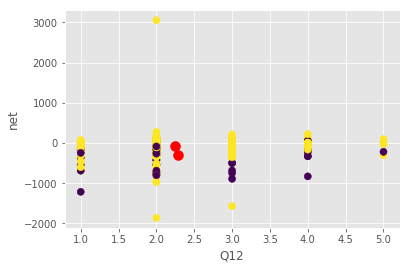

In [166]:
plt.scatter(cdata.values[:,21], cdata.values[:,14], c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,21], centers[:,14], c='red', s=100);
plt.xlabel("Q12");
plt.ylabel("net");

#### Q14 and net

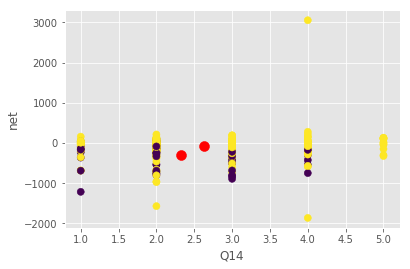

In [167]:
plt.scatter(cdata.values[:,22], cdata.values[:,14], c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,22], centers[:,14], c='red', s=100);
plt.xlabel("Q14");
plt.ylabel("net");

#### Q15 and net

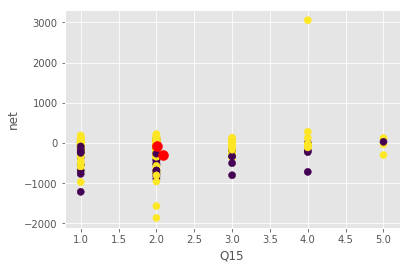

In [168]:
plt.scatter(cdata.values[:,23], cdata.values[:,14], c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,23], centers[:,14], c='red', s=100);
plt.xlabel("Q15");
plt.ylabel("net");

#### Q30 and net

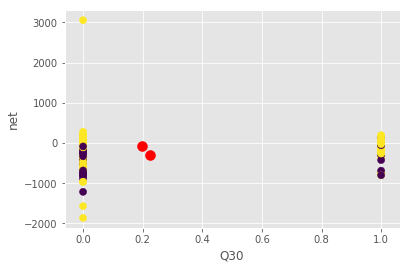

In [169]:
plt.scatter(cdata.values[:,24], cdata.values[:,14], c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,24], centers[:,14], c='red', s=100);
plt.xlabel("Q30");
plt.ylabel("net");

#### Userbuy and Usersell

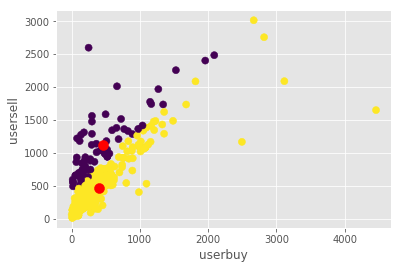

In [170]:
plt.scatter(cdata.values[:,15], cdata.values[:,16], c=y, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,15], centers[:,16], c='red', s=100);
plt.xlabel("userbuy");
plt.ylabel("usersell");

## Clustering with n=5 seems to offer the best clustering results
## n=2 does not offer enough clusters for the data

***
# Exploratory trader analysis
##### Lee

In [171]:
# Import survey data recoded in SPSS
# .SAV file loaded in
data_sav, meta = pyreadstat.read_sav('data_frame.sav')
data_sav.head(3)
#meta.column_labels # Variables from SPSS

# Pull up survey questions
meta_dict = dict(zip(meta.column_names, meta.column_labels))
meta_dict['Q2']
meta_dict['Q9']
meta_dict['Q12']
meta_dict['Q14']
meta_dict['Q15']
meta_dict['Q30']

desk trader Gender   Q2   Q9  Q12  Q14  Q15 Q30
0   S6   14a1      F  1.0  3.0  2.0  3.0  2.0   Y
1   S6   12B1      F  5.0  1.0  3.0  4.0  1.0   N
2   S6   1514      M  1.0  4.0  3.0  3.0  1.0   N

'I traded using ALL of the information provided to me at each stage'

'I believe that I can improve on my net profits if I had more information even if I did not have any technological tools to analyze the information'

'The source (Highly reputed like Wall Street Journal/ Bloomberg versus low/unknown reputation like Sun news) of information would impact my trading decisions'

'The medium (news /blog /video/ tool based) of information impacted my trading decisions'

'I believe that more stock specific information could have helped me to increase my net profits'

'I have had prior experience in live trading stock /shares'

In [172]:
# Set up desks to cross tab each question
Q2_desks = pd.crosstab(data_sav['Q2'].\
        map(meta.variable_value_labels['Q2']), \
        data_sav['desk'].map(meta.variable_value_labels['desk']), \
        dropna=True, normalize='columns'). \
        loc[meta.variable_value_labels['Q2'].values()]. \
        loc[:,meta.variable_value_labels['desk'].values()]*100

Q30_desks = pd.crosstab(data_sav['Q30'].\
        map(meta.variable_value_labels['Q30']), \
        data_sav['desk'].map(meta.variable_value_labels['desk']), \
        dropna=True, normalize='columns'). \
        loc[meta.variable_value_labels['Q30'].values()]. \
        loc[:,meta.variable_value_labels['desk'].values()]*100

# Most popular response from each desk:
meta_dict['Q2']
Q2_desks # Focus is on S1, where Disagree was the most popular choice.

meta_dict['Q30']
Q30_desks # S1 also had the greatest number of 'experienced' traders (~43%).

'I traded using ALL of the information provided to me at each stage'

desk                               S1         S2         S3         S4    S5  \
Q2                                                                             
Strongly Agree               7.142857   8.695652   7.843137   2.777778  16.0   
Agree                       14.285714  30.434783  39.215686  33.333333  34.0   
Neither Agree nor Disagree  28.571429  30.434783  27.450980  36.111111  16.0   
Disagree                    42.857143  26.086957  19.607843  25.000000  28.0   
Strongly Disagree            7.142857   4.347826   5.882353   2.777778   6.0   

desk                               S6         S7         S8         S9  \
Q2                                                                       
Strongly Agree              19.230769   8.510638   8.333333   3.448276   
Agree                       28.846154  25.531915  33.333333  24.137931   
Neither Agree nor Disagree  28.846154  34.042553  16.666667  44.827586   
Disagree                     5.769231  25.531915  16.666667  24.137931   
Strongly Disagree           17.307692   6.382979  25.000000   3.448276   

desk                              S10  
Q2                                     
Strongly Agree              16.326531  
Agree                       28.571429  
Neither Agree nor Disagree  24.489796  
Disagree                    28.571429  
Strongly Disagree            2.040816

'I have had prior experience in live trading stock /shares'

desk         S1        S2         S3         S4    S5         S6         S7  \
Q30                                                                           
No    57.142857  78.26087  76.470588  86.111111  84.0  78.846154  78.723404   
Yes   42.857143  21.73913  23.529412  13.888889  16.0  21.153846  21.276596   

desk    S8         S9       S10  
Q30                              
No    75.0  89.655172  77.55102  
Yes   25.0  10.344828  22.44898

### * Desk S1, 42.8% Disagreed to Q2
### * Desk S1, 42.8% had prior stock market experience

Desk  Sum of Returns
0   S1     -646.499457
1   S2    -1459.499882
2   S3    -8902.198635
3   S4    -1200.498502
4   S5    -4942.000158
5   S6    -1637.399082
6   S7    -2278.098918
7   S8     -930.199340
8   S9     -649.499737
9  S10    -4129.299503

-26775.193214

S10    48
S3     41
S4     36
S5     28
S7     19
S6     19
S9     18
S1     10
S8      9
S2      8
Name: desk, dtype: int64

F    0.470339
M    0.529661
Name: Gender, dtype: float64

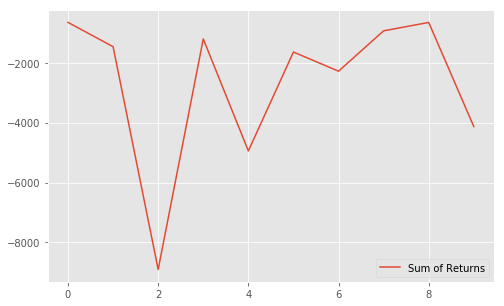

In [173]:
# ALL duplicates dropped here because of issues with data.
dr_data = data.sort_values('trader', ascending=False)
dr_data = dr_data.drop_duplicates(subset='trader')

# Splitting desks into their own groups
s1 = dr_data[dr_data.desk=='S1']
s2 = dr_data[dr_data.desk=='S2']
s3 = dr_data[dr_data.desk=='S3']
s4 = dr_data[dr_data.desk=='S4']
s5 = dr_data[dr_data.desk=='S5']
s6 = dr_data[dr_data.desk=='S6']
s7 = dr_data[dr_data.desk=='S7']
s8 = dr_data[dr_data.desk=='S8']
s9 = dr_data[dr_data.desk=='S9']
s10 = dr_data[dr_data.desk=='S10']

# Now look at the returns of S1, vs the others
net_s1 = s1['net'].sum()
net_s2 = s2['net'].sum()
net_s3 = s3['net'].sum()
net_s4 = s4['net'].sum()
net_s5 = s5['net'].sum()
net_s6 = s6['net'].sum()
net_s7 = s7['net'].sum()
net_s8 = s8['net'].sum()
net_s9 = s9['net'].sum() 
net_s10 = s10['net'].sum()

nets = [['S1', net_s1], ['S2', net_s2], ['S3', net_s3], ['S4', net_s4], ['S5', net_s5], ['S6', net_s6], ['S7', net_s7], ['S8', net_s8], ['S9', net_s9], ['S10', net_s10]]

desk_nets = pd.DataFrame(nets, columns = ['Desk', 'Sum of Returns'])

desk_nets

# Sum of all nets
dr_data['net'].sum()

# Plot of nets for each desk
desk_nets.plot(figsize=(8,5))


# Count of traders per desk
dr_data['desk'].value_counts()

# Male to Female Ratio
dr_data['Gender'].value_counts(normalize=True).sort_index()

### * Every desk lost money/Seems that all of the traders collectively lost money. 
### * S1 lost the least and had the > # of experienced, but also had less traders at its desk.
### * Therefore, this analysis is inconclusive to any conclusion if S1 was any better than the rest.

***
# Volume Weighted Average Price Analysis
##### Lee

## Desk 1 VWAP Analysis

vwap      price     PVWAP
trader                                
3A08    20.356805  20.400000  0.043195
3B08    20.337701  20.600000  0.262299
1b 2    20.350033  20.800001  0.449968

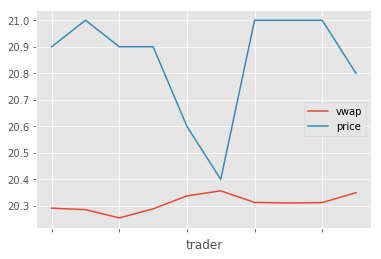

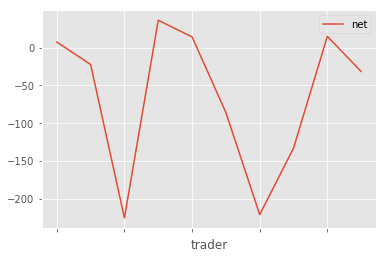

In [174]:
# Desk 1 VWAP - Price

# Pull trader, vwap, price
s1_vp = s1[["trader","vwap","price"]]
s1_vp.set_index('trader', inplace=True)

# subtract and store price - vwap as PVWAP
vp1_diff = pd.DataFrame(s1_vp,columns= ['vwap','price']) 
vp1_diff['PVWAP'] = vp1_diff['price'] - vp1_diff['vwap']

# Plot price & vwap
s1_vp.plot()

# trader nets from desk
s1_net = s1[["trader","net"]]
s1_net.set_index('trader', inplace=True)
s1_net.plot()

# finding the closest price to vwap
g0_1 = vp1_diff[vp1_diff.PVWAP > 0]
g0_1 = g0_1[g0_1.PVWAP < .5]
g0_1.sort_values('PVWAP', ascending=True)

In [175]:
# Looking at trades from closest to vwap (closest first)
trader_3A08 = s1[s1.trader=='3A08']
trader_3A08['net'] # Loss

trader_3B08 = s1[s1.trader=='3B08']
trader_3B08['net'] # Gain

trader_1b_2 = s1[s1.trader=='1b 2']
trader_1b_2['net'] # Loss

354   -85.799901
Name: net, dtype: float64

353    14.0
Name: net, dtype: float64

357   -31.700065
Name: net, dtype: float64

## Desk 2 VWAP Analysis

vwap  price     PVWAP
trader                            
108T    20.294984   20.5  0.205016
1008    20.294291   20.9  0.605709
208T    20.331804   21.0  0.668196
908T    20.319205   21.0  0.680795

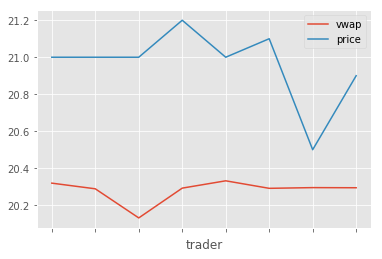

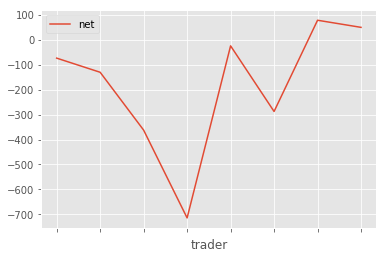

In [176]:
# Desk 2 VWAP - Price

# Pull trader, vwap, price
s2_vp = s2[["trader","vwap","price"]]
s2_vp.set_index('trader', inplace=True)

# subtract and store price - vwap as PVWAP
vp2_diff = pd.DataFrame(s2_vp,columns= ['vwap','price']) 
vp2_diff['PVWAP'] = vp2_diff['price'] - vp2_diff['vwap']

# Plot price & vwap
s2_vp.plot()

# trader nets from desk
s2_net = s2[["trader","net"]]
s2_net.set_index('trader', inplace=True)
s2_net.plot()

# finding the closest price to vwap
g0_2 = vp2_diff[vp2_diff.PVWAP > 0]
g0_2 = g0_2[g0_2.PVWAP < .7]
g0_2.sort_values('PVWAP', ascending=True)

In [177]:
# Looking at trades from closest to vwap (closest first)
trader_108T = s2[s2.trader=='108T']
trader_108T['net'] # Gain

trader_1008 = s2[s2.trader=='1008']
trader_1008['net'] # Gain

trader_208T = s2[s2.trader=='208T']
trader_208T['net'] # Loss

trader_908T = s2[s2.trader=='908T']
trader_908T['net'] # Loss

116    79.4
Name: net, dtype: float64

120    50.8
Name: net, dtype: float64

107   -23.499995
Name: net, dtype: float64

83   -72.799793
Name: net, dtype: float64

## Desk 3 VWAP Analysis

vwap  price     PVWAP
trader                            
2b08    20.086159   20.1  0.013841
11A0    20.270716   20.3  0.029284
10b0    20.300298   20.4  0.099702

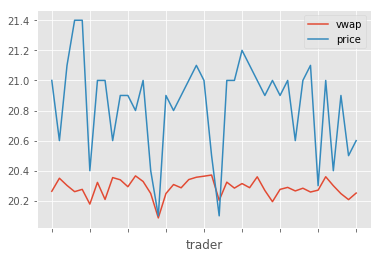

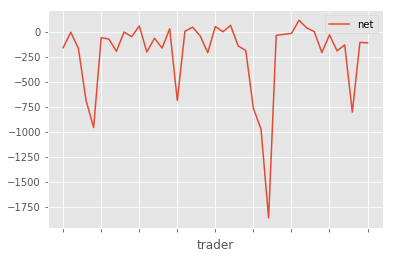

In [178]:
# Desk 3 VWAP - Price

# Pull trader, vwap, price
s3_vp = s3[["trader","vwap","price"]]
s3_vp.set_index('trader', inplace=True)

# subtract and store price - vwap as PVWAP
vp3_diff = pd.DataFrame(s3_vp,columns= ['vwap','price']) 
vp3_diff['PVWAP'] = vp3_diff['price'] - vp3_diff['vwap']

# Plot price & vwap
s3_vp.plot()

# trader nets from desk
s3_net = s3[["trader","net"]]
s3_net.set_index('trader', inplace=True)
s3_net.plot()

# finding the closest price to vwap
g0_3 = vp3_diff[vp3_diff.PVWAP > 0]
g0_3 = g0_3[g0_3.PVWAP < .1]
g0_3.sort_values('PVWAP', ascending=True)

In [179]:
# Looking at trades from closest to vwap (closest first)
trader_2b08 = s3[s3.trader=='2b08']
trader_2b08['net'] # Gain

trader_11A0 = s3[s3.trader=='11A0']
trader_11A0['net'] # Loss

trader_10b0 = s3[s3.trader=='10b0']
trader_10b0['net'] # Loss

327    29.9
Name: net, dtype: float64

344   -31.1
Name: net, dtype: float64

345   -131.2
Name: net, dtype: float64

## Desk 4 VWAP Analysis

vwap  price     PVWAP
trader                            
8a09    20.355984   20.5  0.144016
809T    20.350987   20.5  0.149013
6b09    20.231147   20.4  0.168853
7C09    20.210488   20.4  0.189512
209T    20.309023   20.5  0.190977

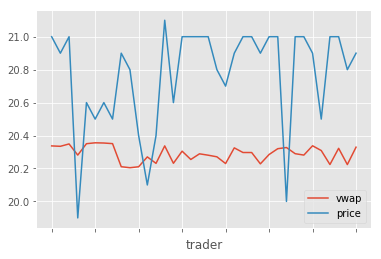

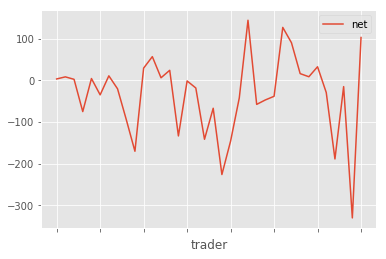

In [180]:
# Desk 4 VWAP - Price

# Pull trader, vwap, price
s4_vp = s4[["trader","vwap","price"]]
s4_vp.set_index('trader', inplace=True)

# subtract and store price - vwap as PVWAP
vp4_diff = pd.DataFrame(s4_vp,columns= ['vwap','price']) 
vp4_diff['PVWAP'] = vp4_diff['price'] - vp4_diff['vwap']

# Plot price & vwap
s4_vp.plot()

# trader nets from desk
s4_net = s4[["trader","net"]]
s4_net.set_index('trader', inplace=True)
s4_net.plot()

# finding the closest price to vwap
g0_4 = vp4_diff[vp4_diff.PVWAP > 0]
g0_4 = g0_4[g0_4.PVWAP < .2]
g0_4.sort_values('PVWAP', ascending=True)

In [181]:
# Looking at trades from closest to vwap (closest first)
trader_8a09 = s4[s4.trader=='8a09']
trader_8a09['net'] # Loss

trader_809T = s4[s4.trader=='809T']
trader_809T['net'] # Loss

trader_6b09 = s4[s4.trader=='6b09']
trader_6b09['net'] # Gain

trader_7C09 = s4[s4.trader=='7C09']
trader_7C09['net'] # Gain

trader_209T = s4[s4.trader=='209T']
trader_209T['net'] # Loss

293   -34.599965
Name: net, dtype: float64

59   -20.099951
Name: net, dtype: float64

298    6.400297
Name: net, dtype: float64

294    29.60031
Name: net, dtype: float64

65   -29.0
Name: net, dtype: float64

## Desk 5 VWAP Analysis

vwap  price     PVWAP
trader                            
3b14    20.329752   20.4  0.070248
214T    20.175811   20.3  0.124189
6B14    20.282093   20.5  0.217907
5b14    20.353553   20.6  0.246447

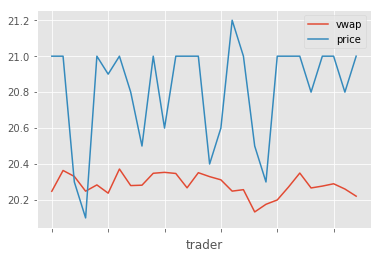

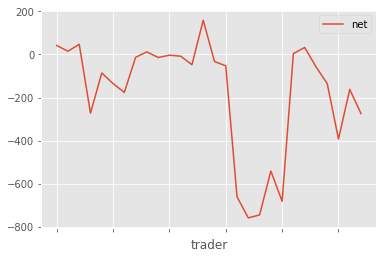

In [182]:
# Desk 5 VWAP - Price

# Pull trader, vwap, price
s5_vp = s5[["trader","vwap","price"]]
s5_vp.set_index('trader', inplace=True)

# subtract and store price - vwap as PVWAP
vp5_diff = pd.DataFrame(s5_vp,columns= ['vwap','price']) 
vp5_diff['PVWAP'] = vp5_diff['price'] - vp5_diff['vwap']

# Plot price & vwap
s5_vp.plot()

# trader nets from desk
s5_net = s5[["trader","net"]]
s5_net.set_index('trader', inplace=True)
s5_net.plot()

# finding the closest price to vwap
g0_5 = vp5_diff[vp5_diff.PVWAP > 0]
g0_5 = g0_5[g0_5.PVWAP < .25]
g0_5.sort_values('PVWAP', ascending=True)

In [183]:
# Looking at trades from closest to vwap (closest first)
trader_3b14 = s5[s5.trader=='3b14']
trader_3b14['net'] # Loss

trader_214T = s5[s5.trader=='214T']
trader_214T['net'] # Loss

trader_6B14 = s5[s5.trader=='6B14']
trader_6B14['net'] # Gain

trader_5b14 = s5[s5.trader=='5b14']
trader_5b14['net'] # Loss

270   -32.9
Name: net, dtype: float64

52   -541.299925
Name: net, dtype: float64

261    11.89996
Name: net, dtype: float64

264   -3.5
Name: net, dtype: float64

## Desk 6 VWAP Analysis

vwap  price     PVWAP
trader                            
2014    20.236094   20.6  0.363906
9a14    20.264769   20.7  0.435231
314T    20.317902   20.8  0.482098

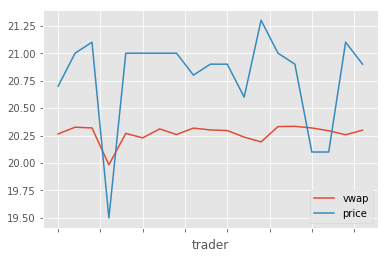

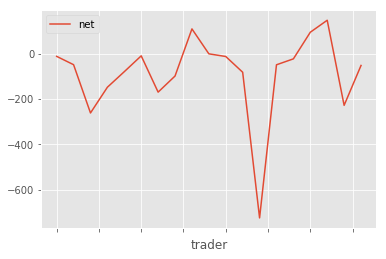

In [184]:
# Desk 6 VWAP - Price

# Pull trader, vwap, price
s6_vp = s6[["trader","vwap","price"]]
s6_vp.set_index('trader', inplace=True)

# subtract and store price - vwap as PVWAP
vp6_diff = pd.DataFrame(s6_vp,columns= ['vwap','price']) 
vp6_diff['PVWAP'] = vp6_diff['price'] - vp6_diff['vwap']

# Plot price & vwap
s6_vp.plot()

# trader nets from desk
s6_net = s6[["trader","net"]]
s6_net.set_index('trader', inplace=True)
s6_net.plot()

# finding the closest price to vwap
g0_6 = vp6_diff[vp6_diff.PVWAP > 0]
g0_6 = g0_6[g0_6.PVWAP < .5]
g0_6.sort_values('PVWAP', ascending=True)

In [185]:
# Looking at trades from closest to vwap (closest first)
trader_2014 = s6[s6.trader=='2014']
trader_2014['net'] # Loss

trader_9a14 = s6[s6.trader=='9a14']
trader_9a14['net'] # Loss

trader_314T = s6[s6.trader=='314T']
trader_314T['net'] # Gain

38   -81.399688
Name: net, dtype: float64

216   -11.2
Name: net, dtype: float64

36    110.200092
Name: net, dtype: float64

## Desk 7 VWAP Analysis

vwap  price     PVWAP
trader                            
1914    20.285638   20.3  0.014362
6a14    20.281124   20.3  0.018876
12b1    20.334069   20.5  0.165931

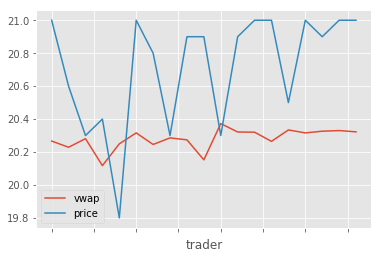

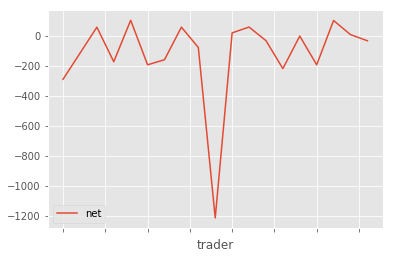

In [186]:
# Desk 7 VWAP - Price

# Pull trader, vwap, price
s7_vp = s7[["trader","vwap","price"]]
s7_vp.set_index('trader', inplace=True)

# subtract and store price - vwap as PVWAP
vp7_diff = pd.DataFrame(s7_vp,columns= ['vwap','price']) 
vp7_diff['PVWAP'] = vp7_diff['price'] - vp7_diff['vwap']

# Plot price & vwap
s7_vp.plot()

# trader nets from desk
s7_net = s7[["trader","net"]]
s7_net.set_index('trader', inplace=True)
s7_net.plot()

# finding the closest price to vwap
g0_7 = vp7_diff[vp7_diff.PVWAP > 0]
g0_7 = g0_7[g0_7.PVWAP < .2]
g0_7.sort_values('PVWAP', ascending=True)

In [187]:
# Looking at trades from closest to vwap (closest first)
trader_1914 = s7[s7.trader=='1914']
trader_1914['net'] # Gain

trader_6a14 = s7[s7.trader=='6a14']
trader_6a14['net'] # Gain

trader_12b1 = s7[s7.trader=='12b1']
trader_12b1['net'] # Small Loss

18    58.60005
Name: net, dtype: float64

191    58.50006
Name: net, dtype: float64

211   -0.69979
Name: net, dtype: float64

## Desk 8 VWAP Analysis

vwap  price     PVWAP
trader                            
4b15    20.177148   20.5  0.322852
2a15    20.371701   20.7  0.328299
4a15    20.237757   20.6  0.362243
3A15    20.235642   20.6  0.364358

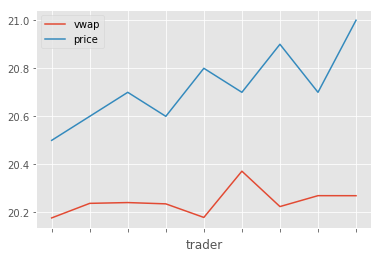

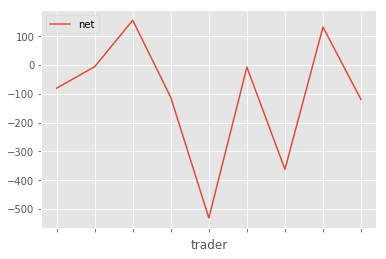

In [188]:
# Desk 8 VWAP - Price

# Pull trader, vwap, price
s8_vp = s8[["trader","vwap","price"]]
s8_vp.set_index('trader', inplace=True)

# subtract and store price - vwap as PVWAP
vp8_diff = pd.DataFrame(s8_vp,columns= ['vwap','price']) 
vp8_diff['PVWAP'] = vp8_diff['price'] - vp8_diff['vwap']

# Plot price & vwap
s8_vp.plot()

# trader nets from desk
s8_net = s8[["trader","net"]]
s8_net.set_index('trader', inplace=True)
s8_net.plot()

# finding the closest price to vwap
g0_8 = vp8_diff[vp8_diff.PVWAP > 0]
g0_8 = g0_8[g0_8.PVWAP < .4]
g0_8.sort_values('PVWAP', ascending=True)

In [189]:
# Looking at trades from closest to vwap (closest first)
trader_4b15 = s8[s8.trader=='4b15']
trader_4b15['net'] # Loss

trader_2a15 = s8[s8.trader=='2a15']
trader_2a15['net'] # Loss

trader_4a15 = s8[s8.trader=='4a15']
trader_4a15['net'] # Loss

trader_3A15 = s8[s8.trader=='3A15']
trader_3A15['net'] # Loss

173   -80.09982
Name: net, dtype: float64

178   -7.2
Name: net, dtype: float64

174   -5.599976
Name: net, dtype: float64

176   -112.499848
Name: net, dtype: float64

## Desk 9 VWAP Analysis

vwap  price     PVWAP
trader                            
1115    20.352569   20.6  0.247431
1015    20.353596   20.7  0.346404
1215    20.371220   20.9  0.528780
15a1    20.304506   20.9  0.595494

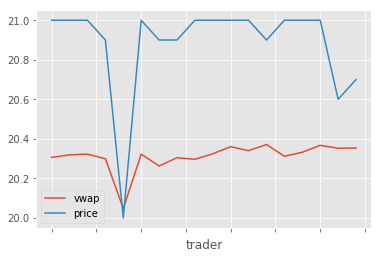

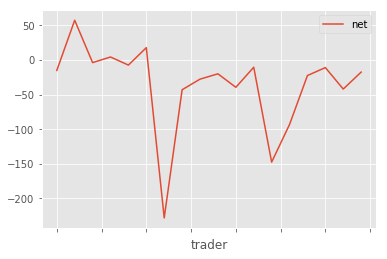

In [190]:
# Desk 9 VWAP - Price

# Pull trader, vwap, price
s9_vp = s9[["trader","vwap","price"]]
s9_vp.set_index('trader', inplace=True)

# subtract and store price - vwap as PVWAP
vp9_diff = pd.DataFrame(s9_vp,columns= ['vwap','price']) 
vp9_diff['PVWAP'] = vp9_diff['price'] - vp9_diff['vwap']

# Plot price & vwap
s9_vp.plot()

# trader nets from desk
s9_net = s9[["trader","net"]]
s9_net.set_index('trader', inplace=True)
s9_net.plot()

# finding the closest price to vwap
g0_9 = vp9_diff[vp9_diff.PVWAP > 0]
g0_9 = g0_9[g0_9.PVWAP < .6]
g0_9.sort_values('PVWAP', ascending=True)

In [191]:
# Looking at trades from closest to vwap
trader_1115 = s9[s9.trader=='1115']
trader_1115['net'] # Loss

trader_1015 = s9[s9.trader=='1015']
trader_1015['net'] # Loss

trader_1215 = s9[s9.trader=='1215']
trader_1215['net'] # Loss

trader_15a1 = s9[s9.trader=='15a1']
trader_15a1['net'] # Loss

8   -41.999975
Name: net, dtype: float64

9   -17.5
Name: net, dtype: float64

6   -147.599906
Name: net, dtype: float64

164   -42.999985
Name: net, dtype: float64

## Desk 10 VWAP Analysis

vwap  price     PVWAP
trader                            
2A1     19.984423   20.0  0.015577
12b     20.336606   20.4  0.063394
12a     20.311624   20.4  0.088376

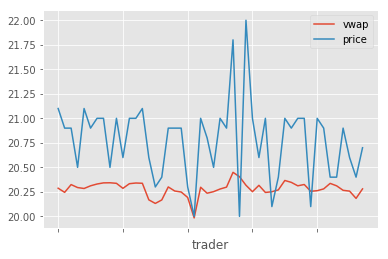

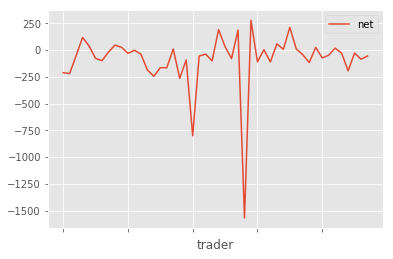

In [192]:
# Desk 10 VWAP - Price

# Pull trader, vwap, price
s10_vp = s10[["trader","vwap","price"]]
s10_vp.set_index('trader', inplace=True)

# subtract and store price - vwap as PVWAP
vp10_diff = pd.DataFrame(s10_vp,columns= ['vwap','price']) 
vp10_diff['PVWAP'] = vp10_diff['price'] - vp10_diff['vwap']

# Plot price & vwap
s10_vp.plot()

# trader nets from desk
s10_net = s10[["trader","net"]]
s10_net.set_index('trader', inplace=True)
s10_net.plot()

# finding the closest price to vwap
g0_10 = vp10_diff[vp10_diff.PVWAP > 0]
g0_10 = g0_10[g0_10.PVWAP < .1]
g0_10.sort_values('PVWAP', ascending=True)

In [193]:
# Looking at trades from closest to vwap
trader_2A1 = s10[s10.trader=='2A1']
trader_2A1['net'] # Loss

trader_12b= s10[s10.trader=='12b']
trader_12b['net'] # Gain

trader_12a = s10[s10.trader=='12a']
trader_12a['net'] # Loss

373   -56.1
Name: net, dtype: float64

388    18.29995
Name: net, dtype: float64

389   -28.40005
Name: net, dtype: float64

## Results
### * Net's were pretty evenly split (Gain | Loss)
### * No real signs from the analysis that any particular VWAP strategy was being followed
### * Some traders did really well when they purchased just above the VWAP, or using it as a support, while others did not perform well

***
# Best Traders Analysis | Top 5 traders by 'net'
##### Lee

In [194]:
best_net = dr_data[dr_data.net > 156].sort_values('net', ascending=False) # Top 5
best_net['net']
best_net['desk']
best_net['trader']
best_net

142    279.000000
137    212.199886
135    191.200000
378    188.199931
50     158.799898
Name: net, dtype: float64

142    S10
137    S10
135    S10
378    S10
50      S5
Name: desk, dtype: object

142      17
137     151
135     215
378     17b
50     414T
Name: trader, dtype: object

ido  price  realizedtot  unrealq  uservolu  useroftotalvolu  \
142  S 10C17   22.0  -3835.00000      187       367           0.5342   
137  S10C151   21.0 -11694.80011      567      1625           0.4235   
135  S10C215   20.5   4106.70000     -191      1977           0.5501   
378  S10C17b   21.8 -28784.00007     1329      3659           0.7015   
50   S5C414T   21.0 -12105.20010      584      1386           0.4069   

     totalvolu  tradecount  firsthourvolu  firsthouruservolu   ...    \
142        687          15            312                 75   ...     
137       3837          75           3944               1040   ...     
135       3594          65           1762                942   ...     
378       5216         160            788                148   ...     
50        3406          88           1240                155   ...     

     uservoltradedbuysell  Gender  Q2  Q9  Q12  Q14  Q15  Q30  desk  trader  
142                   367       F   4   4    2    4    4    N   S10      17  
137                  1625       M   2   2    3    2    2    N   S10     151  
135                  1977       M   2   3    2    3    2    Y   S10     215  
378                  3659       F   2   2    2    3    1    Y   S10     17b  
50                   1386       F   2   3    2    1    1    N    S5    414T  

[5 rows x 29 columns]

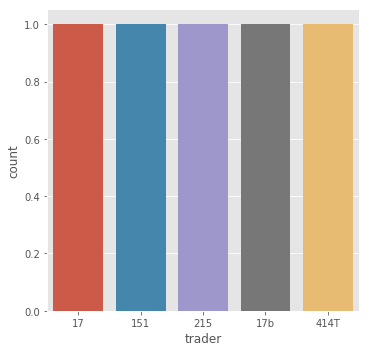

In [195]:
sns.catplot(x='trader',kind='count',data=best_net)
# Flat across the board; no duplicates slipped through

In [196]:
best_traders = best_net[['trader','net', 'uservolu','useroftotalvolu','totalvolu',
                   'tradecount','firsthourvolu','firsthouruservolu',
                   'lasthourvolu','lasthouruservolu', 'price','vwap','Gender']]
best_traders

best_traders['Gender']

meta_dict['Q2']
meta_dict['Q9']
meta_dict['Q12']
meta_dict['Q14']
meta_dict['Q15']
meta_dict['Q30']

best_survey = best_net[['Q2', 'Q9', 'Q12', 'Q14', 'Q15', 'Q30']]
best_survey

best_all = best_net[['trader','net', 'uservolu','useroftotalvolu','totalvolu',
                   'tradecount','firsthourvolu','firsthouruservolu',
                   'lasthourvolu','lasthouruservolu', 'price','vwap','Gender',
                    'Q2', 'Q9', 'Q12', 'Q14', 'Q15', 'Q30']]

trader         net  uservolu  useroftotalvolu  totalvolu  tradecount  \
142     17  279.000000       367           0.5342        687          15   
137    151  212.199886      1625           0.4235       3837          75   
135    215  191.200000      1977           0.5501       3594          65   
378    17b  188.199931      3659           0.7015       5216         160   
50    414T  158.799898      1386           0.4069       3406          88   

     firsthourvolu  firsthouruservolu  lasthourvolu  lasthouruservolu  price  \
142            312                 75           510               231   22.0   
137           3944               1040          1018               104   21.0   
135           1762                942          2616               668   20.5   
378            788                148          3490              1031   21.8   
50            1240                155          2418               546   21.0   

          vwap Gender  
142  20.317467      F  
137  20.366172      M  
135  20.252337      M  
378  20.449118      F  
50   20.351644      F

142    F
137    M
135    M
378    F
50     F
Name: Gender, dtype: object

'I traded using ALL of the information provided to me at each stage'

'I believe that I can improve on my net profits if I had more information even if I did not have any technological tools to analyze the information'

'The source (Highly reputed like Wall Street Journal/ Bloomberg versus low/unknown reputation like Sun news) of information would impact my trading decisions'

'The medium (news /blog /video/ tool based) of information impacted my trading decisions'

'I believe that more stock specific information could have helped me to increase my net profits'

'I have had prior experience in live trading stock /shares'

Q2 Q9 Q12 Q14 Q15 Q30
142  4  4   2   4   4   N
137  2  2   3   2   2   N
135  2  3   2   3   2   Y
378  2  2   2   3   1   Y
50   2  3   2   1   1   N

### Survey shows that the best trader had no trade experience. She disagreed to all questions besides using a reputable news source for her trade decision.
### The second best also had no trade experience. He agreed with all Q's, except was neutral on using a rep source for trade decisions.
### The third best had trading experience and agreed to 2, 12, and 15, and was neutral on 9 and 14.
### Fourth also had trade experience and agreed to Qs 2, 9 and 12. Neutral on 14 and strongly agreed to Q15.
### Fifth did not have experience. She agreed to 2 and 12. Neutral on 9 and strongly agreed to 14 and 15.

In [198]:
import numpy as np
import matplotlib.pyplot as plt

# Separated
bt_net = best_traders[['trader', 'net']]
bt_uservol = best_traders[['trader', 'uservolu']]
bt_usertotvol = best_traders[['trader', 'useroftotalvolu']]
bt_totvol = best_traders[['trader', 'totalvolu']]
bt_trdcnt = best_traders[['trader', 'tradecount']]
bt_frsthrvol = best_traders[['trader', 'firsthourvolu']]
bt_frsthruservol = best_traders[['trader', 'firsthouruservolu']]
bt_lsthrvol = best_traders[['trader', 'lasthourvolu']]
bt_lsthruservol = best_traders[['trader', 'lasthouruservolu']]
bt_price = best_traders[['trader', 'price']]
bt_vwap = best_traders[['trader', 'vwap']]
bt_gender = best_traders[['trader', 'Gender']]

# remove count
bt_net.set_index('trader', inplace=True)
bt_uservol.set_index('trader', inplace=True)
bt_usertotvol.set_index('trader', inplace=True)
bt_totvol.set_index('trader', inplace=True)
bt_trdcnt.set_index('trader', inplace=True)
bt_frsthrvol.set_index('trader', inplace=True)
bt_frsthruservol.set_index('trader', inplace=True)
bt_lsthrvol.set_index('trader', inplace=True)
bt_lsthruservol.set_index('trader', inplace=True)
bt_price.set_index('trader', inplace=True)
bt_vwap.set_index('trader', inplace=True)
bt_gender.set_index('trader', inplace=True)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Best Net')

Text(0.5, 0, 'Traders')

Text(0, 0.5, 'Net')

Text(0.5, 1.0, 'Best User Volume and Total Volume')

Text(0.5, 0, 'Traders')

Text(0, 0.5, 'Volume')

Text(0.5, 1.0, 'Best First Hr Vol vs Last Hr Vol')

Text(0.5, 0, 'Traders')

Text(0, 0.5, 'Volume')

Text(0.5, 1.0, 'Best First Hr User Vol vs Last User Hr Vol')

Text(0.5, 0, 'Traders')

Text(0, 0.5, 'Volume')

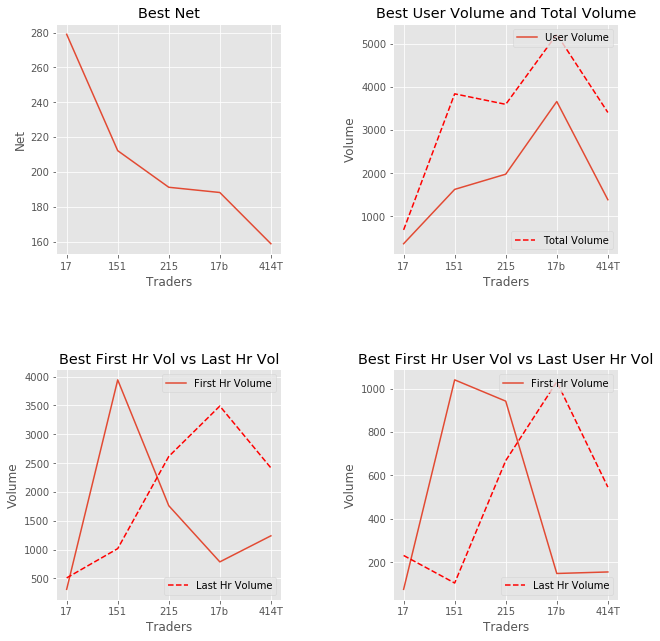

In [199]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter  # useful for `logit` scale
# Plots

# plot with various axes scales
plt.figure(1)

# Net
plt.subplot(221)
plt.plot(bt_net,'-')
plt.title('Best Net')
plt.xlabel('Traders')
plt.ylabel('Net')
plt.grid(True)

# User Volume and Total Volume
plt.subplot(222)
#######
line11, = plt.plot(bt_uservol, '-', label="User Volume")
line21, = plt.plot(bt_totvol, 'r--', label="Total Volume")
# Create a legend for the first line.
fourth_legend = plt.legend(handles=[line11], loc=1)
# Add the legend manually to the current Axes.
ax11 = plt.gca().add_artist(fourth_legend)
# Create another legend for the second line.
plt.legend(handles=[line21], loc=4)
#######
plt.title('Best User Volume and Total Volume')
plt.xlabel('Traders')
plt.ylabel('Volume')
plt.grid(True)

# First Hr Vol vs Last Hr Vol
plt.subplot(223)
#########
line31, = plt.plot(bt_frsthrvol, '-', label="First Hr Volume")
line41, = plt.plot(bt_lsthrvol, 'r--', label="Last Hr Volume")
# Create a legend for the first line.
fifth_legend = plt.legend(handles=[line31], loc=1)
# Add the legend manually to the current Axes.
ax21 = plt.gca().add_artist(fifth_legend)
# Create another legend for the second line.
plt.legend(handles=[line41], loc=4)
##########
plt.title('Best First Hr Vol vs Last Hr Vol')
plt.xlabel('Traders')
plt.ylabel('Volume')
plt.grid(True)

# First and Last hr User Vol
plt.subplot(224)
#########
line51, = plt.plot(bt_frsthruservol, '-', label="First Hr Volume")
line61, = plt.plot(bt_lsthruservol, 'r--', label="Last Hr Volume")
# Create a legend for the first line.
six_legend = plt.legend(handles=[line51], loc=1)
# Add the legend manually to the current Axes.
ax31 = plt.gca().add_artist(six_legend)
# Create another legend for the second line.
plt.legend(handles=[line61], loc=4)
##########
plt.title('Best First Hr User Vol vs Last User Hr Vol')
plt.xlabel('Traders')
plt.ylabel('Volume')
plt.grid(True) 

plt.subplots_adjust(top=12, bottom=10, left=0.10, right=1.4, hspace=.5,
                    wspace=.5)


plt.show()

In [200]:
# Those that traded in the first hour tended to do better.
# Top traders traded less than the rest of the traders
# Mixed Result, about half traded in the first hour while other half traded in last hour.
# Same result for top traders (users), half traded in AM & half in PM

## Top 5 Survey Analysis

In [201]:
bt_q2 = best_all[['trader', 'Q2']]
bt_q9 = best_all[['trader', 'Q9']]
bt_q12 = best_all[['trader', 'Q12']]
bt_q14 = best_all[['trader', 'Q14']]
bt_q15 = best_all[['trader', 'Q15']]
bt_q30 = best_all[['trader', 'Q30']]

bt_q2.set_index('trader', inplace=True)
bt_q9.set_index('trader', inplace=True)
bt_q12.set_index('trader', inplace=True)
bt_q14.set_index('trader', inplace=True)
bt_q15.set_index('trader', inplace=True)
bt_q30.set_index('trader', inplace=True)

# Could not get these to plot **

***
# Worst Traders Analysis | Last 3 traders by 'net'
##### Lee

In [202]:
worst_net = dr_data[dr_data.net < -1000].sort_values('net', ascending=True) # Worst 5
worst_net['net']
worst_net['desk']
worst_net['trader']
worst_net

80    -1861.500000
379   -1568.700087
205   -1213.299985
Name: net, dtype: float64

80      S3
379    S10
205     S7
Name: desk, dtype: object

80     1508
379     17a
205    16b1
Name: trader, dtype: object

ido  price  realizedtot  unrealq  uservolu  useroftotalvolu  \
80   S3C1508   21.0   5425.50000     -347      5681           0.7283   
379  S10C17a   20.0 -22128.70009     1028      5204           0.6846   
205  S7C16b1   20.9  22403.70002    -1130      1490           0.3665   

     totalvolu  tradecount  firsthourvolu  firsthouruservolu   ...    \
80        7800         321           1688                450   ...     
379       7601         214           3924               1450   ...     
205       4065          92            978                110   ...     

     uservoltradedbuysell  Gender  Q2  Q9  Q12  Q14  Q15  Q30  desk  trader  
80                   5681       M   3   2    2    4    2    N    S3    1508  
379                  5204       F   3   2    3    2    2    N   S10     17a  
205                  1490       M   3   5    1    1    1    N    S7    16b1  

[3 rows x 29 columns]

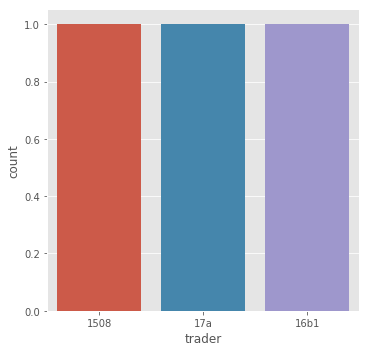

In [203]:
sns.catplot(x='trader',kind='count',data=worst_net)
# Flat across the board; no duplicates slipped through

In [204]:
worst_traders = worst_net[['trader','net', 'uservolu','useroftotalvolu','totalvolu',
                   'tradecount','firsthourvolu','firsthouruservolu',
                   'lasthourvolu','lasthouruservolu', 'price','vwap','Gender']]
worst_traders

worst_traders['Gender']

meta_dict['Q2']
meta_dict['Q9']
meta_dict['Q12']
meta_dict['Q14']
meta_dict['Q15']
meta_dict['Q30']

worst_survey = worst_net[['Q2', 'Q9', 'Q12', 'Q14', 'Q15', 'Q30']]
worst_survey

worst_all = worst_net[['trader','net', 'uservolu','useroftotalvolu','totalvolu',
                   'tradecount','firsthourvolu','firsthouruservolu',
                   'lasthourvolu','lasthouruservolu', 'price','vwap','Gender',
                    'Q2', 'Q9', 'Q12', 'Q14', 'Q15', 'Q30']]

trader          net  uservolu  useroftotalvolu  totalvolu  tradecount  \
80    1508 -1861.500000      5681           0.7283       7800         321   
379    17a -1568.700087      5204           0.6846       7601         214   
205   16b1 -1213.299985      1490           0.3665       4065          92   

     firsthourvolu  firsthouruservolu  lasthourvolu  lasthouruservolu  price  \
80            1688                450          8474              3200   21.0   
379           3924               1450          5684              1965   20.0   
205            978                110          3118               480   20.9   

          vwap Gender  
80   20.359308      M  
379  20.404973      F  
205  20.152522      M

80     M
379    F
205    M
Name: Gender, dtype: object

'I traded using ALL of the information provided to me at each stage'

'I believe that I can improve on my net profits if I had more information even if I did not have any technological tools to analyze the information'

'The source (Highly reputed like Wall Street Journal/ Bloomberg versus low/unknown reputation like Sun news) of information would impact my trading decisions'

'The medium (news /blog /video/ tool based) of information impacted my trading decisions'

'I believe that more stock specific information could have helped me to increase my net profits'

'I have had prior experience in live trading stock /shares'

Q2 Q9 Q12 Q14 Q15 Q30
80   3  2   2   4   2   N
379  3  2   3   2   2   N
205  3  5   1   1   1   N

### All were neutral on using ALL info provided.
### The 2 worst agree that more info would have helped them. The 3rd from worst strongly disagreed with that.
### High rep news sources impacted the worst and third from worst's trade decisions. 2nd worst was neutral.
### news did not have an imact on the worst traders decisions. It did on the 2nd and 3rd worst, 3rd worst strongly agreed.
### All agreed that mroe stock specific info would have helped them, 3rd worst strongly agreed.
### All had no experience trading stocks.

In [206]:
# Separated
wt_net = worst_traders[['trader', 'net']]
wt_uservol = worst_traders[['trader', 'uservolu']]
wt_usertotvol = worst_traders[['trader', 'useroftotalvolu']]
wt_totvol = worst_traders[['trader', 'totalvolu']]
wt_trdcnt = worst_traders[['trader', 'tradecount']]
wt_frsthrvol = worst_traders[['trader', 'firsthourvolu']]
wt_frsthruservol = worst_traders[['trader', 'firsthouruservolu']]
wt_lsthrvol = worst_traders[['trader', 'lasthourvolu']]
wt_lsthruservol = worst_traders[['trader', 'lasthouruservolu']]
wt_price = worst_traders[['trader', 'price']]
wt_vwap = worst_traders[['trader', 'vwap']]
wt_gender = worst_traders[['trader', 'Gender']]

# remove count
wt_net.set_index('trader', inplace=True)
wt_uservol.set_index('trader', inplace=True)
wt_usertotvol.set_index('trader', inplace=True)
wt_totvol.set_index('trader', inplace=True)
wt_trdcnt.set_index('trader', inplace=True)
wt_frsthrvol.set_index('trader', inplace=True)
wt_frsthruservol.set_index('trader', inplace=True)
wt_lsthrvol.set_index('trader', inplace=True)
wt_lsthruservol.set_index('trader', inplace=True)
wt_price.set_index('trader', inplace=True)
wt_vwap.set_index('trader', inplace=True)
wt_gender.set_index('trader', inplace=True)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Worst Net')

Text(0.5, 1.0, 'Worst Net')

Text(0.5, 0, 'Traders')

Text(0, 0.5, 'Net')

Text(0.5, 1.0, 'Worst User Volume and Total Volume')

Text(0.5, 0, 'Traders')

Text(0, 0.5, 'Volume')

Text(0.5, 1.0, 'Worst First Hr Vol vs Last Hr Vol')

Text(0.5, 0, 'Traders')

Text(0, 0.5, 'Volume')

Text(0.5, 1.0, 'Worst First Hr User Vol vs Last User Hr Vol')

Text(0.5, 0, 'Traders')

Text(0, 0.5, 'Volume')

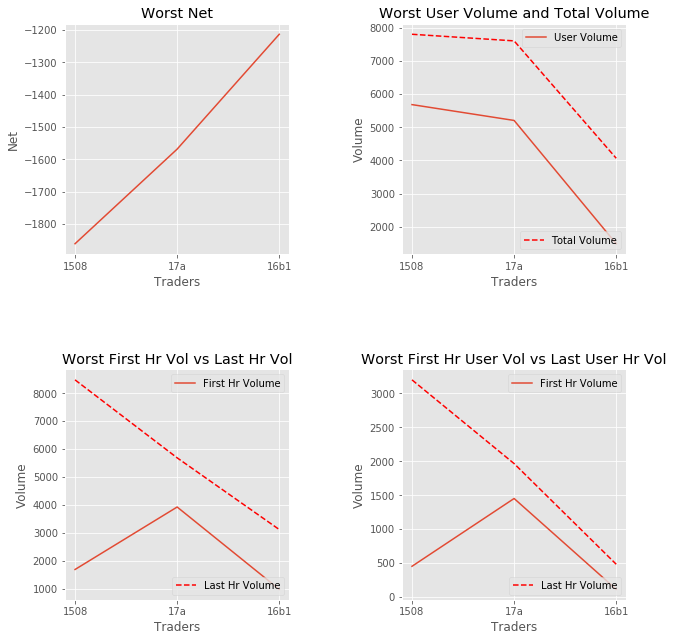

In [207]:
# Plots

# plot with various axes scales

plt.figure(1)
plt.title('Worst Net')

# Net
plt.subplot(221)
plt.plot(wt_net,'-')
plt.title('Worst Net')
plt.xlabel('Traders')
plt.ylabel('Net')
plt.grid(True)
# Those that traded in the first hour tended to do better.


# User Volume and Total Volume
plt.subplot(222)
#######
line1, = plt.plot(wt_uservol, '-', label="User Volume")
line2, = plt.plot(wt_totvol, 'r--', label="Total Volume")
# Create a legend for the first line.
first_legend = plt.legend(handles=[line1], loc=1)
# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(first_legend)
# Create another legend for the second line.
plt.legend(handles=[line2], loc=4)
#######
plt.title('Worst User Volume and Total Volume')
plt.xlabel('Traders')
plt.ylabel('Volume')
plt.grid(True)
# Top traders traded less than the rest of the traders


# First Hr Vol vs Last Hr Vol
plt.subplot(223)
#########
line3, = plt.plot(wt_frsthrvol, '-', label="First Hr Volume")
line4, = plt.plot(wt_lsthrvol, 'r--', label="Last Hr Volume")
# Create a legend for the first line.
second_legend = plt.legend(handles=[line3], loc=1)
# Add the legend manually to the current Axes.
ax2 = plt.gca().add_artist(second_legend)
# Create another legend for the second line.
plt.legend(handles=[line4], loc=4)
##########
plt.title('Worst First Hr Vol vs Last Hr Vol')
plt.xlabel('Traders')
plt.ylabel('Volume')
plt.grid(True)
# Mixed Result, about half traded in the first hour while other half traded in last hour.



# First and Last hr User Vol
plt.subplot(224)
#########
line5, = plt.plot(wt_frsthruservol, '-', label="First Hr Volume")
line6, = plt.plot(wt_lsthruservol, 'r--', label="Last Hr Volume")
# Create a legend for the first line.
third_legend = plt.legend(handles=[line5], loc=1)
# Add the legend manually to the current Axes.
ax3 = plt.gca().add_artist(third_legend)
# Create another legend for the second line.
plt.legend(handles=[line6], loc=4)
##########
plt.title('Worst First Hr User Vol vs Last User Hr Vol')
plt.xlabel('Traders')
plt.ylabel('Volume')
plt.grid(True) 
# Same result for top traders (users), half traded in AM & half in PM

plt.subplots_adjust(top=12, bottom=10, left=0.10, right=1.4, hspace=.5,
                    wspace=.5)
plt.show()

### Trader 1508 traded in the PM and did the worst.
### 16b1 traded in the first hour and did the least worst.
### All traded less than the rest of the traders.
### All traded more in the first and last hour than the rest.